In [1]:
import os
import sys
import tensorflow as tf

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ml.models.three_d import c3d

/home/harold_triedman/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
import csv
import numpy as np
import random
from keras.preprocessing.image import ImageDataGenerator
from google.cloud import storage
from etl.lib import cloud_management

In [3]:
BLACKLIST = []
        
# Delete all content in tmp/npy/
filelist = [f for f in os.listdir('tmp/npy')]
for f in filelist:
    os.remove(os.path.join('tmp/npy', f))

# Access Google Cloud Storage
gcs_client = storage.Client.from_service_account_json(
    '/home/harold_triedman/elvo-analysis/credentials/client_secret.json'
)
bucket = gcs_client.get_bucket('elvos')

# Get label data from Google Cloud Storage
blob = storage.Blob('augmented_annotated_labels.csv', bucket)
blob.download_to_filename('tmp/augmented_annotated_labels.csv')
prelim_label_data = {}
with open('tmp/augmented_annotated_labels.csv', 'r') as pos_file:
    reader = csv.reader(pos_file, delimiter=',')
    for row in reader:
        if row[1] != 'Unnamed: 0':
            prelim_label_data[row[1]] = int(row[2])


In [4]:
# Get all of the positives from the label data
positive_label_data = {}
print('getting positive labels')
for id_, label in list(prelim_label_data.items()):
    if label == 1 and '_' in id_:
        positive_label_data[id_] = label

getting positive labels


In [5]:
# Get 12096 random negatives from the label data to feed into our generator
negative_counter = 0
negative_label_data = {}
print(f"getting {len(list(positive_label_data.keys()))} random negative labels")
while negative_counter < 13500:
    id_, label = random.choice(list(prelim_label_data.items()))
    if label == 0:
        negative_label_data[id_] = label
        del prelim_label_data[id_]
        negative_counter += 1

getting 12096 random negative labels


In [8]:
chunks = []
labels = []

In [9]:
i = 1
for id_, label in list(negative_label_data.items()):
    print(i, 'chunk_data/normal/negative/' + id_ + '.npy')
    blob = bucket.get_blob('chunk_data/normal/negative/' + id_ + '.npy')
    arr = cloud_management.download_array(blob)
    if arr.shape == (32, 32, 32):
        arr = np.expand_dims(arr, axis=-1)
        chunks.append(arr)
        labels.append(label)
        i += 1

1 chunk_data/normal/negative/XQLUVUDY23UZMYW3684.npy
2 chunk_data/normal/negative/UGXVSPJLHJL6AHSW327.npy
3 chunk_data/normal/negative/1DGYAK7UR0OR070J415.npy
4 chunk_data/normal/negative/3SFAQXXE8MAOTWYL926.npy
5 chunk_data/normal/negative/BNZ2UKOA43BESZGP352.npy
6 chunk_data/normal/negative/AG7OGNKEU68RRZFL637.npy
7 chunk_data/normal/negative/SSJQF5OU3VSC3HAD403.npy
8 chunk_data/normal/negative/JT7TUT2NRR0DPZZF93.npy
9 chunk_data/normal/negative/WUG3VLS7FYXG35LH239.npy
9 chunk_data/normal/negative/DNO6CS3YNGFMUWXL95.npy
9 chunk_data/normal/negative/UZUCCRJIMUZMQSQE427.npy
10 chunk_data/normal/negative/WZPADD37RLXRX3IG547.npy
11 chunk_data/normal/negative/FCYGZ75WMW6L4PJM540.npy
12 chunk_data/normal/negative/XPJH44FSBRVL2WTV457.npy
13 chunk_data/normal/negative/JCWGEJIJO2LDRY2U733.npy
14 chunk_data/normal/negative/760N11QRA3L7166Z415.npy
15 chunk_data/normal/negative/NGQAJ2GBHZE2DN5C515.npy
16 chunk_data/normal/negative/8LWUQKCNESCFMX7J469.npy
17 chunk_data/normal/negative/BSKAYXMTSEX

127 chunk_data/normal/negative/J2JPFK8ZOICHFG34842.npy
128 chunk_data/normal/negative/0R1R98REO7SARJ06953.npy
129 chunk_data/normal/negative/0E1AN2T001WORM02136.npy
130 chunk_data/normal/negative/WZPADD37RLXRX3IG109.npy
131 chunk_data/normal/negative/VUTDS6OC2VUSNQMK344.npy
132 chunk_data/normal/negative/WDA531I7IXEZY3RK183.npy
133 chunk_data/normal/negative/OGRRL3DQAJGEL0ZH395.npy
134 chunk_data/normal/negative/KK0ZHCZR9V87OESW14.npy
135 chunk_data/normal/negative/3LR0UAB5II6XJ0W8481.npy
136 chunk_data/normal/negative/LE9D7Q73ZSL4N528275.npy
137 chunk_data/normal/negative/OLIQUZ7ERFP4DJVD717.npy
138 chunk_data/normal/negative/HVPI7QQSXPDHSFME625.npy
138 chunk_data/normal/negative/RKIZJRFZGCXD4EOL373.npy
139 chunk_data/normal/negative/OCD6VASBJF4SNZ4U104.npy
139 chunk_data/normal/negative/BVYSR54MKT5SPMSU101.npy
140 chunk_data/normal/negative/IEJDGAS52VTH4G74283.npy
141 chunk_data/normal/negative/GG1EJGK0NHRCBIBA600.npy
142 chunk_data/normal/negative/ZBXZAYA6RXNBWB6C525.npy
143 chunk_d

264 chunk_data/normal/negative/J3N2GD4RC25OFS0Y25.npy
265 chunk_data/normal/negative/VDL6YJQYER3CXFOI229.npy
266 chunk_data/normal/negative/SMGWMDYTYR8ZB3F5413.npy
267 chunk_data/normal/negative/BMLCCAQRWKFKZQTC148.npy
268 chunk_data/normal/negative/R79UN6BZQXMD6MXR255.npy
269 chunk_data/normal/negative/L37U6THCBS65YAA9581.npy
270 chunk_data/normal/negative/KD1MCH6J7162T5QA161.npy
270 chunk_data/normal/negative/CYIJD3WQ3J3Q67LF681.npy
271 chunk_data/normal/negative/UOSAPEMY76KAGOUR236.npy
272 chunk_data/normal/negative/4HJSEGIZANYH5ISF228.npy
273 chunk_data/normal/negative/FA9ITR81JQB372QO454.npy
274 chunk_data/normal/negative/Z8KUSR13R8Z4Y5KH507.npy
275 chunk_data/normal/negative/MSZB67BPZ32ILNLK282.npy
276 chunk_data/normal/negative/MSXY2JKZXPEBXR72695.npy
277 chunk_data/normal/negative/F6MLW8PSZ0Z431D2359.npy
277 chunk_data/normal/negative/JUOV5YWN6IS7OXIJ412.npy
278 chunk_data/normal/negative/7E6EK7VVSNAESVYS155.npy
278 chunk_data/normal/negative/CD99WIV7TS5HJLRJ213.npy
279 chunk_d

394 chunk_data/normal/negative/GJ35BUS1EQT27H5F73.npy
395 chunk_data/normal/negative/R51O91ZJGN3T0FGI129.npy
396 chunk_data/normal/negative/BUZ4SI0DHW34EAP2764.npy
397 chunk_data/normal/negative/I0CYK5NWY1M896AK527.npy
398 chunk_data/normal/negative/0LT6HMDHUK63WSC7109.npy
399 chunk_data/normal/negative/BJI23MUAPMUMIED2475.npy
400 chunk_data/normal/negative/JCMIIGHKFDRU911D70.npy
401 chunk_data/normal/negative/XQBRGW3CYGNUMWHI689.npy
402 chunk_data/normal/negative/5KZSOKNYS84ZTDK6422.npy
403 chunk_data/normal/negative/GHNKISIFB2PFOZ8O137.npy
404 chunk_data/normal/negative/K32CUE69HPQBU2KG45.npy
404 chunk_data/normal/negative/AKZ8T688ZRU9UTY2526.npy
405 chunk_data/normal/negative/ZXJH70C8PBEPE76K612.npy
406 chunk_data/normal/negative/QPDX2K3DS7IS5QNM294.npy
407 chunk_data/normal/negative/IZF32FDSYNLK72D1300.npy
408 chunk_data/normal/negative/D8C02RJJ2Z63XMFD360.npy
409 chunk_data/normal/negative/ZZWCWIY01XXP36WL376.npy
410 chunk_data/normal/negative/CSXRYWJCXJXAJRLP251.npy
411 chunk_dat

522 chunk_data/normal/negative/SQD3UDNZH2Q3ET4V317.npy
522 chunk_data/normal/negative/L37U6THCBS65YAA9144.npy
523 chunk_data/normal/negative/VDO7JNWOEJ5KGJYJ285.npy
524 chunk_data/normal/negative/AUGXT5PI4VY62M6L62.npy
524 chunk_data/normal/negative/OMR7KPUBB2T7X3QQ148.npy
525 chunk_data/normal/negative/MYM4BYJZ8J0APLCG202.npy
526 chunk_data/normal/negative/NCI33JITLERBTWXI337.npy
527 chunk_data/normal/negative/OCP7EUZJEB7JUL65733.npy
528 chunk_data/normal/negative/48XO6UQZI766F8TN56.npy
529 chunk_data/normal/negative/7JWNB3841VNNZ3MI193.npy
530 chunk_data/normal/negative/P4AIB8JMDY6RDRAP463.npy
531 chunk_data/normal/negative/THKULF2KHMNVMTUR182.npy
532 chunk_data/normal/negative/1IN3A0RW0UHOBHMA169.npy
533 chunk_data/normal/negative/SRKT7U91OM48G8XF306.npy
534 chunk_data/normal/negative/194JNZHLDSZJ27SW509.npy
535 chunk_data/normal/negative/ROMHUDLTCOEXUQCA343.npy
536 chunk_data/normal/negative/GFRJ7SPGIEJVXVRS3404.npy
537 chunk_data/normal/negative/DENODP22U2Q7E4LM706.npy
538 chunk_d

649 chunk_data/normal/negative/TJAPUMPEDA32J5JW103.npy
650 chunk_data/normal/negative/TJAPUMPEDA32J5JW437.npy
651 chunk_data/normal/negative/H4C8M2RF0ASI8M5R547.npy
652 chunk_data/normal/negative/IIOOPK6T2ZWDZMU3434.npy
653 chunk_data/normal/negative/8SREEDHBQF4ZGA02410.npy
654 chunk_data/normal/negative/RWJZNVFII5INU6Z5341.npy
655 chunk_data/normal/negative/ZCIMXZ73NFNRDH4612.npy
656 chunk_data/normal/negative/VCG2AJ44VIANYB10187.npy
657 chunk_data/normal/negative/IZF32FDSYNLK72D1473.npy
658 chunk_data/normal/negative/IKLKZYXDYTCCYUAZ527.npy
659 chunk_data/normal/negative/Z3AINLH4Y07ITBRR168.npy
660 chunk_data/normal/negative/RWKA32WBSVFB4MQF322.npy
661 chunk_data/normal/negative/56GX2GI8AGT0BIHN625.npy
662 chunk_data/normal/negative/5ONG9EN0RF9CYGFY671.npy
663 chunk_data/normal/negative/GJ35BUS1EQT27H5F95.npy
663 chunk_data/normal/negative/QEMIBYDHSXNH2E6X79.npy
663 chunk_data/normal/negative/ZCTE57VMPCGWDG7542.npy
664 chunk_data/normal/negative/D4UFLMT22FYKZ9O3116.npy
664 chunk_data

783 chunk_data/normal/negative/PQ918CDGQIFXXXN1528.npy
784 chunk_data/normal/negative/TXCZ3Q4I0UL1PFLV124.npy
784 chunk_data/normal/negative/R9RD6OJJBJCI7L25201.npy
785 chunk_data/normal/negative/PMUXVQHYYYBOK4RL217.npy
786 chunk_data/normal/negative/NFG67H47EUPD5URG290.npy
786 chunk_data/normal/negative/XVPBCFNYTDI4HHW2391.npy
786 chunk_data/normal/negative/P0WH1L0BA1YZXOGW1995.npy
787 chunk_data/normal/negative/86MLFNHYQLTVJO6U501.npy
788 chunk_data/normal/negative/TFIG39JA77W6USD334.npy
788 chunk_data/normal/negative/5H94IH9XGI83T610121.npy
789 chunk_data/normal/negative/2JMHB4LET9UMEJKR340.npy
790 chunk_data/normal/negative/RKIZJRFZGCXD4EOL428.npy
791 chunk_data/normal/negative/OOAKLUZ2A4XYXC4X241.npy
792 chunk_data/normal/negative/KJAWMYSKQTYINTNC340.npy
793 chunk_data/normal/negative/MPAR5LKXIUS2RTWG602.npy
794 chunk_data/normal/negative/YOZ19SX2BIALZHYO228.npy
795 chunk_data/normal/negative/CCGEZOFGLKC3USJ8998.npy
795 chunk_data/normal/negative/OAEVXX4IFAX5IYOR534.npy
796 chunk_

911 chunk_data/normal/negative/NZRLS8YB13AIILWV373.npy
912 chunk_data/normal/negative/IOK4CHCPSG7V7V5Y477.npy
913 chunk_data/normal/negative/Z92PLJTM6GP9NX1B667.npy
914 chunk_data/normal/negative/OAEVXX4IFAX5IYOR140.npy
915 chunk_data/normal/negative/WIJONRZUXV2SJOMN502.npy
916 chunk_data/normal/negative/EXOIBZU8JEIWNCHS434.npy
917 chunk_data/normal/negative/ECJB3HH5WPIVOJJW236.npy
917 chunk_data/normal/negative/PCJ6DNFF7XHMUSWE39.npy
918 chunk_data/normal/negative/GB9QW6WTB9XYMMN4252.npy
919 chunk_data/normal/negative/H72HW588HYXAZTGI660.npy
920 chunk_data/normal/negative/LZBLW6F81ERF8901193.npy
921 chunk_data/normal/negative/IAPTWF22G2YMU1P6263.npy
922 chunk_data/normal/negative/ZHLGEIY4UAEIPL33493.npy
923 chunk_data/normal/negative/RNLVK5QDFK87IGDG186.npy
924 chunk_data/normal/negative/TSZFE43KG3NQJR69724.npy
924 chunk_data/normal/negative/OTIP25YORHBKJPZM26.npy
924 chunk_data/normal/negative/E1VWJWG3V3QYSSWX416.npy
925 chunk_data/normal/negative/NXDFBWPXYWHEIO2O194.npy
925 chunk_da

1033 chunk_data/normal/negative/Q8LO6RYLTPQQKJO8215.npy
1034 chunk_data/normal/negative/UAFTPLA47GA7WS27222.npy
1035 chunk_data/normal/negative/BNZ2UKOA43BESZGP450.npy
1036 chunk_data/normal/negative/Z79AE6B47YSGBITL484.npy
1037 chunk_data/normal/negative/ZXXMMCGK6ANRKLFD319.npy
1038 chunk_data/normal/negative/FTAKNRFGOGVS632K473.npy
1039 chunk_data/normal/negative/6SFFLWAD7TCCTTHC518.npy
1040 chunk_data/normal/negative/OTIP25YORHBKJPZM871.npy
1041 chunk_data/normal/negative/MYM4BYJZ8J0APLCG794.npy
1041 chunk_data/normal/negative/5M81E9S7W99ZAY7K248.npy
1042 chunk_data/normal/negative/TEHE4SMNJTXDNW2O198.npy
1043 chunk_data/normal/negative/UNREF6O6622LZWNN292.npy
1044 chunk_data/normal/negative/IGIIMA3LABMNETMA237.npy
1045 chunk_data/normal/negative/9Z9TDQNM92R1FK71250.npy
1046 chunk_data/normal/negative/NLV36DRLRZY5AKIJ308.npy
1047 chunk_data/normal/negative/N0X30CNAU7RBG5UY16.npy
1048 chunk_data/normal/negative/EYYSOUW6PR2WMBZS283.npy
1049 chunk_data/normal/negative/TGXRI16H1J321FI01

1160 chunk_data/normal/negative/JLWQD6J6FXTRVZ0N506.npy
1161 chunk_data/normal/negative/G37FBCOEGUZFY13847.npy
1161 chunk_data/normal/negative/Z9SQUSY4XPPSP4ND274.npy
1162 chunk_data/normal/negative/YRNJZUOBWLMG7ESZ45.npy
1162 chunk_data/normal/negative/8S0FHQGBA5LPLI4I336.npy
1163 chunk_data/normal/negative/IIOOPK6T2ZWDZMU3129.npy
1164 chunk_data/normal/negative/RRZNNMZTLY4BJK7C742.npy
1165 chunk_data/normal/negative/BTLLL3I67PYRN7R4301.npy
1166 chunk_data/normal/negative/BRSZTKDWTB2X5P3W678.npy
1167 chunk_data/normal/negative/WMMP0B4WE4H12UL550.npy
1168 chunk_data/normal/negative/MA4Z8BDBS9XC75A5269.npy
1169 chunk_data/normal/negative/4FZ9SMCGR26NN28M764.npy
1170 chunk_data/normal/negative/HZLBHRHYLSY9TXJ415.npy
1170 chunk_data/normal/negative/IBRRD5O4NGVPABDT914.npy
1171 chunk_data/normal/negative/IXMOCOA4Z88DGJ6E635.npy
1172 chunk_data/normal/negative/LCGP6HURGG2XVJ5B258.npy
1173 chunk_data/normal/negative/WPNYHBQRGJ4NHU3C106.npy
1174 chunk_data/normal/negative/8TLM2DUBYEE2GDH0783.

1284 chunk_data/normal/negative/2JQAVUE1J92P7TH0159.npy
1284 chunk_data/normal/negative/2KMKXR2G1BLD0C2G468.npy
1285 chunk_data/normal/negative/WB6U44ZD7QACX6JM154.npy
1286 chunk_data/normal/negative/ZX3B62KA1WW46Z6O806.npy
1286 chunk_data/normal/negative/0QPSB9IO98216B9837.npy
1287 chunk_data/normal/negative/SRG1SXU9H044QXS289.npy
1288 chunk_data/normal/negative/WHNAL8GW8TJ8Y4AK525.npy
1289 chunk_data/normal/negative/SUVCYHBWWKNAVUGQ600.npy
1289 chunk_data/normal/negative/IOK4CHCPSG7V7V5Y1014.npy
1290 chunk_data/normal/negative/7GRXTJUB2643Z413123.npy
1291 chunk_data/normal/negative/XXEE333ZVHOJTRJJ160.npy
1292 chunk_data/normal/negative/ROF7JT3SZGBNY3MG519.npy
1293 chunk_data/normal/negative/OQNPNGEBR4D54PRA395.npy
1294 chunk_data/normal/negative/BU830YLY7PZLQZIT587.npy
1295 chunk_data/normal/negative/WIQMFFRDNGILW7XZ395.npy
1296 chunk_data/normal/negative/PCJ6DNFF7XHMUSWE668.npy
1297 chunk_data/normal/negative/K32CUE69HPQBU2KG473.npy
1298 chunk_data/normal/negative/GBA7XJ5E7ITWZW7K1

1401 chunk_data/normal/negative/BGK2KBB8KXRWI65O591.npy
1402 chunk_data/normal/negative/6JWAB7EKJUL10ACK338.npy
1403 chunk_data/normal/negative/SAQ39AN6XOILQY1D148.npy
1404 chunk_data/normal/negative/NIED5UTOZ2JOFCWT524.npy
1405 chunk_data/normal/negative/XO2Z2XFH26YISRUA598.npy
1406 chunk_data/normal/negative/2U95HNIBIUWTDGF6467.npy
1407 chunk_data/normal/negative/5V7B1QEMQF9IANBO603.npy
1408 chunk_data/normal/negative/A2PP3QIRIZPKKFM4212.npy
1409 chunk_data/normal/negative/2STQ3IYP5SV7XIPG60.npy
1410 chunk_data/normal/negative/P0WH1L0BA1YZXOGW1984.npy
1411 chunk_data/normal/negative/GJ5CHFO5E33QWWNW139.npy
1411 chunk_data/normal/negative/QJFMNVKKVZXKBROO200.npy
1412 chunk_data/normal/negative/XSSFSN7XYAV4E3OA224.npy
1413 chunk_data/normal/negative/UBDRB3DMSB6TJ76N182.npy
1414 chunk_data/normal/negative/JMWZRLKLB5DSSXE3177.npy
1415 chunk_data/normal/negative/VUTDS6OC2VUSNQMK109.npy
1416 chunk_data/normal/negative/YGJSUAFCVJ52LIRD234.npy
1417 chunk_data/normal/negative/JGNEVHX7BEKLBQJY

1531 chunk_data/normal/negative/YOZ19SX2BIALZHYO292.npy
1532 chunk_data/normal/negative/PQLRGWB8W5XDIP1B309.npy
1533 chunk_data/normal/negative/HZLBHRHYLSY9TXJ4446.npy
1533 chunk_data/normal/negative/WL52KFPE6FMJ1A1I337.npy
1534 chunk_data/normal/negative/PGB3UF6PM780GAIE35.npy
1535 chunk_data/normal/negative/FBGMN3O08GW5GG9144.npy
1536 chunk_data/normal/negative/WIQMFFRDNGILW7XZ114.npy
1537 chunk_data/normal/negative/BU830YLY7PZLQZIT294.npy
1538 chunk_data/normal/negative/HVPI7QQSXPDHSFME635.npy
1538 chunk_data/normal/negative/FQJ4RD45AQ53MYRC359.npy
1538 chunk_data/normal/negative/74Q4CS2DM19P4CZ6291.npy
1539 chunk_data/normal/negative/AQCA8X3KQ99EFUQK110.npy
1540 chunk_data/normal/negative/SRKT7U91OM48G8XF484.npy
1541 chunk_data/normal/negative/YGJSUAFCVJ52LIRD461.npy
1542 chunk_data/normal/negative/PMEECXFHBLN6KHO7416.npy
1543 chunk_data/normal/negative/KS626OB4OI9MWE8F92.npy
1544 chunk_data/normal/negative/MGHOPQDA7YCI7643307.npy
1545 chunk_data/normal/negative/F6MLW8PSZ0Z431D268.

1651 chunk_data/normal/negative/LCS6AB1M7X4ZP854241.npy
1652 chunk_data/normal/negative/THOT71FJ6S8OS792358.npy
1653 chunk_data/normal/negative/WMMP0B4WE4H12UL5521.npy
1654 chunk_data/normal/negative/FLSUE7ZIXI6HSJWN198.npy
1655 chunk_data/normal/negative/FUVL4PLSUHRCEAHC510.npy
1655 chunk_data/normal/negative/4LEFZ084SL6LNEE2605.npy
1656 chunk_data/normal/negative/METEKE1H72A6VT8I34.npy
1656 chunk_data/normal/negative/XHF16O9O7LFK1JNI202.npy
1657 chunk_data/normal/negative/GQ4W68F9T36QYU6B84.npy
1658 chunk_data/normal/negative/IIOOPK6T2ZWDZMU331.npy
1658 chunk_data/normal/negative/7GRXTJUB2643Z413338.npy
1659 chunk_data/normal/negative/7EERK1STHKAHD0NH93.npy
1660 chunk_data/normal/negative/IGIIMA3LABMNETMA715.npy
1661 chunk_data/normal/negative/VXXCYRTUJK849I60743.npy
1662 chunk_data/normal/negative/DMQR502XO4Z5DSM998.npy
1663 chunk_data/normal/negative/ICWMS7OCXZLUTUFT229.npy
1664 chunk_data/normal/negative/GWGPR9W0KUGO4G6M262.npy
1665 chunk_data/normal/negative/ORIKPYK3H2CCVFBR146.n

1774 chunk_data/normal/negative/UN6XC6HYXO0RDKU6287.npy
1774 chunk_data/normal/negative/RKBSU42WA7AY22E7769.npy
1774 chunk_data/normal/negative/Z8KUSR13R8Z4Y5KH1283.npy
1775 chunk_data/normal/negative/KBY6B17YK6AAR3VD563.npy
1776 chunk_data/normal/negative/HZLBHRHYLSY9TXJ4504.npy
1776 chunk_data/normal/negative/6UI52CFMWHR6UH22460.npy
1777 chunk_data/normal/negative/CIED0H64G5Z7173O250.npy
1778 chunk_data/normal/negative/QHD8C9LSCKNYCRVH23.npy
1778 chunk_data/normal/negative/FBJFYBF7A46A4GIM713.npy
1779 chunk_data/normal/negative/RW13S0OR03CO7OP5137.npy
1780 chunk_data/normal/negative/EWYGH3OSPLJI27UF157.npy
1781 chunk_data/normal/negative/48XO6UQZI766F8TN451.npy
1782 chunk_data/normal/negative/THOT71FJ6S8OS792759.npy
1783 chunk_data/normal/negative/ZOROHVT5JZVIBEEX196.npy
1784 chunk_data/normal/negative/XQLUVUDY23UZMYW3518.npy
1785 chunk_data/normal/negative/TXCZ3Q4I0UL1PFLV294.npy
1786 chunk_data/normal/negative/QKBS566N24RMCV5H589.npy
1787 chunk_data/normal/negative/5LGDWR05UU6NKX4Z

1901 chunk_data/normal/negative/IXRSXXZI0S6L0EJI120.npy
1902 chunk_data/normal/negative/SZY3J4UTKSCFM2H4277.npy
1903 chunk_data/normal/negative/ILO1WFJV843ZHAME281.npy
1904 chunk_data/normal/negative/KRWJSE7TVM2QLJI725.npy
1905 chunk_data/normal/negative/IP4X9W512RO56NQ7204.npy
1906 chunk_data/normal/negative/WHNAL8GW8TJ8Y4AK499.npy
1907 chunk_data/normal/negative/TSZFE43KG3NQJR69227.npy
1908 chunk_data/normal/negative/PVMXD3RZSHEQTYW3302.npy
1909 chunk_data/normal/negative/SWSY42N45J3YWV5I105.npy
1910 chunk_data/normal/negative/7CX50JMLP3MB8Y6X1058.npy
1911 chunk_data/normal/negative/UKOHM6O57N37U2E286.npy
1912 chunk_data/normal/negative/GFRJ7SPGIEJVXVRS3355.npy
1913 chunk_data/normal/negative/XXEE333ZVHOJTRJJ501.npy
1914 chunk_data/normal/negative/AEPRN5R7W2ASOGR0260.npy
1915 chunk_data/normal/negative/MPAR5LKXIUS2RTWG738.npy
1915 chunk_data/normal/negative/02SNCL4L74HH1N2V284.npy
1916 chunk_data/normal/negative/4R0C9IQ512KYCGPC796.npy
1917 chunk_data/normal/negative/74Q4CS2DM19P4CZ6

2029 chunk_data/normal/negative/RMID4XEKTVEYCSGK24.npy
2030 chunk_data/normal/negative/JNLCZIQGTGTFNEKK433.npy
2031 chunk_data/normal/negative/POSX6PS6LR34HENB101.npy
2032 chunk_data/normal/negative/MVK8N2R39RYGV1O3248.npy
2033 chunk_data/normal/negative/IIMERRCV5YJD0ZXZ476.npy
2034 chunk_data/normal/negative/TXP81XXA11Z8BNIX131.npy
2035 chunk_data/normal/negative/KJAWMYSKQTYINTNC233.npy
2036 chunk_data/normal/negative/OUM3NFGU5U3TCBBK327.npy
2037 chunk_data/normal/negative/DHG4RIY13DFISJ35239.npy
2037 chunk_data/normal/negative/K3C28ASFAF7ZLEIH438.npy
2038 chunk_data/normal/negative/ZZWCWIY01XXP36WL634.npy
2039 chunk_data/normal/negative/Z43C9369AE4ZNMCE284.npy
2040 chunk_data/normal/negative/UZUCCRJIMUZMQSQE753.npy
2041 chunk_data/normal/negative/AFN5EQGSDERZCTLM704.npy
2042 chunk_data/normal/negative/RRZGAIOEIS6WPXDT73.npy
2042 chunk_data/normal/negative/M0896BIM3W9DCUU6193.npy
2043 chunk_data/normal/negative/PCNMFAZL5VWWK7RP245.npy
2044 chunk_data/normal/negative/JCWGEJIJO2LDRY2U93

2158 chunk_data/normal/negative/ZSEAY6NXKQIH75RE92.npy
2159 chunk_data/normal/negative/7A455JLNBCTEBIYS510.npy
2160 chunk_data/normal/negative/GQ4W68F9T36QYU6B414.npy
2161 chunk_data/normal/negative/0MG5EK1O64CPS88718.npy
2162 chunk_data/normal/negative/D3YR1YUTS8O1PFNM313.npy
2163 chunk_data/normal/negative/M1ZMVHI4X7C5J4OX345.npy
2164 chunk_data/normal/negative/KD1MCH6J7162T5QA540.npy
2165 chunk_data/normal/negative/SADEJMD27KKWZQ5L513.npy
2166 chunk_data/normal/negative/RHPAFDUOGPPHWSQS157.npy
2167 chunk_data/normal/negative/VZHXKDEYF7EK4RRP219.npy
2168 chunk_data/normal/negative/48XO6UQZI766F8TN595.npy
2169 chunk_data/normal/negative/NRD1J2CBBXXGPNFL199.npy
2170 chunk_data/normal/negative/NLXOSUXOZZHPFQQX92.npy
2171 chunk_data/normal/negative/K2GS9PIQ1E0DBDBE374.npy
2172 chunk_data/normal/negative/9XJOAML27V6XJGF209.npy
2173 chunk_data/normal/negative/HDQYSVBJ4MPRGYRN858.npy
2173 chunk_data/normal/negative/WYMX6QXJXTECQ81F191.npy
2173 chunk_data/normal/negative/ZBXZAYA6RXNBWB6C696.

2275 chunk_data/normal/negative/IKLKZYXDYTCCYUAZ195.npy
2276 chunk_data/normal/negative/NHKUCEIIHLJQ25VM302.npy
2277 chunk_data/normal/negative/G8EI396DZCRABG20295.npy
2278 chunk_data/normal/negative/ZXJH70C8PBEPE76K561.npy
2279 chunk_data/normal/negative/UKOHM6O57N37U2E2444.npy
2280 chunk_data/normal/negative/WIQMFFRDNGILW7XZ198.npy
2281 chunk_data/normal/negative/BCPN2Y1Q3287F27T186.npy
2281 chunk_data/normal/negative/FPTFJD4JZA7ZKYQJ450.npy
2282 chunk_data/normal/negative/1RL0HZOC3A7JWJL1130.npy
2283 chunk_data/normal/negative/NMHOGEKTK7LT57ZI177.npy
2284 chunk_data/normal/negative/PNPGGIFOXWJJQ22P316.npy
2284 chunk_data/normal/negative/MPAR5LKXIUS2RTWG545.npy
2285 chunk_data/normal/negative/YEXJFFF2ZK44FYCP77.npy
2285 chunk_data/normal/negative/HAKJSG5CHDGOBP6B202.npy
2286 chunk_data/normal/negative/86MLFNHYQLTVJO6U371.npy
2287 chunk_data/normal/negative/NCU63Q4O8N50O6ND615.npy
2288 chunk_data/normal/negative/K7673WEM9ID3PNEX419.npy
2289 chunk_data/normal/negative/6SFFLWAD7TCCTTHC7

2403 chunk_data/normal/negative/M1ZMVHI4X7C5J4OX347.npy
2404 chunk_data/normal/negative/ESLHGQCGYB7J4DX3371.npy
2405 chunk_data/normal/negative/IF41GHNSIEOP7BWD221.npy
2406 chunk_data/normal/negative/C67K82FMKN435ZNB47.npy
2407 chunk_data/normal/negative/MRVHMZRQXDY2OR0G26.npy
2408 chunk_data/normal/negative/0MCK6QWQ2WSEQ6AO372.npy
2409 chunk_data/normal/negative/WDIYHNMBALZ4ZP2A211.npy
2410 chunk_data/normal/negative/A096PH8X9XCTJECG267.npy
2411 chunk_data/normal/negative/NYR7NWGHIRZDCL66374.npy
2412 chunk_data/normal/negative/ML05G1O6XMYNN1JE228.npy
2413 chunk_data/normal/negative/5LGDWR05UU6NKX4Z588.npy
2414 chunk_data/normal/negative/RRZNNMZTLY4BJK7C693.npy
2414 chunk_data/normal/negative/RTVIBS2XBU46GPVC84.npy
2415 chunk_data/normal/negative/TJAPUMPEDA32J5JW171.npy
2416 chunk_data/normal/negative/CJNLJB43ZD3GIUN3444.npy
2416 chunk_data/normal/negative/KRWJSE7TVM2QLJI7477.npy
2417 chunk_data/normal/negative/GXR5YMJB3PZQNLAC347.npy
2418 chunk_data/normal/negative/639OS2YC4LW8LFDJ254

2526 chunk_data/normal/negative/TVY4XBCLXJBKK72S337.npy
2527 chunk_data/normal/negative/DPSG75LCBZVBTRPO134.npy
2528 chunk_data/normal/negative/I5LGG0BM4IP16DPT946.npy
2529 chunk_data/normal/negative/C02TH0J1FT7XQ5EU303.npy
2530 chunk_data/normal/negative/FKHXWQEPTPIWXHBR214.npy
2531 chunk_data/normal/negative/SXF2FCCYEQLXMQO5373.npy
2532 chunk_data/normal/negative/LVOHLK3FOHWE66BP80.npy
2533 chunk_data/normal/negative/11R9AD0U2YKRA2CA338.npy
2534 chunk_data/normal/negative/WUG3VLS7FYXG35LH346.npy
2535 chunk_data/normal/negative/5H94IH9XGI83T610688.npy
2536 chunk_data/normal/negative/AG7OGNKEU68RRZFL775.npy
2537 chunk_data/normal/negative/QKBS566N24RMCV5H150.npy
2538 chunk_data/normal/negative/U82WU8SEKUCXCHZI234.npy
2539 chunk_data/normal/negative/E1VWJWG3V3QYSSWX311.npy
2540 chunk_data/normal/negative/CPPRXSBJ6WA6OQ31510.npy
2541 chunk_data/normal/negative/PFIIEXEJM7FY3N5Q750.npy
2542 chunk_data/normal/negative/HW93K0TDEQO9XO88354.npy
2543 chunk_data/normal/negative/MJFHYCVEV2GTJD3N3

2653 chunk_data/normal/negative/RPMAO8MCIP9LWUSP283.npy
2654 chunk_data/normal/negative/ANCCICBPHIDJ5PJ4367.npy
2655 chunk_data/normal/negative/48XO6UQZI766F8TN463.npy
2656 chunk_data/normal/negative/ZMP6NER3I4ERS2JE297.npy
2657 chunk_data/normal/negative/P0WH1L0BA1YZXOGW1019.npy
2658 chunk_data/normal/negative/8MVXENAM66B4AWIF671.npy
2659 chunk_data/normal/negative/AG7OGNKEU68RRZFL144.npy
2660 chunk_data/normal/negative/ZYKNNBEIY0387GUQ103.npy
2660 chunk_data/normal/negative/TVCP433TKOVBCQTW535.npy
2661 chunk_data/normal/negative/U82WU8SEKUCXCHZI488.npy
2662 chunk_data/normal/negative/KS1YVOV62YD8MEU204.npy
2663 chunk_data/normal/negative/OJFOT7U85BBO92CL18.npy
2664 chunk_data/normal/negative/R9RD6OJJBJCI7L25589.npy
2665 chunk_data/normal/negative/PGB3UF6PM780GAIE475.npy
2666 chunk_data/normal/negative/PQJEIXKIJMZTBZ74625.npy
2667 chunk_data/normal/negative/XZUUUC426GUXSCGJ606.npy
2667 chunk_data/normal/negative/CCGEZOFGLKC3USJ8678.npy
2668 chunk_data/normal/negative/GCSZPU5LPJII8FGU4

2782 chunk_data/normal/negative/7O84UHF46Z2E5AJ0174.npy
2783 chunk_data/normal/negative/EQ0L201MUZFO2SY8467.npy
2784 chunk_data/normal/negative/ZF17COJC2NNEFOLK444.npy
2785 chunk_data/normal/negative/ZMP6NER3I4ERS2JE147.npy
2786 chunk_data/normal/negative/BSBXPIGXEUV3WWOZ473.npy
2787 chunk_data/normal/negative/UN6XC6HYXO0RDKU6284.npy
2788 chunk_data/normal/negative/2JQAVUE1J92P7TH0137.npy
2789 chunk_data/normal/negative/VVGO45TQNOASBLZM47.npy
2789 chunk_data/normal/negative/GTSAGN2MRE5D0AZI223.npy
2789 chunk_data/normal/negative/9UIAZ2U1711BN4IW6.npy
2789 chunk_data/normal/negative/CJNLJB43ZD3GIUN3284.npy
2790 chunk_data/normal/negative/UNREF6O6622LZWNN355.npy
2791 chunk_data/normal/negative/UYA5YJUAVC3SE6HV578.npy
2792 chunk_data/normal/negative/J2JPFK8ZOICHFG341713.npy
2793 chunk_data/normal/negative/6XB4FHWAXDVQ79NK183.npy
2794 chunk_data/normal/negative/GJ35BUS1EQT27H5F349.npy
2794 chunk_data/normal/negative/UGAYD4C2EMSUZ7LV83.npy
2795 chunk_data/normal/negative/NWO33W453F6ZJ4BU58.

2906 chunk_data/normal/negative/11R9AD0U2YKRA2CA347.npy
2907 chunk_data/normal/negative/MBM873G2J4FD5F9C499.npy
2908 chunk_data/normal/negative/EGCV7CJ6LF2CACQM301.npy
2909 chunk_data/normal/negative/SRG1SXU9H044QXS2334.npy
2909 chunk_data/normal/negative/XJVLT6YE7FKB3T3B545.npy
2910 chunk_data/normal/negative/VVGO45TQNOASBLZM558.npy
2911 chunk_data/normal/negative/TXCZ3Q4I0UL1PFLV298.npy
2912 chunk_data/normal/negative/RLF1AFE0G1Q98BS9530.npy
2912 chunk_data/normal/negative/DEWCDZZM1CSH5YFI68.npy
2913 chunk_data/normal/negative/0P43IADQS0BGHJLC327.npy
2914 chunk_data/normal/negative/AGTRMFUZM2MQUAB4414.npy
2915 chunk_data/normal/negative/VXXCYRTUJK849I6087.npy
2915 chunk_data/normal/negative/LYUO2OPTNYUBCHT2414.npy
2916 chunk_data/normal/negative/NYR7NWGHIRZDCL66378.npy
2917 chunk_data/normal/negative/65HBYCJJL7IS4B4E354.npy
2918 chunk_data/normal/negative/ZSOO1JLX7GWD1AXI214.npy
2919 chunk_data/normal/negative/ZMP6NER3I4ERS2JE697.npy
2919 chunk_data/normal/negative/BCPN2Y1Q3287F27T45

3025 chunk_data/normal/negative/6IPDMHP9V2TQJ9YR317.npy
3026 chunk_data/normal/negative/L37U6THCBS65YAA9751.npy
3027 chunk_data/normal/negative/X63IP208CJ8ST0SX485.npy
3028 chunk_data/normal/negative/ZBXZAYA6RXNBWB6C121.npy
3029 chunk_data/normal/negative/BCPN2Y1Q3287F27T587.npy
3030 chunk_data/normal/negative/XHF16O9O7LFK1JNI282.npy
3031 chunk_data/normal/negative/ICWMS7OCXZLUTUFT536.npy
3032 chunk_data/normal/negative/1S6EZQSDTW7O1E1T745.npy
3033 chunk_data/normal/negative/4R0C9IQ512KYCGPC337.npy
3034 chunk_data/normal/negative/PCJ6DNFF7XHMUSWE280.npy
3035 chunk_data/normal/negative/YCCJTT3KSZR8MYJK1268.npy
3035 chunk_data/normal/negative/7CX50JMLP3MB8Y6X310.npy
3036 chunk_data/normal/negative/4EH0PS1IKFIGT1T088.npy
3037 chunk_data/normal/negative/LOGIP43ZSLSUA5SZ45.npy
3038 chunk_data/normal/negative/HAD27IUS6FJC8BCO315.npy
3039 chunk_data/normal/negative/GB9QW6WTB9XYMMN4355.npy
3040 chunk_data/normal/negative/WW6NZ08FGRHMYND4531.npy
3041 chunk_data/normal/negative/LI0GYOH64EADRBBE4

3160 chunk_data/normal/negative/C5LCU8BQOA9HKWM6204.npy
3161 chunk_data/normal/negative/RWKA32WBSVFB4MQF217.npy
3161 chunk_data/normal/negative/PCJ6DNFF7XHMUSWE345.npy
3162 chunk_data/normal/negative/LHMGXWC6J7DRD3CP1161.npy
3163 chunk_data/normal/negative/6JWAB7EKJUL10ACK987.npy
3164 chunk_data/normal/negative/PMMV7MLZUWJTIMLR331.npy
3165 chunk_data/normal/negative/TRRYZ5WXYHUMTPCQ165.npy
3166 chunk_data/normal/negative/TNDI8Z4QHMRPT40Q225.npy
3167 chunk_data/normal/negative/SMGWMDYTYR8ZB3F5234.npy
3168 chunk_data/normal/negative/MLQJEF1PHZHJ6PAZ170.npy
3169 chunk_data/normal/negative/TQKQG8IN5G3017SZ297.npy
3170 chunk_data/normal/negative/MBM873G2J4FD5F9C10.npy
3171 chunk_data/normal/negative/RBC423N4RNB3UZ5P357.npy
3172 chunk_data/normal/negative/647D5SO6MJEHAT4028.npy
3173 chunk_data/normal/negative/TSX191EO453BJ6BQ16.npy
3174 chunk_data/normal/negative/UKOHM6O57N37U2E21632.npy
3175 chunk_data/normal/negative/WIQMFFRDNGILW7XZ43.npy
3176 chunk_data/normal/negative/E1VWJWG3V3QYSSWX27

3284 chunk_data/normal/negative/JJEB6MFMSB6UAKHU778.npy
3285 chunk_data/normal/negative/TQCRCH9LFKMCFRUY79.npy
3285 chunk_data/normal/negative/1DGYAK7UR0OR070J339.npy
3286 chunk_data/normal/negative/YMTB3QZYNO0L8JB2351.npy
3287 chunk_data/normal/negative/DL1FQ4DQMZXMCR9Y210.npy
3288 chunk_data/normal/negative/JLHG7VESTU3GH2KX439.npy
3288 chunk_data/normal/negative/DL9L2SNS6U80DI1A94.npy
3289 chunk_data/normal/negative/ALOUY4SF3BQKXQCZ752.npy
3290 chunk_data/normal/negative/ILO1WFJV843ZHAME194.npy
3290 chunk_data/normal/negative/51V4PDJDQYRK6LD0594.npy
3291 chunk_data/normal/negative/6XB4FHWAXDVQ79NK633.npy
3292 chunk_data/normal/negative/B3UZMY4KGFIXP8EU98.npy
3293 chunk_data/normal/negative/0R1R98REO7SARJ06177.npy
3294 chunk_data/normal/negative/WUG3VLS7FYXG35LH406.npy
3295 chunk_data/normal/negative/NJB6RYF62XWGMSE2282.npy
3296 chunk_data/normal/negative/CPH2XKL5E8X02V51687.npy
3297 chunk_data/normal/negative/XWJSDQUY2US6L4NJ519.npy
3298 chunk_data/normal/negative/Q7TZ7D9MDFNNTUIE529

3409 chunk_data/normal/negative/OPLQZBP3BOBS4LTY182.npy
3410 chunk_data/normal/negative/STCSWQHX4UN23CDK97.npy
3410 chunk_data/normal/negative/JQVBM4FUT34IUSUB347.npy
3411 chunk_data/normal/negative/IBRRD5O4NGVPABDT612.npy
3412 chunk_data/normal/negative/EQD7NRTYLRGYENOM81.npy
3413 chunk_data/normal/negative/MHL54TPCTOQJ2I4K132.npy
3414 chunk_data/normal/negative/TFIG39JA77W6USD3228.npy
3415 chunk_data/normal/negative/OAC7JXARELEVVEQW188.npy
3416 chunk_data/normal/negative/NUWPDW6HBRTLEYWD593.npy
3417 chunk_data/normal/negative/FQJ4RD45AQ53MYRC833.npy
3418 chunk_data/normal/negative/EKKECBQEXHI5ME2T353.npy
3419 chunk_data/normal/negative/YGJSUAFCVJ52LIRD548.npy
3420 chunk_data/normal/negative/IX2428QCEE8W3RWS39.npy
3420 chunk_data/normal/negative/NGQAJ2GBHZE2DN5C390.npy
3421 chunk_data/normal/negative/9WDSZR9939UAVNUL720.npy
3422 chunk_data/normal/negative/ZXJH70C8PBEPE76K489.npy
3423 chunk_data/normal/negative/IBRRD5O4NGVPABDT138.npy
3424 chunk_data/normal/negative/2018050120260258018

3534 chunk_data/normal/negative/RHOULE6IWB6KWLE5287.npy
3534 chunk_data/normal/negative/MS1BNLVSGW3H5CU375.npy
3534 chunk_data/normal/negative/SKBIT57CPAKAGQVB916.npy
3535 chunk_data/normal/negative/D6PTKXBC1QKIPLDM202.npy
3536 chunk_data/normal/negative/5YJUO7I4UMB1V7GF47.npy
3537 chunk_data/normal/negative/76KZMJS23TOIPULM1073.npy
3537 chunk_data/normal/negative/6SUAPPRU0V7MEU8H125.npy
3537 chunk_data/normal/negative/DNM7TGJUNGRPMZZE37.npy
3538 chunk_data/normal/negative/GBXENHYLRVZ5DTHI372.npy
3539 chunk_data/normal/negative/8S0FHQGBA5LPLI4I650.npy
3540 chunk_data/normal/negative/6OWGYLAAJCBPWEZ4412.npy
3541 chunk_data/normal/negative/LT4EQ19PF206URYF161.npy
3542 chunk_data/normal/negative/J157H1M13MYE387C285.npy
3543 chunk_data/normal/negative/2U95HNIBIUWTDGF6482.npy
3544 chunk_data/normal/negative/SZTHO00BX3ZAE4Y5312.npy
3545 chunk_data/normal/negative/NXLFQLVZRLUEK2UF433.npy
3546 chunk_data/normal/negative/LZU7NSTDRFX77U7G418.npy
3547 chunk_data/normal/negative/OTIGVYUMMBXDNSHN74

3659 chunk_data/normal/negative/Z3AINLH4Y07ITBRR19.npy
3660 chunk_data/normal/negative/JNKX5SWXMGUXPR07626.npy
3661 chunk_data/normal/negative/NCU63Q4O8N50O6ND356.npy
3662 chunk_data/normal/negative/IXBFNU6QB2SEZQ7N233.npy
3663 chunk_data/normal/negative/UMRXCXFIT4YDD7RQ311.npy
3664 chunk_data/normal/negative/TT75ZBIGTHZ8MTD9599.npy
3665 chunk_data/normal/negative/QI8CI3NDYYJKGP9M753.npy
3665 chunk_data/normal/negative/1CZ6MRB4HLDZSWBO384.npy
3666 chunk_data/normal/negative/WW6NZ08FGRHMYND4194.npy
3667 chunk_data/normal/negative/RKIZJRFZGCXD4EOL410.npy
3668 chunk_data/normal/negative/XDNEWPTKFLCWWUSV464.npy
3669 chunk_data/normal/negative/HO0Y1BBUIJE9IJIJ274.npy
3670 chunk_data/normal/negative/J157H1M13MYE387C298.npy
3671 chunk_data/normal/negative/IWYDKUPY2NSYJGLF118.npy
3672 chunk_data/normal/negative/YSTBBUD35YZBOT2Z523.npy
3673 chunk_data/normal/negative/TS4UPSJ92SZ1EITM346.npy
3674 chunk_data/normal/negative/CD99WIV7TS5HJLRJ155.npy
3674 chunk_data/normal/negative/WUG3VLS7FYXG35LH5

3780 chunk_data/normal/negative/NJPOTXDCGONCOU7C143.npy
3781 chunk_data/normal/negative/ZBXZAYA6RXNBWB6C206.npy
3781 chunk_data/normal/negative/MYTHDP7XSELNJUBQ204.npy
3782 chunk_data/normal/negative/JCWGEJIJO2LDRY2U110.npy
3783 chunk_data/normal/negative/4R0C9IQ512KYCGPC145.npy
3784 chunk_data/normal/negative/CSQRNTS8K61O7WP5385.npy
3785 chunk_data/normal/negative/OGRRL3DQAJGEL0ZH543.npy
3786 chunk_data/normal/negative/ZX3B62KA1WW46Z6O311.npy
3787 chunk_data/normal/negative/2KMKXR2G1BLD0C2G74.npy
3788 chunk_data/normal/negative/JUBFRXRHLG46KY42180.npy
3789 chunk_data/normal/negative/PIORRASXKMO7LEXJ289.npy
3790 chunk_data/normal/negative/GFRJ7SPGIEJVXVRS1348.npy
3791 chunk_data/normal/negative/TUX27MONFI7VC6M3532.npy
3792 chunk_data/normal/negative/QHD8C9LSCKNYCRVH43.npy
3793 chunk_data/normal/negative/5H6GZLTZWNBJFA5K547.npy
3794 chunk_data/normal/negative/MPTG3X65O7O7HYHX468.npy
3795 chunk_data/normal/negative/5145LT5Z86A98W9119.npy
3796 chunk_data/normal/negative/O3L9K24EI9IVZKAN35

3905 chunk_data/normal/negative/G7ZGNCQ8PR5NXN9Z539.npy
3906 chunk_data/normal/negative/F6MLW8PSZ0Z431D2280.npy
3907 chunk_data/normal/negative/KOM02ZTT5IZQ41QL53.npy
3907 chunk_data/normal/negative/2STQ3IYP5SV7XIPG168.npy
3908 chunk_data/normal/negative/IWU76ETUE9UIZN8O173.npy
3909 chunk_data/normal/negative/NGQAJ2GBHZE2DN5C474.npy
3910 chunk_data/normal/negative/ZCTE57VMPCGWDG7556.npy
3911 chunk_data/normal/negative/BRFHLOM2KPUXSBMI608.npy
3912 chunk_data/normal/negative/QTT2T0HPF52M8B7K253.npy
3912 chunk_data/normal/negative/K7673WEM9ID3PNEX615.npy
3912 chunk_data/normal/negative/MLQJEF1PHZHJ6PAZ291.npy
3913 chunk_data/normal/negative/8LL3IE6PJ9GC2JX0169.npy
3914 chunk_data/normal/negative/0KSBX96F8BU1FCFQ400.npy
3914 chunk_data/normal/negative/PIKNNHQAI52EI62K234.npy
3915 chunk_data/normal/negative/AFN5EQGSDERZCTLM229.npy
3916 chunk_data/normal/negative/YSTBBUD35YZBOT2Z417.npy
3917 chunk_data/normal/negative/HAYSFX75ACG77ZJE101.npy
3918 chunk_data/normal/negative/4WGQSTEUD1IWW2LT44

4027 chunk_data/normal/negative/WCSSH2NHDNNZIVML546.npy
4027 chunk_data/normal/negative/THOT71FJ6S8OS79236.npy
4028 chunk_data/normal/negative/N87RZI5DMKV4CP2C465.npy
4029 chunk_data/normal/negative/KFX44Z5T5RWT4LLI469.npy
4030 chunk_data/normal/negative/2A617MJ3LGPCXRTK523.npy
4031 chunk_data/normal/negative/AG7OGNKEU68RRZFL267.npy
4032 chunk_data/normal/negative/C0BWKG4H07GUBILW423.npy
4033 chunk_data/normal/negative/BSXCZXMR5T9ANRE290.npy
4034 chunk_data/normal/negative/1H37S4G2MIXMQ3QS29.npy
4035 chunk_data/normal/negative/EURBSIKPYU66GBRW323.npy
4036 chunk_data/normal/negative/XRYW727N4MCI08LV273.npy
4037 chunk_data/normal/negative/TEHE4SMNJTXDNW2O741.npy
4038 chunk_data/normal/negative/76KZMJS23TOIPULM356.npy
4038 chunk_data/normal/negative/LNU3P20QOML7YGMZ459.npy
4039 chunk_data/normal/negative/VDO7JNWOEJ5KGJYJ183.npy
4040 chunk_data/normal/negative/CIED0H64G5Z7173O674.npy
4041 chunk_data/normal/negative/3BCIGI0WUQN3QIOZ79.npy
4041 chunk_data/normal/negative/2JQAVUE1J92P7TH0138.

4154 chunk_data/normal/negative/DXOUKNW7AXCZFUIL272.npy
4155 chunk_data/normal/negative/HSKRXAPZ7WNBT2TI1351.npy
4156 chunk_data/normal/negative/WPA6WCTE24HGRIXH117.npy
4157 chunk_data/normal/negative/UO04YVZ0X59PBH6A241.npy
4158 chunk_data/normal/negative/5H6GZLTZWNBJFA5K163.npy
4159 chunk_data/normal/negative/ZFMUMZVL6HFQCKSX27.npy
4160 chunk_data/normal/negative/KRWJSE7TVM2QLJI7395.npy
4161 chunk_data/normal/negative/8KZMN84B4R5RPP2Q27.npy
4162 chunk_data/normal/negative/3ZBJ0AG0IB9BZ6G5395.npy
4163 chunk_data/normal/negative/IUJ4I1BEYVZHV08V750.npy
4164 chunk_data/normal/negative/Z4AR5KSIXNI0BOR6110.npy
4165 chunk_data/normal/negative/4SBTBUO7GIODR1MX310.npy
4166 chunk_data/normal/negative/BUZ4SI0DHW34EAP2183.npy
4167 chunk_data/normal/negative/IIAFOQ3HGHU4A6UT516.npy
4168 chunk_data/normal/negative/ZAJH6DQQBAECJ7AX309.npy
4169 chunk_data/normal/negative/CJ678Q2IJCD4BSYJ82.npy
4170 chunk_data/normal/negative/WIJONRZUXV2SJOMN523.npy
4171 chunk_data/normal/negative/SSQSB70QYC5L5CJJ16

4285 chunk_data/normal/negative/HDQYSVBJ4MPRGYRN39.npy
4286 chunk_data/normal/negative/33A2LR9XK8O2FO0S2.npy
4287 chunk_data/normal/negative/Z9SQUSY4XPPSP4ND474.npy
4288 chunk_data/normal/negative/C4X729LF9L0LXQ1D62.npy
4289 chunk_data/normal/negative/20180501202602580173.npy
4290 chunk_data/normal/negative/KNKVPM2UV4UFFC5R233.npy
4291 chunk_data/normal/negative/L37U6THCBS65YAA9294.npy
4292 chunk_data/normal/negative/CGQFS5PB627OWLL7267.npy
4293 chunk_data/normal/negative/DM6WEZI7LKF1NXUA455.npy
4294 chunk_data/normal/negative/ZUR2IKTUC2KQVB2X332.npy
4295 chunk_data/normal/negative/DMYPNOEZ9IWGA8AV211.npy
4296 chunk_data/normal/negative/99YJX0CY4FHHW46S411.npy
4297 chunk_data/normal/negative/RTVIBS2XBU46GPVC28.npy
4298 chunk_data/normal/negative/CRKZOVFXYNXRGJYR297.npy
4299 chunk_data/normal/negative/DM6WEZI7LKF1NXUA318.npy
4299 chunk_data/normal/negative/1CZ6MRB4HLDZSWBO776.npy
4300 chunk_data/normal/negative/GHAQUSAYVJW43T05197.npy
4300 chunk_data/normal/negative/LHMGXWC6J7DRD3CP909.

4418 chunk_data/normal/negative/YEP4A7J1PJN5BMDO353.npy
4419 chunk_data/normal/negative/0P43IADQS0BGHJLC226.npy
4420 chunk_data/normal/negative/RNLVK5QDFK87IGDG374.npy
4421 chunk_data/normal/negative/TZES7PMHXV4XVJBV104.npy
4422 chunk_data/normal/negative/0OJARUOGIFH5TZKU479.npy
4422 chunk_data/normal/negative/RKFD4L7QSBXPHFJU227.npy
4423 chunk_data/normal/negative/J3N2GD4RC25OFS0Y319.npy
4424 chunk_data/normal/negative/HBAZOCWOGBJYCEAZ302.npy
4425 chunk_data/normal/negative/EOI25OVG7DHZ6KH2337.npy
4426 chunk_data/normal/negative/E6KN06NUXQQIP32L426.npy
4426 chunk_data/normal/negative/FCPTNB8PMLSG93N594.npy
4427 chunk_data/normal/negative/KSCM1YWI4TPRYRM3117.npy
4428 chunk_data/normal/negative/UMRXCXFIT4YDD7RQ304.npy
4429 chunk_data/normal/negative/KRWJSE7TVM2QLJI7168.npy
4430 chunk_data/normal/negative/2ZF1T5U8LU7SMI4Y277.npy
4431 chunk_data/normal/negative/VFHSASVT4EXZWAOS114.npy
4432 chunk_data/normal/negative/W26II23AJEMSREDL401.npy
4433 chunk_data/normal/negative/84ADR0ZSCYBIK6D12

4545 chunk_data/normal/negative/BU830YLY7PZLQZIT35.npy
4545 chunk_data/normal/negative/PWECQP8X5J7H4F2Y5.npy
4546 chunk_data/normal/negative/U5ZUK9GYCAM4FYK4905.npy
4547 chunk_data/normal/negative/HZLBHRHYLSY9TXJ421.npy
4548 chunk_data/normal/negative/ZCMTUATV42LAXACO207.npy
4549 chunk_data/normal/negative/JCMIIGHKFDRU911D208.npy
4550 chunk_data/normal/negative/4TM6IQICWY502GS3789.npy
4551 chunk_data/normal/negative/068WBWCQGW5JHBYV306.npy
4552 chunk_data/normal/negative/4TM6IQICWY502GS3228.npy
4553 chunk_data/normal/negative/R79UN6BZQXMD6MXR362.npy
4553 chunk_data/normal/negative/NEYLUIYPCL6O74O688.npy
4554 chunk_data/normal/negative/SLI467X57QG8JLXX286.npy
4555 chunk_data/normal/negative/FTAKNRFGOGVS632K188.npy
4555 chunk_data/normal/negative/NYNZ6UEFTJP4UNWP277.npy
4556 chunk_data/normal/negative/G669K9EF99P667UN84.npy
4557 chunk_data/normal/negative/GFRJ7SPGIEJVXVRS945.npy
4558 chunk_data/normal/negative/KS626OB4OI9MWE8F15.npy
4559 chunk_data/normal/negative/DXOUKNW7AXCZFUIL865.npy

4658 chunk_data/normal/negative/AAH4FWM8156DAGMU72.npy
4659 chunk_data/normal/negative/TUI0SHMO3IO4PT8Z255.npy
4660 chunk_data/normal/negative/YBMFJQLVZENVF6MA744.npy
4661 chunk_data/normal/negative/VUTDS6OC2VUSNQMK284.npy
4662 chunk_data/normal/negative/THKULF2KHMNVMTUR799.npy
4662 chunk_data/normal/negative/L7PQTICOQFQXQQH7105.npy
4663 chunk_data/normal/negative/NQXVKFP54XTD3GVF171.npy
4664 chunk_data/normal/negative/5V7B1QEMQF9IANBO401.npy
4665 chunk_data/normal/negative/KEYZSDHDH2DINCKO211.npy
4666 chunk_data/normal/negative/G4792R3E9O3KQJ5M26.npy
4667 chunk_data/normal/negative/811MP2UEEA596TU098.npy
4668 chunk_data/normal/negative/DMQR502XO4Z5DSM933.npy
4669 chunk_data/normal/negative/R51O91ZJGN3T0FGI150.npy
4670 chunk_data/normal/negative/OJC5WXUS4IEGGOYC543.npy
4670 chunk_data/normal/negative/WIJONRZUXV2SJOMN371.npy
4671 chunk_data/normal/negative/FPTFJD4JZA7ZKYQJ353.npy
4672 chunk_data/normal/negative/YSTBBUD35YZBOT2Z47.npy
4673 chunk_data/normal/negative/IXMOCOA4Z88DGJ6E724.n

4787 chunk_data/normal/negative/5NW5T7JL1UGKA9ZW1684.npy
4788 chunk_data/normal/negative/6SUAPPRU0V7MEU8H151.npy
4789 chunk_data/normal/negative/0LT6HMDHUK63WSC7353.npy
4790 chunk_data/normal/negative/FD0L1N1XH6JSRV671476.npy
4791 chunk_data/normal/negative/LT4EQ19PF206URYF484.npy
4792 chunk_data/normal/negative/9AF84HK0K5CG471Y92.npy
4793 chunk_data/normal/negative/NJZN2TNXUUFRZ3GZ212.npy
4794 chunk_data/normal/negative/DZLYYZNR6M5BZFBT167.npy
4794 chunk_data/normal/negative/NJRQL9A1NKXR0I0K466.npy
4795 chunk_data/normal/negative/PCJ6DNFF7XHMUSWE125.npy
4795 chunk_data/normal/negative/LIJBIVVBI6TJCT6Z461.npy
4796 chunk_data/normal/negative/ZAHC7FTFP8GK5JBE50.npy
4797 chunk_data/normal/negative/GJ5CHFO5E33QWWNW75.npy
4798 chunk_data/normal/negative/EXOIBZU8JEIWNCHS302.npy
4799 chunk_data/normal/negative/ILO1WFJV843ZHAME38.npy
4800 chunk_data/normal/negative/GHVG2CNNRZ65UBEU601.npy
4801 chunk_data/normal/negative/OCP7EUZJEB7JUL6525.npy
4802 chunk_data/normal/negative/PHE2B59NIQZC67UJ236

4908 chunk_data/normal/negative/EGIAP2GDM33PCW5A652.npy
4909 chunk_data/normal/negative/B4DAUWMDNQCVIE8W852.npy
4910 chunk_data/normal/negative/UNREF6O6622LZWNN5.npy
4911 chunk_data/normal/negative/PMUXVQHYYYBOK4RL477.npy
4912 chunk_data/normal/negative/75DQ5DHR0734PLWN604.npy
4913 chunk_data/normal/negative/S4C0WMVGSI601DMK164.npy
4914 chunk_data/normal/negative/A56W94SJCRL9BR9P112.npy
4915 chunk_data/normal/negative/WZZH1M82VDDPF1WX35.npy
4916 chunk_data/normal/negative/0VU79X3RK3L2GY8G178.npy
4917 chunk_data/normal/negative/68FSGEFY3Z1LG3O6109.npy
4918 chunk_data/normal/negative/6QXS535HGCT3QU7Z86.npy
4919 chunk_data/normal/negative/76KZMJS23TOIPULM243.npy
4920 chunk_data/normal/negative/VDO7JNWOEJ5KGJYJ334.npy
4921 chunk_data/normal/negative/FA9ITR81JQB372QO364.npy
4922 chunk_data/normal/negative/JCWGEJIJO2LDRY2U924.npy
4923 chunk_data/normal/negative/SMGWMDYTYR8ZB3F5210.npy
4924 chunk_data/normal/negative/CD99WIV7TS5HJLRJ706.npy
4925 chunk_data/normal/negative/2U95HNIBIUWTDGF6125.

5044 chunk_data/normal/negative/WBU2NUH7X0X5J4RN226.npy
5045 chunk_data/normal/negative/DDIKD2BEX8VMNNIQ443.npy
5046 chunk_data/normal/negative/BUZ4SI0DHW34EAP2143.npy
5047 chunk_data/normal/negative/5NW5T7JL1UGKA9ZW1669.npy
5048 chunk_data/normal/negative/IEJDGAS52VTH4G74103.npy
5049 chunk_data/normal/negative/ORIKPYK3H2CCVFBR227.npy
5050 chunk_data/normal/negative/0R1R98REO7SARJ06386.npy
5051 chunk_data/normal/negative/B3UZMY4KGFIXP8EU234.npy
5052 chunk_data/normal/negative/WDA531I7IXEZY3RK216.npy
5052 chunk_data/normal/negative/PMUAC5NYSRLNM8NZ34.npy
5053 chunk_data/normal/negative/BWDRAF5ZOQPFOOL726.npy
5054 chunk_data/normal/negative/VVGO45TQNOASBLZM701.npy
5054 chunk_data/normal/negative/PQ918CDGQIFXXXN1446.npy
5055 chunk_data/normal/negative/J2JPFK8ZOICHFG341462.npy
5056 chunk_data/normal/negative/STCSWQHX4UN23CDK287.npy
5056 chunk_data/normal/negative/KOQ6SDQIBEZAOCFQ210.npy
5057 chunk_data/normal/negative/LZU7NSTDRFX77U7G150.npy
5058 chunk_data/normal/negative/PFIIEXEJM7FY3N5Q

5174 chunk_data/normal/negative/COFP4UFH6MWZA7HI406.npy
5175 chunk_data/normal/negative/JJEB6MFMSB6UAKHU742.npy
5176 chunk_data/normal/negative/53SO7XOB1AERHGDS175.npy
5177 chunk_data/normal/negative/EQ0L201MUZFO2SY8498.npy
5178 chunk_data/normal/negative/KEKAAUIJ2RZ7QYC6284.npy
5179 chunk_data/normal/negative/MGHOPQDA7YCI7643155.npy
5180 chunk_data/normal/negative/A096PH8X9XCTJECG781.npy
5180 chunk_data/normal/negative/NZ02ITT0KYQGCHKX243.npy
5181 chunk_data/normal/negative/8ZK7DFZXQM8IK5BL142.npy
5182 chunk_data/normal/negative/1IN3A0RW0UHOBHMA118.npy
5182 chunk_data/normal/negative/RKIZJRFZGCXD4EOL159.npy
5182 chunk_data/normal/negative/XPBRBUB6YYHIWHVO679.npy
5183 chunk_data/normal/negative/K2GS9PIQ1E0DBDBE347.npy
5184 chunk_data/normal/negative/OPLQZBP3BOBS4LTY539.npy
5185 chunk_data/normal/negative/AG7OGNKEU68RRZFL325.npy
5186 chunk_data/normal/negative/TXOGS5CQ6RZMSV3W612.npy
5187 chunk_data/normal/negative/XVPBCFNYTDI4HHW2304.npy
5188 chunk_data/normal/negative/5V7B1QEMQF9IANBO

5304 chunk_data/normal/negative/TZES7PMHXV4XVJBV175.npy
5304 chunk_data/normal/negative/0VU79X3RK3L2GY8G633.npy
5304 chunk_data/normal/negative/R9RD6OJJBJCI7L25677.npy
5305 chunk_data/normal/negative/ECJB3HH5WPIVOJJW344.npy
5306 chunk_data/normal/negative/PXUXRMI8Q4TOF3FK32.npy
5307 chunk_data/normal/negative/NCI33JITLERBTWXI651.npy
5308 chunk_data/normal/negative/FCPTNB8PMLSG93N183.npy
5308 chunk_data/normal/negative/JNKX5SWXMGUXPR07620.npy
5309 chunk_data/normal/negative/IOK4CHCPSG7V7V5Y1010.npy
5310 chunk_data/normal/negative/WDA531I7IXEZY3RK542.npy
5310 chunk_data/normal/negative/RWKA32WBSVFB4MQF461.npy
5311 chunk_data/normal/negative/BI8RLR13ROJPHFM0532.npy
5312 chunk_data/normal/negative/SSQSB70QYC5L5CJJ695.npy
5313 chunk_data/normal/negative/K7673WEM9ID3PNEX114.npy
5314 chunk_data/normal/negative/JWVEP6ZLYCOE5IAE330.npy
5315 chunk_data/normal/negative/6F50ZT3K4S2WW3WS61.npy
5316 chunk_data/normal/negative/3SFAQXXE8MAOTWYL1974.npy
5317 chunk_data/normal/negative/AOTGHQ6S5AD7LOBO5

5428 chunk_data/normal/negative/H72HW588HYXAZTGI294.npy
5429 chunk_data/normal/negative/IGIIMA3LABMNETMA331.npy
5430 chunk_data/normal/negative/TS4UPSJ92SZ1EITM320.npy
5431 chunk_data/normal/negative/7CX50JMLP3MB8Y6X862.npy
5432 chunk_data/normal/negative/3SFAQXXE8MAOTWYL143.npy
5432 chunk_data/normal/negative/HZLBHRHYLSY9TXJ4152.npy
5433 chunk_data/normal/negative/KS626OB4OI9MWE8F285.npy
5434 chunk_data/normal/negative/ASI5JI7DJLB3RKFS337.npy
5435 chunk_data/normal/negative/3YQNRP7QKLAD6YN5540.npy
5436 chunk_data/normal/negative/FK3914JSRYGJ80AO483.npy
5437 chunk_data/normal/negative/KNKVPM2UV4UFFC5R231.npy
5437 chunk_data/normal/negative/R1556ANHLYF14MO8275.npy
5438 chunk_data/normal/negative/JNKX5SWXMGUXPR07683.npy
5439 chunk_data/normal/negative/LDS0IN2DPOSUBAX416.npy
5440 chunk_data/normal/negative/4YEGB5QHU16EIVV274.npy
5441 chunk_data/normal/negative/RHWTMTHC7HIWZ2YZ1305.npy
5442 chunk_data/normal/negative/OCP7EUZJEB7JUL65121.npy
5442 chunk_data/normal/negative/THKULF2KHMNVMTUR6

5556 chunk_data/normal/negative/BMTJZEMYGJCVHX7N494.npy
5557 chunk_data/normal/negative/BHCMG7A3E5Y13T0J418.npy
5558 chunk_data/normal/negative/8MVXENAM66B4AWIF625.npy
5559 chunk_data/normal/negative/AEPHF1MPR9U7LJN271.npy
5560 chunk_data/normal/negative/3BJGJJBGH5TRF8PP414.npy
5561 chunk_data/normal/negative/UYA5YJUAVC3SE6HV296.npy
5561 chunk_data/normal/negative/3LR0UAB5II6XJ0W8531.npy
5562 chunk_data/normal/negative/XRYW727N4MCI08LV338.npy
5563 chunk_data/normal/negative/VZOXMEUK7BN7PQH316.npy
5564 chunk_data/normal/negative/AQCA8X3KQ99EFUQK212.npy
5565 chunk_data/normal/negative/BGK2KBB8KXRWI65O354.npy
5566 chunk_data/normal/negative/OLCBKEY2WKCWPHJW482.npy
5567 chunk_data/normal/negative/6XB4FHWAXDVQ79NK254.npy
5568 chunk_data/normal/negative/LQG4BRZPSCMR5XAN541.npy
5569 chunk_data/normal/negative/GKDV3FW4M56I3IKV15.npy
5570 chunk_data/normal/negative/TBNR4PRU7XIL27G626.npy
5571 chunk_data/normal/negative/OMC7W51BOE9ILIWF97.npy
5572 chunk_data/normal/negative/3LR0UAB5II6XJ0W8437.n

5680 chunk_data/normal/negative/OMC7W51BOE9ILIWF131.npy
5681 chunk_data/normal/negative/QHD8C9LSCKNYCRVH409.npy
5682 chunk_data/normal/negative/M67136GRDYSCB588535.npy
5683 chunk_data/normal/negative/NLXOSUXOZZHPFQQX236.npy
5683 chunk_data/normal/negative/65HBYCJJL7IS4B4E1109.npy
5684 chunk_data/normal/negative/GJ35FZQ5DSP09A4L133.npy
5685 chunk_data/normal/negative/MD1ZI5BSP1QU1CUR385.npy
5686 chunk_data/normal/negative/GET5PY3CH6RJV3UW40.npy
5687 chunk_data/normal/negative/5D2RFZWIZ8G6K1HX499.npy
5688 chunk_data/normal/negative/IAUKV5R644JZFD55250.npy
5689 chunk_data/normal/negative/P0WH1L0BA1YZXOGW1644.npy
5690 chunk_data/normal/negative/SRKOPGCEG62ZJTT2246.npy
5691 chunk_data/normal/negative/NWRLBSNF3RVU3MAC766.npy
5691 chunk_data/normal/negative/QLYPHVVU3RG43OZO532.npy
5692 chunk_data/normal/negative/4LEFZ084SL6LNEE2399.npy
5692 chunk_data/normal/negative/IBRRD5O4NGVPABDT1134.npy
5692 chunk_data/normal/negative/UOZJSIPCXRA7UJF2338.npy
5693 chunk_data/normal/negative/RAHQRN78MNIOX7

5804 chunk_data/normal/negative/RPR59VBOFAUEQ7BQ39.npy
5805 chunk_data/normal/negative/6SUAPPRU0V7MEU8H135.npy
5806 chunk_data/normal/negative/IDUHFQWVS4WKXPC5400.npy
5807 chunk_data/normal/negative/1DGYAK7UR0OR070J374.npy
5808 chunk_data/normal/negative/0QPSB9IO98216B98676.npy
5809 chunk_data/normal/negative/RHOULE6IWB6KWLE5363.npy
5809 chunk_data/normal/negative/DVYKX4XMBHD57MZJ388.npy
5810 chunk_data/normal/negative/JSV6UEFKJAVM6OGO82.npy
5811 chunk_data/normal/negative/SXF2FCCYEQLXMQO51033.npy
5812 chunk_data/normal/negative/WBZY9S3WDDG0YL9Y184.npy
5813 chunk_data/normal/negative/HAKJSG5CHDGOBP6B366.npy
5814 chunk_data/normal/negative/KOM02ZTT5IZQ41QL618.npy
5815 chunk_data/normal/negative/VRSBMSXUYCQ3NC5A714.npy
5816 chunk_data/normal/negative/9XJOAML27V6XJGF208.npy
5817 chunk_data/normal/negative/NELY4JKZT4KXHG1T763.npy
5818 chunk_data/normal/negative/RKIZJRFZGCXD4EOL346.npy
5819 chunk_data/normal/negative/RW13S0OR03CO7OP5227.npy
5820 chunk_data/normal/negative/5KZSOKNYS84ZTDK614

5933 chunk_data/normal/negative/E0PAWC91DAO8VM1V51.npy
5934 chunk_data/normal/negative/FBGMN3O08GW5GG91429.npy
5935 chunk_data/normal/negative/BSXCZXMR5T9ANRE492.npy
5936 chunk_data/normal/negative/9DWQA9BENM1XBI7164.npy
5937 chunk_data/normal/negative/5TNOB8EQTNGRAG4U397.npy
5938 chunk_data/normal/negative/ANLMZN6NS4S3TCCF100.npy
5939 chunk_data/normal/negative/9FEMEHY0NPT0UW9283.npy
5940 chunk_data/normal/negative/IOK4CHCPSG7V7V5Y1043.npy
5941 chunk_data/normal/negative/0MG5EK1O64CPS887106.npy
5942 chunk_data/normal/negative/VBPF3M5P5YIFVZ4L563.npy
5943 chunk_data/normal/negative/IF41GHNSIEOP7BWD51.npy
5944 chunk_data/normal/negative/14K72RNNXGQ8ESXY290.npy
5945 chunk_data/normal/negative/SODFDRR2LWR7JDMN80.npy
5946 chunk_data/normal/negative/NLXOSUXOZZHPFQQX381.npy
5947 chunk_data/normal/negative/ZXJH70C8PBEPE76K186.npy
5947 chunk_data/normal/negative/JSV6UEFKJAVM6OGO363.npy
5948 chunk_data/normal/negative/TCD5M6UQD4FBL6NM290.npy
5949 chunk_data/normal/negative/RFSGSDQ5MWIVM6QV157.n

6062 chunk_data/normal/negative/S4TWFS0QGVDONGB2449.npy
6063 chunk_data/normal/negative/VKFW6CO5FV2P3PUE183.npy
6063 chunk_data/normal/negative/ZQYME7XWFWQXXOXA186.npy
6064 chunk_data/normal/negative/51V4PDJDQYRK6LD0475.npy
6065 chunk_data/normal/negative/5M81E9S7W99ZAY7K289.npy
6065 chunk_data/normal/negative/HIAEQWMTUGATOAVI189.npy
6066 chunk_data/normal/negative/CYIJD3WQ3J3Q67LF706.npy
6067 chunk_data/normal/negative/89U2QG6ISBDM51GI596.npy
6068 chunk_data/normal/negative/OLIQUZ7ERFP4DJVD662.npy
6069 chunk_data/normal/negative/SUOSQFF89IZTMJTG101.npy
6070 chunk_data/normal/negative/TSX191EO453BJ6BQ236.npy
6071 chunk_data/normal/negative/TXCZ3Q4I0UL1PFLV554.npy
6072 chunk_data/normal/negative/UI0XEE9RCAEFSYP2218.npy
6073 chunk_data/normal/negative/MBRJCXKG522HOWH766.npy
6074 chunk_data/normal/negative/F8W2RDY3D6L2EOFT313.npy
6075 chunk_data/normal/negative/PMUAC5NYSRLNM8NZ758.npy
6075 chunk_data/normal/negative/JWKB7SHIBYWSEVMC145.npy
6076 chunk_data/normal/negative/JT7TUT2NRR0DPZZF4

6186 chunk_data/normal/negative/MEP2WAB3JNIXJTON377.npy
6186 chunk_data/normal/negative/ANLMZN6NS4S3TCCF156.npy
6187 chunk_data/normal/negative/2D2SR4DRRR4CCSQK345.npy
6188 chunk_data/normal/negative/TT75ZBIGTHZ8MTD919.npy
6189 chunk_data/normal/negative/AVK7I5XLSCRWM6FN422.npy
6190 chunk_data/normal/negative/74Q4CS2DM19P4CZ6508.npy
6191 chunk_data/normal/negative/CQHAXTV5WJLZBRFB64.npy
6192 chunk_data/normal/negative/IOK4CHCPSG7V7V5Y462.npy
6193 chunk_data/normal/negative/FPTFJD4JZA7ZKYQJ162.npy
6194 chunk_data/normal/negative/I5LGG0BM4IP16DPT387.npy
6195 chunk_data/normal/negative/BNZ2UKOA43BESZGP538.npy
6196 chunk_data/normal/negative/XWJSDQUY2US6L4NJ668.npy
6197 chunk_data/normal/negative/G8EI396DZCRABG20579.npy
6198 chunk_data/normal/negative/FA5W7TCUMVXHOSER226.npy
6199 chunk_data/normal/negative/TCD5M6UQD4FBL6NM281.npy
6200 chunk_data/normal/negative/0LT6HMDHUK63WSC7114.npy
6201 chunk_data/normal/negative/WB6U44ZD7QACX6JM324.npy
6201 chunk_data/normal/negative/PKDK1R3JGEDSY9T212

6309 chunk_data/normal/negative/ZFMUMZVL6HFQCKSX550.npy
6310 chunk_data/normal/negative/UO04YVZ0X59PBH6A384.npy
6311 chunk_data/normal/negative/QI8CI3NDYYJKGP9M278.npy
6312 chunk_data/normal/negative/RLF1AFE0G1Q98BS9188.npy
6313 chunk_data/normal/negative/MW8YUZAR8U4OOCH4273.npy
6314 chunk_data/normal/negative/RKXO5JUDKMYRUTN5374.npy
6315 chunk_data/normal/negative/PYRDN2YA3MWCWKCC607.npy
6315 chunk_data/normal/negative/IKLKZYXDYTCCYUAZ100.npy
6316 chunk_data/normal/negative/6F50ZT3K4S2WW3WS130.npy
6317 chunk_data/normal/negative/2A617MJ3LGPCXRTK31.npy
6318 chunk_data/normal/negative/MLQJEF1PHZHJ6PAZ470.npy
6319 chunk_data/normal/negative/VKFW6CO5FV2P3PUE434.npy
6320 chunk_data/normal/negative/MSZB67BPZ32ILNLK669.npy
6321 chunk_data/normal/negative/HH11LJ5K391B78ZG387.npy
6321 chunk_data/normal/negative/K3C28ASFAF7ZLEIH325.npy
6322 chunk_data/normal/negative/ZAHC7FTFP8GK5JBE510.npy
6323 chunk_data/normal/negative/TSX191EO453BJ6BQ317.npy
6323 chunk_data/normal/negative/EQ0L201MUZFO2SY86

6432 chunk_data/normal/negative/7EERK1STHKAHD0NH122.npy
6432 chunk_data/normal/negative/VZOXMEUK7BN7PQH3142.npy
6433 chunk_data/normal/negative/RBC423N4RNB3UZ5P80.npy
6434 chunk_data/normal/negative/KOQ6SDQIBEZAOCFQ16.npy
6435 chunk_data/normal/negative/PFIIEXEJM7FY3N5Q600.npy
6436 chunk_data/normal/negative/JWKB7SHIBYWSEVMC534.npy
6437 chunk_data/normal/negative/P4AIB8JMDY6RDRAP676.npy
6438 chunk_data/normal/negative/XO2Z2XFH26YISRUA364.npy
6439 chunk_data/normal/negative/5HYJPO3D1N5PVO0C27.npy
6440 chunk_data/normal/negative/GIPUIOSNW2C34HIS22.npy
6441 chunk_data/normal/negative/MPTG3X65O7O7HYHX602.npy
6441 chunk_data/normal/negative/RI48TVZ6U35LMAB8486.npy
6442 chunk_data/normal/negative/OAEVXX4IFAX5IYOR41.npy
6443 chunk_data/normal/negative/QBOBDYYD4R7WP37S925.npy
6444 chunk_data/normal/negative/F6MLW8PSZ0Z431D238.npy
6445 chunk_data/normal/negative/CQHAXTV5WJLZBRFB696.npy
6446 chunk_data/normal/negative/IGIIMA3LABMNETMA35.npy
6447 chunk_data/normal/negative/IGIIMA3LABMNETMA574.npy

6561 chunk_data/normal/negative/YSEPTJX4TY1WQY1T250.npy
6562 chunk_data/normal/negative/X8NK5EEYCGJNLSF9451.npy
6563 chunk_data/normal/negative/5LGDWR05UU6NKX4Z424.npy
6564 chunk_data/normal/negative/XUGDI7AE3XNZ45SU10.npy
6565 chunk_data/normal/negative/KOM02ZTT5IZQ41QL787.npy
6566 chunk_data/normal/negative/RFX3MOOO42O26FFD434.npy
6567 chunk_data/normal/negative/DHG4RIY13DFISJ3567.npy
6568 chunk_data/normal/negative/TRRYZ5WXYHUMTPCQ58.npy
6568 chunk_data/normal/negative/JAS2TYJWKQL65CQT323.npy
6569 chunk_data/normal/negative/LHMGXWC6J7DRD3CP548.npy
6570 chunk_data/normal/negative/SUVCYHBWWKNAVUGQ277.npy
6571 chunk_data/normal/negative/ZOROHVT5JZVIBEEX617.npy
6572 chunk_data/normal/negative/GOXKSLNERTQ7DSPQ255.npy
6573 chunk_data/normal/negative/HAKJSG5CHDGOBP6B138.npy
6574 chunk_data/normal/negative/IDUHFQWVS4WKXPC5105.npy
6575 chunk_data/normal/negative/K3C28ASFAF7ZLEIH145.npy
6576 chunk_data/normal/negative/NYR7NWGHIRZDCL66289.npy
6577 chunk_data/normal/negative/4YEGB5QHU16EIVV180.

6682 chunk_data/normal/negative/S4C0WMVGSI601DMK478.npy
6683 chunk_data/normal/negative/X63IP208CJ8ST0SX373.npy
6684 chunk_data/normal/negative/EQ0L201MUZFO2SY8229.npy
6685 chunk_data/normal/negative/8MVXENAM66B4AWIF626.npy
6686 chunk_data/normal/negative/1BBPJ3U25RYGSRSS221.npy
6687 chunk_data/normal/negative/KYSXQX4HKTWAYLNB342.npy
6688 chunk_data/normal/negative/0DQO9A6UXUQHR8RA98.npy
6689 chunk_data/normal/negative/3ZBJ0AG0IB9BZ6G5112.npy
6690 chunk_data/normal/negative/NFG67H47EUPD5URG417.npy
6691 chunk_data/normal/negative/SBLQEZAZEXCC76C6804.npy
6692 chunk_data/normal/negative/6SFFLWAD7TCCTTHC183.npy
6693 chunk_data/normal/negative/XVPBCFNYTDI4HHW2303.npy
6694 chunk_data/normal/negative/NJB6RYF62XWGMSE286.npy
6695 chunk_data/normal/negative/OI623KTR79Z90BG1142.npy
6696 chunk_data/normal/negative/1CZ6MRB4HLDZSWBO194.npy
6697 chunk_data/normal/negative/PIORRASXKMO7LEXJ684.npy
6697 chunk_data/normal/negative/XKHDNXXCRND47JLF943.npy
6698 chunk_data/normal/negative/Z4AR5KSIXNI0BOR632

6812 chunk_data/normal/negative/4WGQSTEUD1IWW2LT93.npy
6813 chunk_data/normal/negative/UZUCCRJIMUZMQSQE678.npy
6814 chunk_data/normal/negative/6JWAB7EKJUL10ACK93.npy
6815 chunk_data/normal/negative/NHXCOHZ4HH53NLQ6358.npy
6816 chunk_data/normal/negative/8GW4B6QKOW3ALQCA689.npy
6817 chunk_data/normal/negative/THOT71FJ6S8OS792506.npy
6818 chunk_data/normal/negative/H0JM6Z3R5563HTJM237.npy
6819 chunk_data/normal/negative/29L3RZTSAZ4IOU7361.npy
6819 chunk_data/normal/negative/SZXTZ3LQ5MBFDFXR49.npy
6820 chunk_data/normal/negative/MKWC8L1HGWJWZYQ674.npy
6820 chunk_data/normal/negative/LEE0EERR3GTGT27L637.npy
6821 chunk_data/normal/negative/5FY8Y34MBL26F0EE232.npy
6822 chunk_data/normal/negative/ND6M6FDNEPMU0O5H622.npy
6823 chunk_data/normal/negative/UJHKCBMXXLB5QHTP346.npy
6824 chunk_data/normal/negative/639OS2YC4LW8LFDJ302.npy
6825 chunk_data/normal/negative/NRD1J2CBBXXGPNFL303.npy
6826 chunk_data/normal/negative/RRZGAIOEIS6WPXDT689.npy
6827 chunk_data/normal/negative/FCPTNB8PMLSG93N172.np

6936 chunk_data/normal/negative/3LS918JYONAZ7EUN168.npy
6937 chunk_data/normal/negative/ZTGZBI2QX2JQFXIG268.npy
6938 chunk_data/normal/negative/THOT71FJ6S8OS792615.npy
6939 chunk_data/normal/negative/SLI467X57QG8JLXX77.npy
6939 chunk_data/normal/negative/JD6C377DW9DEXDDY16.npy
6940 chunk_data/normal/negative/PWECQP8X5J7H4F2Y659.npy
6940 chunk_data/normal/negative/ANLMZN6NS4S3TCCF136.npy
6941 chunk_data/normal/negative/7CX50JMLP3MB8Y6X511.npy
6942 chunk_data/normal/negative/NELY4JKZT4KXHG1T842.npy
6943 chunk_data/normal/negative/FYXMPCGHTGJXJBSD46.npy
6944 chunk_data/normal/negative/5D2RFZWIZ8G6K1HX485.npy
6945 chunk_data/normal/negative/JNKX5SWXMGUXPR07331.npy
6946 chunk_data/normal/negative/WBU2NUH7X0X5J4RN76.npy
6947 chunk_data/normal/negative/TZES7PMHXV4XVJBV458.npy
6948 chunk_data/normal/negative/4EH0PS1IKFIGT1T0116.npy
6949 chunk_data/normal/negative/JSV6UEFKJAVM6OGO515.npy
6949 chunk_data/normal/negative/EURBSIKPYU66GBRW304.npy
6950 chunk_data/normal/negative/NGQAJ2GBHZE2DN5C695.

7058 chunk_data/normal/negative/EQ0L201MUZFO2SY850.npy
7059 chunk_data/normal/negative/0MG5EK1O64CPS887269.npy
7060 chunk_data/normal/negative/K5584RWAW774MYAM54.npy
7061 chunk_data/normal/negative/RATVCRHG4ZHLCOV3534.npy
7062 chunk_data/normal/negative/JT7TUT2NRR0DPZZF51.npy
7062 chunk_data/normal/negative/8S0FHQGBA5LPLI4I189.npy
7063 chunk_data/normal/negative/ENBHS75LQ7FWO5CP616.npy
7064 chunk_data/normal/negative/CGQFS5PB627OWLL7368.npy
7065 chunk_data/normal/negative/5NW5T7JL1UGKA9ZW1224.npy
7066 chunk_data/normal/negative/JWV4HKJ6OCKS26IR402.npy
7066 chunk_data/normal/negative/G8EI396DZCRABG20436.npy
7067 chunk_data/normal/negative/PQ918CDGQIFXXXN132.npy
7068 chunk_data/normal/negative/UI0XEE9RCAEFSYP2461.npy
7069 chunk_data/normal/negative/ZXJH70C8PBEPE76K79.npy
7069 chunk_data/normal/negative/ECZZ9D6T0D9K48X628.npy
7070 chunk_data/normal/negative/QBOBDYYD4R7WP37S974.npy
7071 chunk_data/normal/negative/AG7OGNKEU68RRZFL853.npy
7072 chunk_data/normal/negative/FCYGZ75WMW6L4PJM120.n

7185 chunk_data/normal/negative/VRSBMSXUYCQ3NC5A706.npy
7186 chunk_data/normal/negative/IIAFOQ3HGHU4A6UT374.npy
7187 chunk_data/normal/negative/COFP4UFH6MWZA7HI111.npy
7187 chunk_data/normal/negative/RLZKSYKP7FOKRC1O111.npy
7187 chunk_data/normal/negative/LEE0EERR3GTGT27L470.npy
7188 chunk_data/normal/negative/M1ZMVHI4X7C5J4OX108.npy
7189 chunk_data/normal/negative/0NEYEKNXK60U0KM3291.npy
7190 chunk_data/normal/negative/N0X30CNAU7RBG5UY101.npy
7191 chunk_data/normal/negative/2KMKXR2G1BLD0C2G339.npy
7192 chunk_data/normal/negative/DM6WEZI7LKF1NXUA581.npy
7193 chunk_data/normal/negative/DRS5DZGN5PVUZX4Y294.npy
7194 chunk_data/normal/negative/PIKNNHQAI52EI62K422.npy
7195 chunk_data/normal/negative/3DMBZTLDT2LRD4LG263.npy
7196 chunk_data/normal/negative/ZF17COJC2NNEFOLK537.npy
7197 chunk_data/normal/negative/IGFB79MP8FBHNLF142.npy
7198 chunk_data/normal/negative/MQ9P5PQ68PLOCT7O373.npy
7199 chunk_data/normal/negative/YRPLT2NPTAFJ25RR59.npy
7199 chunk_data/normal/negative/THKULF2KHMNVMTUR11

7311 chunk_data/normal/negative/37ZPX63RET9P2QHM45.npy
7312 chunk_data/normal/negative/JNTL5ESEIA5FWMUQ110.npy
7313 chunk_data/normal/negative/E6KN06NUXQQIP32L44.npy
7313 chunk_data/normal/negative/YMTB3QZYNO0L8JB288.npy
7314 chunk_data/normal/negative/76I4YEB0JNEIF378155.npy
7315 chunk_data/normal/negative/I2XXOTQBYCGCYHXS1141.npy
7316 chunk_data/normal/negative/YYNFU45K2WIMXWE4233.npy
7317 chunk_data/normal/negative/0MTDDGCF20DKOR59770.npy
7317 chunk_data/normal/negative/GWGPR9W0KUGO4G6M112.npy
7318 chunk_data/normal/negative/811MP2UEEA596TU0411.npy
7319 chunk_data/normal/negative/FYXMPCGHTGJXJBSD220.npy
7320 chunk_data/normal/negative/MW8YUZAR8U4OOCH4217.npy
7321 chunk_data/normal/negative/D4UFLMT22FYKZ9O3365.npy
7322 chunk_data/normal/negative/WLNWYNU4G9124ILG615.npy
7322 chunk_data/normal/negative/GYEUW4CVVSI3VBY9697.npy
7323 chunk_data/normal/negative/76KZMJS23TOIPULM1057.npy
7324 chunk_data/normal/negative/ASI5JI7DJLB3RKFS178.npy
7325 chunk_data/normal/negative/JWV4HKJ6OCKS26IR4

7439 chunk_data/normal/negative/XDNEWPTKFLCWWUSV28.npy
7440 chunk_data/normal/negative/TQCRCH9LFKMCFRUY1.npy
7441 chunk_data/normal/negative/UKOHM6O57N37U2E2775.npy
7442 chunk_data/normal/negative/GXR5YMJB3PZQNLAC459.npy
7443 chunk_data/normal/negative/5JR74HUQF0GU82S9228.npy
7444 chunk_data/normal/negative/EYEDMZ3Z6OIKPERL849.npy
7444 chunk_data/normal/negative/JPS2T5SU1PQQFLU0468.npy
7445 chunk_data/normal/negative/LZU7NSTDRFX77U7G408.npy
7446 chunk_data/normal/negative/0QPSB9IO98216B98862.npy
7447 chunk_data/normal/negative/5FY8Y34MBL26F0EE484.npy
7448 chunk_data/normal/negative/SMGWMDYTYR8ZB3F565.npy
7449 chunk_data/normal/negative/E0PAWC91DAO8VM1V602.npy
7450 chunk_data/normal/negative/8GW4B6QKOW3ALQCA35.npy
7450 chunk_data/normal/negative/EGIAP2GDM33PCW5A156.npy
7451 chunk_data/normal/negative/IAR66U7QVOBXOFQE198.npy
7452 chunk_data/normal/negative/5V7B1QEMQF9IANBO584.npy
7452 chunk_data/normal/negative/5H6GZLTZWNBJFA5K204.npy
7453 chunk_data/normal/negative/068WBWCQGW5JHBYV419.n

7567 chunk_data/normal/negative/2KMKXR2G1BLD0C2G619.npy
7568 chunk_data/normal/negative/4N1O86FQ9PE67RWE46.npy
7568 chunk_data/normal/negative/WHCQX5APWQZHMM3Q575.npy
7569 chunk_data/normal/negative/14K72RNNXGQ8ESXY118.npy
7570 chunk_data/normal/negative/I2XXOTQBYCGCYHXS1004.npy
7571 chunk_data/normal/negative/G4792R3E9O3KQJ5M16.npy
7572 chunk_data/normal/negative/JNLCZIQGTGTFNEKK21.npy
7573 chunk_data/normal/negative/B4DAUWMDNQCVIE8W351.npy
7574 chunk_data/normal/negative/OCP7EUZJEB7JUL65702.npy
7574 chunk_data/normal/negative/DMYPNOEZ9IWGA8AV760.npy
7574 chunk_data/normal/negative/FLSUE7ZIXI6HSJWN455.npy
7575 chunk_data/normal/negative/4SBTBUO7GIODR1MX660.npy
7576 chunk_data/normal/negative/LEE0EERR3GTGT27L133.npy
7577 chunk_data/normal/negative/NLXOSUXOZZHPFQQX96.npy
7578 chunk_data/normal/negative/QA48KZ7WBFX9ZOIA624.npy
7579 chunk_data/normal/negative/PQJEIXKIJMZTBZ74452.npy
7580 chunk_data/normal/negative/ENB4V4BPR4HRCRXW423.npy
7580 chunk_data/normal/negative/VUTDS6OC2VUSNQMK40.

7695 chunk_data/normal/negative/VFHSASVT4EXZWAOS294.npy
7696 chunk_data/normal/negative/TNXMNBGRZHPIMJJI356.npy
7697 chunk_data/normal/negative/43ERS29KX3LPF334459.npy
7698 chunk_data/normal/negative/4YEGB5QHU16EIVV219.npy
7699 chunk_data/normal/negative/CPPRXSBJ6WA6OQ31315.npy
7700 chunk_data/normal/negative/ROMHUDLTCOEXUQCA300.npy
7701 chunk_data/normal/negative/CSXRYWJCXJXAJRLP682.npy
7702 chunk_data/normal/negative/QJFMNVKKVZXKBROO580.npy
7703 chunk_data/normal/negative/6Y3CL8LU6OXAQEHL147.npy
7704 chunk_data/normal/negative/THKULF2KHMNVMTUR290.npy
7705 chunk_data/normal/negative/TEHE4SMNJTXDNW2O515.npy
7706 chunk_data/normal/negative/AGTDPQEU54ODFAUD161.npy
7707 chunk_data/normal/negative/2D2SR4DRRR4CCSQK346.npy
7708 chunk_data/normal/negative/1BBPJ3U25RYGSRSS347.npy
7709 chunk_data/normal/negative/DZD32LMZUMW2VBIH636.npy
7709 chunk_data/normal/negative/HIAEQWMTUGATOAVI686.npy
7710 chunk_data/normal/negative/LNU3P20QOML7YGMZ240.npy
7711 chunk_data/normal/negative/LIJBIVVBI6TJCT6Z2

7822 chunk_data/normal/negative/RKFD4L7QSBXPHFJU339.npy
7823 chunk_data/normal/negative/6HI9ZYDOAX7Y6KKJ380.npy
7824 chunk_data/normal/negative/ENPUI7ZVHUGIXYN7242.npy
7825 chunk_data/normal/negative/IUJ4I1BEYVZHV08V681.npy
7826 chunk_data/normal/negative/76KZMJS23TOIPULM716.npy
7826 chunk_data/normal/negative/2EU9CLTGPI4V6XUD611.npy
7827 chunk_data/normal/negative/X4GQ56MK0E0YNL0E140.npy
7828 chunk_data/normal/negative/DJGKDC32BE5NKELX248.npy
7829 chunk_data/normal/negative/ZX3B62KA1WW46Z6O142.npy
7830 chunk_data/normal/negative/5NW5T7JL1UGKA9ZW341.npy
7831 chunk_data/normal/negative/DZD32LMZUMW2VBIH339.npy
7832 chunk_data/normal/negative/QJ9YG0LHX1SFOKLN281.npy
7833 chunk_data/normal/negative/YDJX25T27CYATQ2533.npy
7834 chunk_data/normal/negative/QGH1NCRAPQ9QI8DG249.npy
7834 chunk_data/normal/negative/5V7B1QEMQF9IANBO1445.npy
7835 chunk_data/normal/negative/43ERS29KX3LPF334428.npy
7836 chunk_data/normal/negative/BHJS8QX5HHICVSZ8163.npy
7837 chunk_data/normal/negative/6GA622A55T3AOGTL

7957 chunk_data/normal/negative/TS4UPSJ92SZ1EITM338.npy
7957 chunk_data/normal/negative/JP2IRK8910EXF0IW85.npy
7958 chunk_data/normal/negative/WIQMFFRDNGILW7XZ348.npy
7959 chunk_data/normal/negative/TT75ZBIGTHZ8MTD913.npy
7960 chunk_data/normal/negative/WWEFFBIMLZ3KLQVZ420.npy
7961 chunk_data/normal/negative/ZASCC2YE27A6IT45438.npy
7962 chunk_data/normal/negative/ZASCC2YE27A6IT45102.npy
7963 chunk_data/normal/negative/LCGP6HURGG2XVJ5B21.npy
7964 chunk_data/normal/negative/XQLUVUDY23UZMYW3454.npy
7965 chunk_data/normal/negative/XDNEWPTKFLCWWUSV212.npy
7966 chunk_data/normal/negative/Y4LKD502EZ8ICYLI555.npy
7967 chunk_data/normal/negative/T0ON17XI9DTJD8KO134.npy
7967 chunk_data/normal/negative/QEMIBYDHSXNH2E6X619.npy
7968 chunk_data/normal/negative/ZIDRKXRWTVGHW7ZD18.npy
7969 chunk_data/normal/negative/VKMYOQD5A64UFEED162.npy
7970 chunk_data/normal/negative/2JQAVUE1J92P7TH067.npy
7971 chunk_data/normal/negative/V2TUYLWYQGFUJOXN447.npy
7972 chunk_data/normal/negative/OUM3NFGU5U3TCBBK343.n

8087 chunk_data/normal/negative/JPS2T5SU1PQQFLU0357.npy
8088 chunk_data/normal/negative/EURBSIKPYU66GBRW553.npy
8089 chunk_data/normal/negative/ZTGZBI2QX2JQFXIG35.npy
8090 chunk_data/normal/negative/HGJTE6ROVCUFUC4S194.npy
8091 chunk_data/normal/negative/O3L9K24EI9IVZKAN158.npy
8092 chunk_data/normal/negative/IGFB79MP8FBHNLF763.npy
8093 chunk_data/normal/negative/0R1R98REO7SARJ06923.npy
8094 chunk_data/normal/negative/B9NTLOQOEC6XCGUM54.npy
8095 chunk_data/normal/negative/LHMGXWC6J7DRD3CP993.npy
8096 chunk_data/normal/negative/L37U6THCBS65YAA9597.npy
8097 chunk_data/normal/negative/WMMP0B4WE4H12UL5538.npy
8098 chunk_data/normal/negative/BHYZMLL7GBZZLACW512.npy
8099 chunk_data/normal/negative/BCNW7CON2NV3XNKA387.npy
8100 chunk_data/normal/negative/WYMX6QXJXTECQ81F36.npy
8101 chunk_data/normal/negative/VCG2AJ44VIANYB1092.npy
8101 chunk_data/normal/negative/AEPHF1MPR9U7LJN276.npy
8102 chunk_data/normal/negative/6I1FUOBB7KQIA5L2291.npy
8103 chunk_data/normal/negative/YNLMIJ5S24AYYZXN162.np

8216 chunk_data/normal/negative/4LEFZ084SL6LNEE2159.npy
8216 chunk_data/normal/negative/5NW5T7JL1UGKA9ZW775.npy
8217 chunk_data/normal/negative/WDA531I7IXEZY3RK54.npy
8217 chunk_data/normal/negative/YCCJTT3KSZR8MYJK245.npy
8218 chunk_data/normal/negative/68FSGEFY3Z1LG3O6542.npy
8219 chunk_data/normal/negative/NXSJBZWIQX5RKNO3379.npy
8220 chunk_data/normal/negative/Z8KUSR13R8Z4Y5KH164.npy
8221 chunk_data/normal/negative/DHG4RIY13DFISJ35294.npy
8222 chunk_data/normal/negative/B4DAUWMDNQCVIE8W694.npy
8222 chunk_data/normal/negative/ZANU4GPPZNIFRN6W369.npy
8223 chunk_data/normal/negative/0OJARUOGIFH5TZKU478.npy
8224 chunk_data/normal/negative/KSCM1YWI4TPRYRM3386.npy
8225 chunk_data/normal/negative/FYSSUUSC5XYNLUQW220.npy
8226 chunk_data/normal/negative/P0WH1L0BA1YZXOGW3107.npy
8227 chunk_data/normal/negative/7W6NJWN9S0UF5A8N96.npy
8228 chunk_data/normal/negative/WIQMFFRDNGILW7XZ213.npy
8228 chunk_data/normal/negative/EQD7NRTYLRGYENOM94.npy
8229 chunk_data/normal/negative/TQCRCH9LFKMCFRUY67

8342 chunk_data/normal/negative/B4DAUWMDNQCVIE8W75.npy
8343 chunk_data/normal/negative/WI171X7KEOFWUIUO27.npy
8344 chunk_data/normal/negative/X18DVJEHEBZK43JN751.npy
8345 chunk_data/normal/negative/SGFWUNFEYCKBMF65613.npy
8346 chunk_data/normal/negative/OTIGVYUMMBXDNSHN151.npy
8347 chunk_data/normal/negative/AOTGHQ6S5AD7LOBO20.npy
8348 chunk_data/normal/negative/4DIUJ5A6193W879P402.npy
8349 chunk_data/normal/negative/QRS7ILC41GMG2ADH206.npy
8350 chunk_data/normal/negative/OJFOT7U85BBO92CL184.npy
8350 chunk_data/normal/negative/4FZ9SMCGR26NN28M414.npy
8351 chunk_data/normal/negative/JT7TUT2NRR0DPZZF417.npy
8352 chunk_data/normal/negative/1DGYAK7UR0OR070J296.npy
8353 chunk_data/normal/negative/WHNAL8GW8TJ8Y4AK239.npy
8353 chunk_data/normal/negative/7GRXTJUB2643Z413203.npy
8354 chunk_data/normal/negative/PMLTPI058LNPOB6K323.npy
8355 chunk_data/normal/negative/COFP4UFH6MWZA7HI350.npy
8356 chunk_data/normal/negative/0VU79X3RK3L2GY8G603.npy
8357 chunk_data/normal/negative/5FY8Y34MBL26F0EE54.

8469 chunk_data/normal/negative/MS1BNLVSGW3H5CU3517.npy
8470 chunk_data/normal/negative/DEWCDZZM1CSH5YFI38.npy
8471 chunk_data/normal/negative/KFX44Z5T5RWT4LLI310.npy
8472 chunk_data/normal/negative/4WGQSTEUD1IWW2LT478.npy
8473 chunk_data/normal/negative/7K1IGVRNY3FZIM62426.npy
8474 chunk_data/normal/negative/CSQRNTS8K61O7WP5304.npy
8475 chunk_data/normal/negative/YLLD4EJGLL59WBG6167.npy
8475 chunk_data/normal/negative/2WEAS2OYMHM0QP0M15.npy
8476 chunk_data/normal/negative/WIPV3EQ34O55HCUI645.npy
8477 chunk_data/normal/negative/2D2SR4DRRR4CCSQK424.npy
8478 chunk_data/normal/negative/XQLUVUDY23UZMYW3227.npy
8479 chunk_data/normal/negative/JOJU5LPDDBBP6LYG131.npy
8480 chunk_data/normal/negative/76I4YEB0JNEIF378249.npy
8481 chunk_data/normal/negative/SMGWMDYTYR8ZB3F5242.npy
8482 chunk_data/normal/negative/YMTB3QZYNO0L8JB2369.npy
8483 chunk_data/normal/negative/ZF17COJC2NNEFOLK474.npy
8484 chunk_data/normal/negative/J3CQA68PDJ31TV8R286.npy
8485 chunk_data/normal/negative/UZUCCRJIMUZMQSQE35

8593 chunk_data/normal/negative/8LWUQKCNESCFMX7J434.npy
8594 chunk_data/normal/negative/35KSO21226Q8WCQA532.npy
8595 chunk_data/normal/negative/2A617MJ3LGPCXRTK133.npy
8596 chunk_data/normal/negative/JUM3FRXBYLTATYYH18.npy
8597 chunk_data/normal/negative/6UI52CFMWHR6UH22553.npy
8598 chunk_data/normal/negative/YSEPTJX4TY1WQY1T493.npy
8599 chunk_data/normal/negative/HIAEQWMTUGATOAVI273.npy
8600 chunk_data/normal/negative/5H94IH9XGI83T610282.npy
8601 chunk_data/normal/negative/SUOSQFF89IZTMJTG499.npy
8602 chunk_data/normal/negative/ZNPFNNZ2DRELKNQ3420.npy
8603 chunk_data/normal/negative/RMID4XEKTVEYCSGK121.npy
8603 chunk_data/normal/negative/TBNR4PRU7XIL27G6269.npy
8604 chunk_data/normal/negative/OLIQUZ7ERFP4DJVD858.npy
8604 chunk_data/normal/negative/IAR66U7QVOBXOFQE516.npy
8605 chunk_data/normal/negative/NJB6RYF62XWGMSE2422.npy
8606 chunk_data/normal/negative/OMC7W51BOE9ILIWF521.npy
8607 chunk_data/normal/negative/5YO8QRZ4B3RE047F733.npy
8608 chunk_data/normal/negative/2JMHB4LET9UMEJKR8

8713 chunk_data/normal/negative/AOTGHQ6S5AD7LOBO23.npy
8714 chunk_data/normal/negative/PKDK1R3JGEDSY9T2149.npy
8715 chunk_data/normal/negative/I5LGG0BM4IP16DPT1062.npy
8716 chunk_data/normal/negative/PB7YJZRJU74HFKTS723.npy
8717 chunk_data/normal/negative/DM6WEZI7LKF1NXUA760.npy
8718 chunk_data/normal/negative/G4792R3E9O3KQJ5M413.npy
8719 chunk_data/normal/negative/HLXOSVDF27JWNCMJ154.npy
8720 chunk_data/normal/negative/2BK5XXUHXSEDPUTG115.npy
8721 chunk_data/normal/negative/N0X30CNAU7RBG5UY73.npy
8722 chunk_data/normal/negative/VCG2AJ44VIANYB10264.npy
8723 chunk_data/normal/negative/72IYRWNFFY7OFPJ7589.npy
8724 chunk_data/normal/negative/82KAG7KXLABZCMKJ221.npy
8725 chunk_data/normal/negative/BMBQ1TUZFOM1YU3Y228.npy
8726 chunk_data/normal/negative/EGIAP2GDM33PCW5A601.npy
8727 chunk_data/normal/negative/EH3P3JW1V3L8GNJ7369.npy
8728 chunk_data/normal/negative/YSEPTJX4TY1WQY1T139.npy
8729 chunk_data/normal/negative/JT7TUT2NRR0DPZZF189.npy
8730 chunk_data/normal/negative/HB04152LQFDZPEBP1

8843 chunk_data/normal/negative/IDUHFQWVS4WKXPC5113.npy
8844 chunk_data/normal/negative/PCJ6DNFF7XHMUSWE114.npy
8845 chunk_data/normal/negative/8C0V0CZ2BRLSAMUM674.npy
8845 chunk_data/normal/negative/BCPN2Y1Q3287F27T229.npy
8846 chunk_data/normal/negative/NXLFQLVZRLUEK2UF1.npy
8847 chunk_data/normal/negative/AUGXT5PI4VY62M6L333.npy
8848 chunk_data/normal/negative/29L3RZTSAZ4IOU73397.npy
8849 chunk_data/normal/negative/9UIAZ2U1711BN4IW246.npy
8850 chunk_data/normal/negative/C4X729LF9L0LXQ1D666.npy
8851 chunk_data/normal/negative/HGNXVLY1NGPI0B3T840.npy
8851 chunk_data/normal/negative/GDYRQZ2185AOXLHC170.npy
8852 chunk_data/normal/negative/75DQ5DHR0734PLWN341.npy
8853 chunk_data/normal/negative/27QV9Z81JZB09QPH316.npy
8853 chunk_data/normal/negative/VJNCTEEYR7U4HIQU330.npy
8853 chunk_data/normal/negative/VKMYOQD5A64UFEED550.npy
8854 chunk_data/normal/negative/4EH0PS1IKFIGT1T0159.npy
8855 chunk_data/normal/negative/MSS82V0V6T9P13CV99.npy
8856 chunk_data/normal/negative/XRYW727N4MCI08LV690

8964 chunk_data/normal/negative/M5TTZY7064N29GGE459.npy
8964 chunk_data/normal/negative/Q2ZSL21Z90QTPXY5338.npy
8965 chunk_data/normal/negative/NQXVKFP54XTD3GVF372.npy
8966 chunk_data/normal/negative/FTAKNRFGOGVS632K41.npy
8966 chunk_data/normal/negative/IIAFOQ3HGHU4A6UT354.npy
8967 chunk_data/normal/negative/CCVIH3DIM3GF6SLG603.npy
8968 chunk_data/normal/negative/XHF16O9O7LFK1JNI220.npy
8969 chunk_data/normal/negative/I5LGG0BM4IP16DPT874.npy
8970 chunk_data/normal/negative/TGXRI16H1J321FI060.npy
8971 chunk_data/normal/negative/UYA5YJUAVC3SE6HV354.npy
8972 chunk_data/normal/negative/VXXCYRTUJK849I60237.npy
8972 chunk_data/normal/negative/BRSZTKDWTB2X5P3W41.npy
8973 chunk_data/normal/negative/ZAJH6DQQBAECJ7AX105.npy
8974 chunk_data/normal/negative/S4TWFS0QGVDONGB218.npy
8975 chunk_data/normal/negative/NJPOTXDCGONCOU7C216.npy
8975 chunk_data/normal/negative/DRS5DZGN5PVUZX4Y759.npy
8976 chunk_data/normal/negative/METEKE1H72A6VT8I324.npy
8977 chunk_data/normal/negative/OLYVZJAPCZJQWGIE193.

9097 chunk_data/normal/negative/CJ8TW38Y0NL2YDAR233.npy
9098 chunk_data/normal/negative/HCA8NOIQCJL1EQLK263.npy
9099 chunk_data/normal/negative/K5640BXXD7YMIP8N208.npy
9100 chunk_data/normal/negative/LQG4BRZPSCMR5XAN364.npy
9101 chunk_data/normal/negative/FA5W7TCUMVXHOSER327.npy
9102 chunk_data/normal/negative/FKHXWQEPTPIWXHBR308.npy
9103 chunk_data/normal/negative/YMTB3QZYNO0L8JB2165.npy
9103 chunk_data/normal/negative/EUFMT7DM5BSK6CN052.npy
9104 chunk_data/normal/negative/E0PAWC91DAO8VM1V91.npy
9105 chunk_data/normal/negative/F8W2RDY3D6L2EOFT308.npy
9106 chunk_data/normal/negative/Q7TZ7D9MDFNNTUIE141.npy
9107 chunk_data/normal/negative/RRZGAIOEIS6WPXDT13.npy
9108 chunk_data/normal/negative/RTC5RXQHUXCSPNLN618.npy
9108 chunk_data/normal/negative/KHXSOC18T31CFB18643.npy
9108 chunk_data/normal/negative/R9RD6OJJBJCI7L25528.npy
9109 chunk_data/normal/negative/7E6EK7VVSNAESVYS842.npy
9109 chunk_data/normal/negative/XPBRBUB6YYHIWHVO67.npy
9110 chunk_data/normal/negative/P4AIB8JMDY6RDRAP751.

9227 chunk_data/normal/negative/QGEQ4IFSRIA3RBVB688.npy
9228 chunk_data/normal/negative/NHXCOHZ4HH53NLQ6268.npy
9229 chunk_data/normal/negative/ZVRO2HKWM7JSS6IA300.npy
9230 chunk_data/normal/negative/CJDXGZHXAGH7QL3C199.npy
9231 chunk_data/normal/negative/KFX44Z5T5RWT4LLI105.npy
9232 chunk_data/normal/negative/3XVH784Y29GVDBHV450.npy
9232 chunk_data/normal/negative/LOGIP43ZSLSUA5SZ694.npy
9233 chunk_data/normal/negative/JP2IRK8910EXF0IW348.npy
9234 chunk_data/normal/negative/9XJOAML27V6XJGF309.npy
9235 chunk_data/normal/negative/K0CJ00ZYHHJ5PXGA373.npy
9236 chunk_data/normal/negative/SSJQF5OU3VSC3HAD189.npy
9236 chunk_data/normal/negative/EG36PUNTKBPUZ4PG132.npy
9236 chunk_data/normal/negative/PQLRGWB8W5XDIP1B10.npy
9237 chunk_data/normal/negative/9WDSZR9939UAVNUL1816.npy
9237 chunk_data/normal/negative/YDJX25T27CYATQ2545.npy
9238 chunk_data/normal/negative/ZBXZAYA6RXNBWB6C527.npy
9239 chunk_data/normal/negative/SSQSB70QYC5L5CJJ2519.npy
9240 chunk_data/normal/negative/X1E3MA35PFPQXNB95

9353 chunk_data/normal/negative/FD0L1N1XH6JSRV671221.npy
9354 chunk_data/normal/negative/KOE9CU24WK2TUQ43944.npy
9355 chunk_data/normal/negative/SUENUHMZ5JN7IWJE32.npy
9356 chunk_data/normal/negative/NQXVKFP54XTD3GVF249.npy
9357 chunk_data/normal/negative/U5ZUK9GYCAM4FYK4389.npy
9358 chunk_data/normal/negative/KRWJSE7TVM2QLJI7174.npy
9359 chunk_data/normal/negative/IXMOCOA4Z88DGJ6E687.npy
9360 chunk_data/normal/negative/WZABX1OKJSMRLG6E282.npy
9361 chunk_data/normal/negative/HIA2VPHI6ABMCQTV32.npy
9362 chunk_data/normal/negative/SZKV26SJOHXJBPVX398.npy
9363 chunk_data/normal/negative/PMUXVQHYYYBOK4RL638.npy
9363 chunk_data/normal/negative/4SBTBUO7GIODR1MX54.npy
9364 chunk_data/normal/negative/WBZY9S3WDDG0YL9Y155.npy
9365 chunk_data/normal/negative/BNAGD36PDWFHIEOO426.npy
9366 chunk_data/normal/negative/ZVRO2HKWM7JSS6IA413.npy
9367 chunk_data/normal/negative/O5DVVUK9XC093GYY134.npy
9368 chunk_data/normal/negative/SE3O4E4F4Z70C75B123.npy
9369 chunk_data/normal/negative/K32CUE69HPQBU2KG53

9476 chunk_data/normal/negative/NXSJBZWIQX5RKNO3182.npy
9477 chunk_data/normal/negative/UJHKCBMXXLB5QHTP97.npy
9478 chunk_data/normal/negative/WAP327ZXF6FGV5E4243.npy
9479 chunk_data/normal/negative/YSTBBUD35YZBOT2Z525.npy
9480 chunk_data/normal/negative/OI623KTR79Z90BG1632.npy
9481 chunk_data/normal/negative/TS4UPSJ92SZ1EITM401.npy
9482 chunk_data/normal/negative/K0CJ00ZYHHJ5PXGA178.npy
9483 chunk_data/normal/negative/HXKDQ5I26Z2CRUQB234.npy
9484 chunk_data/normal/negative/RMID4XEKTVEYCSGK252.npy
9484 chunk_data/normal/negative/MYB72GJF0W90NZWH44.npy
9485 chunk_data/normal/negative/VKDRQPXRMRRBAHW3295.npy
9485 chunk_data/normal/negative/MJFHYCVEV2GTJD3N48.npy
9486 chunk_data/normal/negative/EWYGH3OSPLJI27UF212.npy
9487 chunk_data/normal/negative/FYSSUUSC5XYNLUQW63.npy
9487 chunk_data/normal/negative/HB04152LQFDZPEBP118.npy
9488 chunk_data/normal/negative/QLYPHVVU3RG43OZO451.npy
9489 chunk_data/normal/negative/TS4UPSJ92SZ1EITM169.npy
9490 chunk_data/normal/negative/SRKT7U91OM48G8XF245.

9599 chunk_data/normal/negative/LQMW3GK5JQEVVFBK372.npy
9600 chunk_data/normal/negative/WHCQX5APWQZHMM3Q162.npy
9601 chunk_data/normal/negative/JGNEVHX7BEKLBQJY174.npy
9602 chunk_data/normal/negative/11R9AD0U2YKRA2CA49.npy
9603 chunk_data/normal/negative/DVYKX4XMBHD57MZJ15.npy
9604 chunk_data/normal/negative/GTSAGN2MRE5D0AZI161.npy
9605 chunk_data/normal/negative/1SDZGHSOKOCXJ82G79.npy
9605 chunk_data/normal/negative/TFV4472GKPYD269N276.npy
9606 chunk_data/normal/negative/TEHE4SMNJTXDNW2O427.npy
9607 chunk_data/normal/negative/8SREEDHBQF4ZGA02382.npy
9608 chunk_data/normal/negative/K5584RWAW774MYAM882.npy
9609 chunk_data/normal/negative/9FEMEHY0NPT0UW9211.npy
9610 chunk_data/normal/negative/HFESZX9P9R6TLSSW905.npy
9611 chunk_data/normal/negative/QGH1NCRAPQ9QI8DG77.npy
9612 chunk_data/normal/negative/YRPLT2NPTAFJ25RR78.npy
9613 chunk_data/normal/negative/IAR66U7QVOBXOFQE110.npy
9614 chunk_data/normal/negative/P64MELY8IJSLJ1WW330.npy
9615 chunk_data/normal/negative/JT7TUT2NRR0DPZZF251.np

9724 chunk_data/normal/negative/OCP7EUZJEB7JUL65409.npy
9725 chunk_data/normal/negative/P4AIB8JMDY6RDRAP36.npy
9726 chunk_data/normal/negative/JNKX5SWXMGUXPR07166.npy
9727 chunk_data/normal/negative/EWYGH3OSPLJI27UF218.npy
9728 chunk_data/normal/negative/HL1S6O6WJW7IHXIY81.npy
9729 chunk_data/normal/negative/CWAL6Z1OAGM4URNC539.npy
9730 chunk_data/normal/negative/89U2QG6ISBDM51GI669.npy
9731 chunk_data/normal/negative/27QV9Z81JZB09QPH216.npy
9732 chunk_data/normal/negative/TXOGS5CQ6RZMSV3W431.npy
9732 chunk_data/normal/negative/EXOIBZU8JEIWNCHS354.npy
9733 chunk_data/normal/negative/IWYDKUPY2NSYJGLF527.npy
9733 chunk_data/normal/negative/2WEAS2OYMHM0QP0M132.npy
9734 chunk_data/normal/negative/GOXKSLNERTQ7DSPQ73.npy
9735 chunk_data/normal/negative/NUWPDW6HBRTLEYWD307.npy
9736 chunk_data/normal/negative/RFX3MOOO42O26FFD483.npy
9737 chunk_data/normal/negative/MVK8N2R39RYGV1O3506.npy
9737 chunk_data/normal/negative/4WGQSTEUD1IWW2LT212.npy
9738 chunk_data/normal/negative/ATY6WNE6JVYJ2RLN591

9849 chunk_data/normal/negative/M5TTZY7064N29GGE104.npy
9849 chunk_data/normal/negative/ZXXMMCGK6ANRKLFD172.npy
9850 chunk_data/normal/negative/NRD1J2CBBXXGPNFL360.npy
9850 chunk_data/normal/negative/WHCQX5APWQZHMM3Q361.npy
9851 chunk_data/normal/negative/KFX44Z5T5RWT4LLI609.npy
9852 chunk_data/normal/negative/Z92PLJTM6GP9NX1B202.npy
9853 chunk_data/normal/negative/8LL3IE6PJ9GC2JX0130.npy
9854 chunk_data/normal/negative/XRYW727N4MCI08LV104.npy
9855 chunk_data/normal/negative/EUFMT7DM5BSK6CN0378.npy
9855 chunk_data/normal/negative/LGFNFIWO2ZEQYK36558.npy
9856 chunk_data/normal/negative/JNTL5ESEIA5FWMUQ95.npy
9856 chunk_data/normal/negative/JOJU5LPDDBBP6LYG30.npy
9857 chunk_data/normal/negative/SRKOPGCEG62ZJTT280.npy
9858 chunk_data/normal/negative/6SFFLWAD7TCCTTHC480.npy
9858 chunk_data/normal/negative/TQCRCH9LFKMCFRUY38.npy
9859 chunk_data/normal/negative/GXR5YMJB3PZQNLAC43.npy
9860 chunk_data/normal/negative/BCPN2Y1Q3287F27T236.npy
9861 chunk_data/normal/negative/SSQSB70QYC5L5CJJ173.n

9978 chunk_data/normal/negative/PYMCG60E4FESH559309.npy
9979 chunk_data/normal/negative/OXRK4I6CTXCENAZV283.npy
9980 chunk_data/normal/negative/B9NTLOQOEC6XCGUM608.npy
9981 chunk_data/normal/negative/POYYSD3RSJFBKSLQ492.npy
9982 chunk_data/normal/negative/P4AIB8JMDY6RDRAP607.npy
9983 chunk_data/normal/negative/3YQNRP7QKLAD6YN5140.npy
9984 chunk_data/normal/negative/MKWC8L1HGWJWZYQ6456.npy
9985 chunk_data/normal/negative/NMHOGEKTK7LT57ZI615.npy
9985 chunk_data/normal/negative/P0WH1L0BA1YZXOGW677.npy
9986 chunk_data/normal/negative/C5A4R35NQOHJOCDZ24.npy
9987 chunk_data/normal/negative/SRG1SXU9H044QXS2316.npy
9988 chunk_data/normal/negative/J2JPFK8ZOICHFG341239.npy
9989 chunk_data/normal/negative/DHG4RIY13DFISJ35268.npy
9989 chunk_data/normal/negative/9XJOAML27V6XJGF785.npy
9990 chunk_data/normal/negative/EGIAP2GDM33PCW5A295.npy
9990 chunk_data/normal/negative/Y6Z334Z280BD5OYA40.npy
9991 chunk_data/normal/negative/JMWZRLKLB5DSSXE3123.npy
9991 chunk_data/normal/negative/647D5SO6MJEHAT4017

10096 chunk_data/normal/negative/SBRRR2SATWOOR5D6240.npy
10097 chunk_data/normal/negative/7A455JLNBCTEBIYS865.npy
10098 chunk_data/normal/negative/FIBU2GYR72UU7E5M284.npy
10099 chunk_data/normal/negative/I6QW7NPU65SKPIMZ366.npy
10100 chunk_data/normal/negative/FLSUE7ZIXI6HSJWN31.npy
10101 chunk_data/normal/negative/FA9ITR81JQB372QO455.npy
10102 chunk_data/normal/negative/HB04152LQFDZPEBP713.npy
10102 chunk_data/normal/negative/DBIRWM3WCDZF41U2134.npy
10102 chunk_data/normal/negative/GHNKISIFB2PFOZ8O257.npy
10103 chunk_data/normal/negative/R79UN6BZQXMD6MXR307.npy
10104 chunk_data/normal/negative/TZES7PMHXV4XVJBV174.npy
10105 chunk_data/normal/negative/BGK2KBB8KXRWI65O336.npy
10106 chunk_data/normal/negative/CIED0H64G5Z7173O298.npy
10107 chunk_data/normal/negative/86MLFNHYQLTVJO6U301.npy
10108 chunk_data/normal/negative/SSJQF5OU3VSC3HAD618.npy
10109 chunk_data/normal/negative/FK3914JSRYGJ80AO675.npy
10109 chunk_data/normal/negative/2WRHBEDN9OWVVVZX1106.npy
10110 chunk_data/normal/negativ

10222 chunk_data/normal/negative/UNREF6O6622LZWNN507.npy
10222 chunk_data/normal/negative/DXOUKNW7AXCZFUIL111.npy
10223 chunk_data/normal/negative/TFV4472GKPYD269N655.npy
10224 chunk_data/normal/negative/BWDRAF5ZOQPFOOL7483.npy
10225 chunk_data/normal/negative/CIED0H64G5Z7173O59.npy
10226 chunk_data/normal/negative/QI8CI3NDYYJKGP9M478.npy
10227 chunk_data/normal/negative/9UIAZ2U1711BN4IW265.npy
10227 chunk_data/normal/negative/HL1S6O6WJW7IHXIY162.npy
10228 chunk_data/normal/negative/OOAKLUZ2A4XYXC4X101.npy
10228 chunk_data/normal/negative/4WGQSTEUD1IWW2LT155.npy
10229 chunk_data/normal/negative/TLNUR0GUPFTO4Y73243.npy
10230 chunk_data/normal/negative/HDQYSVBJ4MPRGYRN320.npy
10230 chunk_data/normal/negative/GKDV3FW4M56I3IKV229.npy
10231 chunk_data/normal/negative/IETROE62UNT5QVWS686.npy
10232 chunk_data/normal/negative/1IN3A0RW0UHOBHMA13.npy
10232 chunk_data/normal/negative/PFIIEXEJM7FY3N5Q295.npy
10233 chunk_data/normal/negative/ASI5JI7DJLB3RKFS286.npy
10234 chunk_data/normal/negative/

In [10]:
i = 1
for id_, label in list(positive_label_data.items()):
    print(i, 'chunk_data/normal/positive/' + id_  + '.npy')
    blob = bucket.get_blob('chunk_data/normal/positive/' + id_ + '.npy')
    arr = cloud_management.download_array(blob)
    if arr.shape == (32, 32, 32):
        arr = np.expand_dims(arr, axis=-1)
        chunks.append(arr)
        labels.append(label)
        i += 1

1 chunk_data/normal/positive/04IOS24JP70LHBGB184_1.npy
2 chunk_data/normal/positive/04IOS24JP70LHBGB184_2.npy
3 chunk_data/normal/positive/04IOS24JP70LHBGB184_3.npy
4 chunk_data/normal/positive/04IOS24JP70LHBGB184_4.npy
5 chunk_data/normal/positive/04IOS24JP70LHBGB184_5.npy
6 chunk_data/normal/positive/04IOS24JP70LHBGB184_6.npy
7 chunk_data/normal/positive/04IOS24JP70LHBGB184_7.npy
8 chunk_data/normal/positive/04IOS24JP70LHBGB184_8.npy
9 chunk_data/normal/positive/04IOS24JP70LHBGB184_9.npy
10 chunk_data/normal/positive/04IOS24JP70LHBGB184_10.npy
11 chunk_data/normal/positive/04IOS24JP70LHBGB184_11.npy
12 chunk_data/normal/positive/04IOS24JP70LHBGB184_12.npy
13 chunk_data/normal/positive/04IOS24JP70LHBGB184_13.npy
14 chunk_data/normal/positive/04IOS24JP70LHBGB184_14.npy
15 chunk_data/normal/positive/04IOS24JP70LHBGB184_15.npy
16 chunk_data/normal/positive/04IOS24JP70LHBGB184_16.npy
17 chunk_data/normal/positive/04IOS24JP70LHBGB184_17.npy
18 chunk_data/normal/positive/04IOS24JP70LHBGB184

147 chunk_data/normal/positive/0MG5EK1O64CPS887146_3.npy
148 chunk_data/normal/positive/0MG5EK1O64CPS887146_4.npy
149 chunk_data/normal/positive/0MG5EK1O64CPS887146_5.npy
150 chunk_data/normal/positive/0MG5EK1O64CPS887146_6.npy
151 chunk_data/normal/positive/0MG5EK1O64CPS887146_7.npy
152 chunk_data/normal/positive/0MG5EK1O64CPS887146_8.npy
153 chunk_data/normal/positive/0MG5EK1O64CPS887146_9.npy
154 chunk_data/normal/positive/0MG5EK1O64CPS887146_10.npy
155 chunk_data/normal/positive/0MG5EK1O64CPS887146_11.npy
156 chunk_data/normal/positive/0MG5EK1O64CPS887146_12.npy
157 chunk_data/normal/positive/0MG5EK1O64CPS887146_13.npy
158 chunk_data/normal/positive/0MG5EK1O64CPS887146_14.npy
159 chunk_data/normal/positive/0MG5EK1O64CPS887146_15.npy
160 chunk_data/normal/positive/0MG5EK1O64CPS887146_16.npy
161 chunk_data/normal/positive/0MG5EK1O64CPS887146_17.npy
162 chunk_data/normal/positive/0MG5EK1O64CPS887146_18.npy
163 chunk_data/normal/positive/0MG5EK1O64CPS887146_19.npy
164 chunk_data/normal

291 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_3.npy
292 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_4.npy
293 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_5.npy
294 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_6.npy
295 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_7.npy
296 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_8.npy
297 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_9.npy
298 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_10.npy
299 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_11.npy
300 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_12.npy
301 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_13.npy
302 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_14.npy
303 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_15.npy
304 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_16.npy
305 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_17.npy
306 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_18.npy
307 chunk_data/normal/positive/1H37S4G2MIXMQ3QS291_19.npy
308 chunk_data/normal

435 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_3.npy
436 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_4.npy
437 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_5.npy
438 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_6.npy
439 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_7.npy
440 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_8.npy
441 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_9.npy
442 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_10.npy
443 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_11.npy
444 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_12.npy
445 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_13.npy
446 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_14.npy
447 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_15.npy
448 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_16.npy
449 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_17.npy
450 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_18.npy
451 chunk_data/normal/positive/2A617MJ3LGPCXRTK193_19.npy
452 chunk_data/normal

579 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_3.npy
580 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_4.npy
581 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_5.npy
582 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_6.npy
583 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_7.npy
584 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_8.npy
585 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_9.npy
586 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_10.npy
587 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_11.npy
588 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_12.npy
589 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_13.npy
590 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_14.npy
591 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_15.npy
592 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_16.npy
593 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_17.npy
594 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_18.npy
595 chunk_data/normal/positive/2WEAS2OYMHM0QP0M233_19.npy
596 chunk_data/normal

723 chunk_data/normal/positive/37ZPX63RET9P2QHM135_3.npy
724 chunk_data/normal/positive/37ZPX63RET9P2QHM135_4.npy
725 chunk_data/normal/positive/37ZPX63RET9P2QHM135_5.npy
726 chunk_data/normal/positive/37ZPX63RET9P2QHM135_6.npy
727 chunk_data/normal/positive/37ZPX63RET9P2QHM135_7.npy
728 chunk_data/normal/positive/37ZPX63RET9P2QHM135_8.npy
729 chunk_data/normal/positive/37ZPX63RET9P2QHM135_9.npy
730 chunk_data/normal/positive/37ZPX63RET9P2QHM135_10.npy
731 chunk_data/normal/positive/37ZPX63RET9P2QHM135_11.npy
732 chunk_data/normal/positive/37ZPX63RET9P2QHM135_12.npy
733 chunk_data/normal/positive/37ZPX63RET9P2QHM135_13.npy
734 chunk_data/normal/positive/37ZPX63RET9P2QHM135_14.npy
735 chunk_data/normal/positive/37ZPX63RET9P2QHM135_15.npy
736 chunk_data/normal/positive/37ZPX63RET9P2QHM135_16.npy
737 chunk_data/normal/positive/37ZPX63RET9P2QHM135_17.npy
738 chunk_data/normal/positive/37ZPX63RET9P2QHM135_18.npy
739 chunk_data/normal/positive/37ZPX63RET9P2QHM135_19.npy
740 chunk_data/normal

867 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_3.npy
868 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_4.npy
869 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_5.npy
870 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_6.npy
871 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_7.npy
872 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_8.npy
873 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_9.npy
874 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_10.npy
875 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_11.npy
876 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_12.npy
877 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_13.npy
878 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_14.npy
879 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_15.npy
880 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_16.npy
881 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_17.npy
882 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_18.npy
883 chunk_data/normal/positive/3LR0UAB5II6XJ0W8148_19.npy
884 chunk_data/normal

1010 chunk_data/normal/positive/4DIUJ5A6193W879P114_2.npy
1011 chunk_data/normal/positive/4DIUJ5A6193W879P114_3.npy
1012 chunk_data/normal/positive/4DIUJ5A6193W879P114_4.npy
1013 chunk_data/normal/positive/4DIUJ5A6193W879P114_5.npy
1014 chunk_data/normal/positive/4DIUJ5A6193W879P114_6.npy
1015 chunk_data/normal/positive/4DIUJ5A6193W879P114_7.npy
1016 chunk_data/normal/positive/4DIUJ5A6193W879P114_8.npy
1017 chunk_data/normal/positive/4DIUJ5A6193W879P114_9.npy
1018 chunk_data/normal/positive/4DIUJ5A6193W879P114_10.npy
1019 chunk_data/normal/positive/4DIUJ5A6193W879P114_11.npy
1020 chunk_data/normal/positive/4DIUJ5A6193W879P114_12.npy
1021 chunk_data/normal/positive/4DIUJ5A6193W879P114_13.npy
1022 chunk_data/normal/positive/4DIUJ5A6193W879P114_14.npy
1023 chunk_data/normal/positive/4DIUJ5A6193W879P114_15.npy
1024 chunk_data/normal/positive/4DIUJ5A6193W879P114_16.npy
1025 chunk_data/normal/positive/4DIUJ5A6193W879P114_17.npy
1026 chunk_data/normal/positive/4DIUJ5A6193W879P114_18.npy
1027 

1150 chunk_data/normal/positive/4TM6IQICWY502GS3279_22.npy
1151 chunk_data/normal/positive/4TM6IQICWY502GS3279_23.npy
1152 chunk_data/normal/positive/4TM6IQICWY502GS3279_24.npy
1153 chunk_data/normal/positive/5145LT5Z86A98W91115_1.npy
1154 chunk_data/normal/positive/5145LT5Z86A98W91115_2.npy
1155 chunk_data/normal/positive/5145LT5Z86A98W91115_3.npy
1156 chunk_data/normal/positive/5145LT5Z86A98W91115_4.npy
1157 chunk_data/normal/positive/5145LT5Z86A98W91115_5.npy
1158 chunk_data/normal/positive/5145LT5Z86A98W91115_6.npy
1159 chunk_data/normal/positive/5145LT5Z86A98W91115_7.npy
1160 chunk_data/normal/positive/5145LT5Z86A98W91115_8.npy
1161 chunk_data/normal/positive/5145LT5Z86A98W91115_9.npy
1162 chunk_data/normal/positive/5145LT5Z86A98W91115_10.npy
1163 chunk_data/normal/positive/5145LT5Z86A98W91115_11.npy
1164 chunk_data/normal/positive/5145LT5Z86A98W91115_12.npy
1165 chunk_data/normal/positive/5145LT5Z86A98W91115_13.npy
1166 chunk_data/normal/positive/5145LT5Z86A98W91115_14.npy
1167 c

1290 chunk_data/normal/positive/5D2RFZWIZ8G6K1HX148_18.npy
1291 chunk_data/normal/positive/5D2RFZWIZ8G6K1HX148_19.npy
1292 chunk_data/normal/positive/5D2RFZWIZ8G6K1HX148_20.npy
1293 chunk_data/normal/positive/5D2RFZWIZ8G6K1HX148_21.npy
1294 chunk_data/normal/positive/5D2RFZWIZ8G6K1HX148_22.npy
1295 chunk_data/normal/positive/5D2RFZWIZ8G6K1HX148_23.npy
1296 chunk_data/normal/positive/5D2RFZWIZ8G6K1HX148_24.npy
1297 chunk_data/normal/positive/5H94IH9XGI83T610192_1.npy
1298 chunk_data/normal/positive/5H94IH9XGI83T610192_2.npy
1299 chunk_data/normal/positive/5H94IH9XGI83T610192_3.npy
1300 chunk_data/normal/positive/5H94IH9XGI83T610192_4.npy
1301 chunk_data/normal/positive/5H94IH9XGI83T610192_5.npy
1302 chunk_data/normal/positive/5H94IH9XGI83T610192_6.npy
1303 chunk_data/normal/positive/5H94IH9XGI83T610192_7.npy
1304 chunk_data/normal/positive/5H94IH9XGI83T610192_8.npy
1305 chunk_data/normal/positive/5H94IH9XGI83T610192_9.npy
1306 chunk_data/normal/positive/5H94IH9XGI83T610192_10.npy
1307 c

1433 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_17.npy
1434 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_18.npy
1435 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_19.npy
1436 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_20.npy
1437 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_21.npy
1438 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_22.npy
1439 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_23.npy
1440 chunk_data/normal/positive/5YO8QRZ4B3RE047F293_24.npy
1441 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_1.npy
1442 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_2.npy
1443 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_3.npy
1444 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_4.npy
1445 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_5.npy
1446 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_6.npy
1447 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_7.npy
1448 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_8.npy
1449 chunk_data/normal/positive/639OS2YC4LW8LFDJ184_9.npy
1450 c

1575 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_15.npy
1576 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_16.npy
1577 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_17.npy
1578 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_18.npy
1579 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_19.npy
1580 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_20.npy
1581 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_21.npy
1582 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_22.npy
1583 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_23.npy
1584 chunk_data/normal/positive/6OWGYLAAJCBPWEZ4154_24.npy
1585 chunk_data/normal/positive/6QXS535HGCT3QU7Z235_1.npy
1586 chunk_data/normal/positive/6QXS535HGCT3QU7Z235_2.npy
1587 chunk_data/normal/positive/6QXS535HGCT3QU7Z235_3.npy
1588 chunk_data/normal/positive/6QXS535HGCT3QU7Z235_4.npy
1589 chunk_data/normal/positive/6QXS535HGCT3QU7Z235_5.npy
1590 chunk_data/normal/positive/6QXS535HGCT3QU7Z235_6.npy
1591 chunk_data/normal/positive/6QXS535HGCT3QU7Z235_7.npy
1592

1716 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_12.npy
1717 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_13.npy
1718 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_14.npy
1719 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_15.npy
1720 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_16.npy
1721 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_17.npy
1722 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_18.npy
1723 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_19.npy
1724 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_20.npy
1725 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_21.npy
1726 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_22.npy
1727 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_23.npy
1728 chunk_data/normal/positive/74Q4CS2DM19P4CZ6193_24.npy
1729 chunk_data/normal/positive/760N11QRA3L7166Z436_1.npy
1730 chunk_data/normal/positive/760N11QRA3L7166Z436_2.npy
1731 chunk_data/normal/positive/760N11QRA3L7166Z436_3.npy
1732 chunk_data/normal/positive/760N11QRA3L7166Z436_4.npy
1

1856 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_8.npy
1857 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_9.npy
1858 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_10.npy
1859 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_11.npy
1860 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_12.npy
1861 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_13.npy
1862 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_14.npy
1863 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_15.npy
1864 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_16.npy
1865 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_17.npy
1866 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_18.npy
1867 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_19.npy
1868 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_20.npy
1869 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_21.npy
1870 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_22.npy
1871 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_23.npy
1872 chunk_data/normal/positive/7O84UHF46Z2E5AJ0166_24.npy

1998 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_6.npy
1999 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_7.npy
2000 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_8.npy
2001 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_9.npy
2002 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_10.npy
2003 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_11.npy
2004 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_12.npy
2005 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_13.npy
2006 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_14.npy
2007 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_15.npy
2008 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_16.npy
2009 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_17.npy
2010 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_18.npy
2011 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_19.npy
2012 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_20.npy
2013 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_21.npy
2014 chunk_data/normal/positive/8KZMN84B4R5RPP2Q245_22.npy
2

2140 chunk_data/normal/positive/9AF84HK0K5CG471Y265_4.npy
2141 chunk_data/normal/positive/9AF84HK0K5CG471Y265_5.npy
2142 chunk_data/normal/positive/9AF84HK0K5CG471Y265_6.npy
2143 chunk_data/normal/positive/9AF84HK0K5CG471Y265_7.npy
2144 chunk_data/normal/positive/9AF84HK0K5CG471Y265_8.npy
2145 chunk_data/normal/positive/9AF84HK0K5CG471Y265_9.npy
2146 chunk_data/normal/positive/9AF84HK0K5CG471Y265_10.npy
2147 chunk_data/normal/positive/9AF84HK0K5CG471Y265_11.npy
2148 chunk_data/normal/positive/9AF84HK0K5CG471Y265_12.npy
2149 chunk_data/normal/positive/9AF84HK0K5CG471Y265_13.npy
2150 chunk_data/normal/positive/9AF84HK0K5CG471Y265_14.npy
2151 chunk_data/normal/positive/9AF84HK0K5CG471Y265_15.npy
2152 chunk_data/normal/positive/9AF84HK0K5CG471Y265_16.npy
2153 chunk_data/normal/positive/9AF84HK0K5CG471Y265_17.npy
2154 chunk_data/normal/positive/9AF84HK0K5CG471Y265_18.npy
2155 chunk_data/normal/positive/9AF84HK0K5CG471Y265_19.npy
2156 chunk_data/normal/positive/9AF84HK0K5CG471Y265_20.npy
215

2281 chunk_data/normal/positive/A096PH8X9XCTJECG162_1.npy
2282 chunk_data/normal/positive/A096PH8X9XCTJECG162_2.npy
2283 chunk_data/normal/positive/A096PH8X9XCTJECG162_3.npy
2284 chunk_data/normal/positive/A096PH8X9XCTJECG162_4.npy
2285 chunk_data/normal/positive/A096PH8X9XCTJECG162_5.npy
2286 chunk_data/normal/positive/A096PH8X9XCTJECG162_6.npy
2287 chunk_data/normal/positive/A096PH8X9XCTJECG162_7.npy
2288 chunk_data/normal/positive/A096PH8X9XCTJECG162_8.npy
2289 chunk_data/normal/positive/A096PH8X9XCTJECG162_9.npy
2290 chunk_data/normal/positive/A096PH8X9XCTJECG162_10.npy
2291 chunk_data/normal/positive/A096PH8X9XCTJECG162_11.npy
2292 chunk_data/normal/positive/A096PH8X9XCTJECG162_12.npy
2293 chunk_data/normal/positive/A096PH8X9XCTJECG162_13.npy
2294 chunk_data/normal/positive/A096PH8X9XCTJECG162_14.npy
2295 chunk_data/normal/positive/A096PH8X9XCTJECG162_15.npy
2296 chunk_data/normal/positive/A096PH8X9XCTJECG162_16.npy
2297 chunk_data/normal/positive/A096PH8X9XCTJECG162_17.npy
2298 c

2421 chunk_data/normal/positive/AEPRN5R7W2ASOGR0115_21.npy
2422 chunk_data/normal/positive/AEPRN5R7W2ASOGR0115_22.npy
2423 chunk_data/normal/positive/AEPRN5R7W2ASOGR0115_23.npy
2424 chunk_data/normal/positive/AEPRN5R7W2ASOGR0115_24.npy
2425 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_1.npy
2426 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_2.npy
2427 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_3.npy
2428 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_4.npy
2429 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_5.npy
2430 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_6.npy
2431 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_7.npy
2432 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_8.npy
2433 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_9.npy
2434 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_10.npy
2435 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_11.npy
2436 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_12.npy
2437 chunk_data/normal/positive/AFEB6XW5UCQTSYJL228_13.npy
2438 c

2562 chunk_data/normal/positive/ANLMZN6NS4S3TCCF303_18.npy
2563 chunk_data/normal/positive/ANLMZN6NS4S3TCCF303_19.npy
2564 chunk_data/normal/positive/ANLMZN6NS4S3TCCF303_20.npy
2565 chunk_data/normal/positive/ANLMZN6NS4S3TCCF303_21.npy
2566 chunk_data/normal/positive/ANLMZN6NS4S3TCCF303_22.npy
2567 chunk_data/normal/positive/ANLMZN6NS4S3TCCF303_23.npy
2568 chunk_data/normal/positive/ANLMZN6NS4S3TCCF303_24.npy
2569 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_1.npy
2570 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_2.npy
2571 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_3.npy
2572 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_4.npy
2573 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_5.npy
2574 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_6.npy
2575 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_7.npy
2576 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_8.npy
2577 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_9.npy
2578 chunk_data/normal/positive/AOY7EXEF3H62XKG4193_10.npy
2579 c

2703 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_15.npy
2704 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_16.npy
2705 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_17.npy
2706 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_18.npy
2707 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_19.npy
2708 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_20.npy
2709 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_21.npy
2710 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_22.npy
2711 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_23.npy
2712 chunk_data/normal/positive/B3UZMY4KGFIXP8EU156_24.npy
2713 chunk_data/normal/positive/BBKQNRFE6QHDDKTP99_1.npy
2714 chunk_data/normal/positive/BBKQNRFE6QHDDKTP99_2.npy
2715 chunk_data/normal/positive/BBKQNRFE6QHDDKTP99_3.npy
2716 chunk_data/normal/positive/BBKQNRFE6QHDDKTP99_4.npy
2717 chunk_data/normal/positive/BBKQNRFE6QHDDKTP99_5.npy
2718 chunk_data/normal/positive/BBKQNRFE6QHDDKTP99_6.npy
2719 chunk_data/normal/positive/BBKQNRFE6QHDDKTP99_7.npy
2720 chunk_

2846 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_14.npy
2847 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_15.npy
2848 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_16.npy
2849 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_17.npy
2850 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_18.npy
2851 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_19.npy
2852 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_20.npy
2853 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_21.npy
2854 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_22.npy
2855 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_23.npy
2856 chunk_data/normal/positive/BI8RLR13ROJPHFM0191_24.npy
2857 chunk_data/normal/positive/BIASJO43N3A7Z63W248_1.npy
2858 chunk_data/normal/positive/BIASJO43N3A7Z63W248_2.npy
2859 chunk_data/normal/positive/BIASJO43N3A7Z63W248_3.npy
2860 chunk_data/normal/positive/BIASJO43N3A7Z63W248_4.npy
2861 chunk_data/normal/positive/BIASJO43N3A7Z63W248_5.npy
2862 chunk_data/normal/positive/BIASJO43N3A7Z63W248_6.npy
286

2988 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_12.npy
2989 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_13.npy
2990 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_14.npy
2991 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_15.npy
2992 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_16.npy
2993 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_17.npy
2994 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_18.npy
2995 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_19.npy
2996 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_20.npy
2997 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_21.npy
2998 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_22.npy
2999 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_23.npy
3000 chunk_data/normal/positive/BWDRAF5ZOQPFOOL7147_24.npy
3001 chunk_data/normal/positive/C02TH0J1FT7XQ5EU268_1.npy
3002 chunk_data/normal/positive/C02TH0J1FT7XQ5EU268_2.npy
3003 chunk_data/normal/positive/C02TH0J1FT7XQ5EU268_3.npy
3004 chunk_data/normal/positive/C02TH0J1FT7XQ5EU268_4.npy
3

3130 chunk_data/normal/positive/C67K82FMKN435ZNB193_10.npy
3131 chunk_data/normal/positive/C67K82FMKN435ZNB193_11.npy
3132 chunk_data/normal/positive/C67K82FMKN435ZNB193_12.npy
3133 chunk_data/normal/positive/C67K82FMKN435ZNB193_13.npy
3134 chunk_data/normal/positive/C67K82FMKN435ZNB193_14.npy
3135 chunk_data/normal/positive/C67K82FMKN435ZNB193_15.npy
3136 chunk_data/normal/positive/C67K82FMKN435ZNB193_16.npy
3137 chunk_data/normal/positive/C67K82FMKN435ZNB193_17.npy
3138 chunk_data/normal/positive/C67K82FMKN435ZNB193_18.npy
3139 chunk_data/normal/positive/C67K82FMKN435ZNB193_19.npy
3140 chunk_data/normal/positive/C67K82FMKN435ZNB193_20.npy
3141 chunk_data/normal/positive/C67K82FMKN435ZNB193_21.npy
3142 chunk_data/normal/positive/C67K82FMKN435ZNB193_22.npy
3143 chunk_data/normal/positive/C67K82FMKN435ZNB193_23.npy
3144 chunk_data/normal/positive/C67K82FMKN435ZNB193_24.npy
3145 chunk_data/normal/positive/CFC7SE7TGP55RMUB148_1.npy
3146 chunk_data/normal/positive/CFC7SE7TGP55RMUB148_2.npy

3270 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_6.npy
3271 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_7.npy
3272 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_8.npy
3273 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_9.npy
3274 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_10.npy
3275 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_11.npy
3276 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_12.npy
3277 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_13.npy
3278 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_14.npy
3279 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_15.npy
3280 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_16.npy
3281 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_17.npy
3282 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_18.npy
3283 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_19.npy
3284 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_20.npy
3285 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_21.npy
3286 chunk_data/normal/positive/CJDXGZHXAGH7QL3C185_22.npy
3

3410 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_2.npy
3411 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_3.npy
3412 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_4.npy
3413 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_5.npy
3414 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_6.npy
3415 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_7.npy
3416 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_8.npy
3417 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_9.npy
3418 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_10.npy
3419 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_11.npy
3420 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_12.npy
3421 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_13.npy
3422 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_14.npy
3423 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_15.npy
3424 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_16.npy
3425 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_17.npy
3426 chunk_data/normal/positive/CSQRNTS8K61O7WP5294_18.npy
3427 

3550 chunk_data/normal/positive/D6PTKXBC1QKIPLDM154_22.npy
3551 chunk_data/normal/positive/D6PTKXBC1QKIPLDM154_23.npy
3552 chunk_data/normal/positive/D6PTKXBC1QKIPLDM154_24.npy
3553 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_1.npy
3554 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_2.npy
3555 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_3.npy
3556 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_4.npy
3557 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_5.npy
3558 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_6.npy
3559 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_7.npy
3560 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_8.npy
3561 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_9.npy
3562 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_10.npy
3563 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_11.npy
3564 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_12.npy
3565 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_13.npy
3566 chunk_data/normal/positive/D8C02RJJ2Z63XMFD156_14.npy
3567 c

3692 chunk_data/normal/positive/DL9L2SNS6U80DI1A192_20.npy
3693 chunk_data/normal/positive/DL9L2SNS6U80DI1A192_21.npy
3694 chunk_data/normal/positive/DL9L2SNS6U80DI1A192_22.npy
3695 chunk_data/normal/positive/DL9L2SNS6U80DI1A192_23.npy
3696 chunk_data/normal/positive/DL9L2SNS6U80DI1A192_24.npy
3697 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_1.npy
3698 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_2.npy
3699 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_3.npy
3700 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_4.npy
3701 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_5.npy
3702 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_6.npy
3703 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_7.npy
3704 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_8.npy
3705 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_9.npy
3706 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_10.npy
3707 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_11.npy
3708 chunk_data/normal/positive/DMQR502XO4Z5DSM9244_12.npy
3709 c

3834 chunk_data/normal/positive/DXOU8FRR7I9BLBN9155_18.npy
3835 chunk_data/normal/positive/DXOU8FRR7I9BLBN9155_19.npy
3836 chunk_data/normal/positive/DXOU8FRR7I9BLBN9155_20.npy
3837 chunk_data/normal/positive/DXOU8FRR7I9BLBN9155_21.npy
3838 chunk_data/normal/positive/DXOU8FRR7I9BLBN9155_22.npy
3839 chunk_data/normal/positive/DXOU8FRR7I9BLBN9155_23.npy
3840 chunk_data/normal/positive/DXOU8FRR7I9BLBN9155_24.npy
3841 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_1.npy
3842 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_2.npy
3843 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_3.npy
3844 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_4.npy
3845 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_5.npy
3846 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_6.npy
3847 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_7.npy
3848 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_8.npy
3849 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_9.npy
3850 chunk_data/normal/positive/DZLYYZNR6M5BZFBT213_10.npy
3851 c

3975 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_15.npy
3976 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_16.npy
3977 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_17.npy
3978 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_18.npy
3979 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_19.npy
3980 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_20.npy
3981 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_21.npy
3982 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_22.npy
3983 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_23.npy
3984 chunk_data/normal/positive/EG36PUNTKBPUZ4PG114_24.npy
3985 chunk_data/normal/positive/EGIAP2GDM33PCW5A300_1.npy
3986 chunk_data/normal/positive/EGIAP2GDM33PCW5A300_2.npy
3987 chunk_data/normal/positive/EGIAP2GDM33PCW5A300_3.npy
3988 chunk_data/normal/positive/EGIAP2GDM33PCW5A300_4.npy
3989 chunk_data/normal/positive/EGIAP2GDM33PCW5A300_5.npy
3990 chunk_data/normal/positive/EGIAP2GDM33PCW5A300_6.npy
3991 chunk_data/normal/positive/EGIAP2GDM33PCW5A300_7.npy
3992

4117 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_13.npy
4118 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_14.npy
4119 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_15.npy
4120 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_16.npy
4121 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_17.npy
4122 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_18.npy
4123 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_19.npy
4124 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_20.npy
4125 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_21.npy
4126 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_22.npy
4127 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_23.npy
4128 chunk_data/normal/positive/EPSAH2BCBGV7WQHM359_24.npy
4129 chunk_data/normal/positive/ESLHGQCGYB7J4DX3132_1.npy
4130 chunk_data/normal/positive/ESLHGQCGYB7J4DX3132_2.npy
4131 chunk_data/normal/positive/ESLHGQCGYB7J4DX3132_3.npy
4132 chunk_data/normal/positive/ESLHGQCGYB7J4DX3132_4.npy
4133 chunk_data/normal/positive/ESLHGQCGYB7J4DX3132_5.npy
41

4257 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_9.npy
4258 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_10.npy
4259 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_11.npy
4260 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_12.npy
4261 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_13.npy
4262 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_14.npy
4263 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_15.npy
4264 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_16.npy
4265 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_17.npy
4266 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_18.npy
4267 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_19.npy
4268 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_20.npy
4269 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_21.npy
4270 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_22.npy
4271 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_23.npy
4272 chunk_data/normal/positive/F6MLW8PSZ0Z431D2425_24.npy
4273 chunk_data/normal/positive/F8S7F9FG1FR0R2AT132_1.npy

4398 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_6.npy
4399 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_7.npy
4400 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_8.npy
4401 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_9.npy
4402 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_10.npy
4403 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_11.npy
4404 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_12.npy
4405 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_13.npy
4406 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_14.npy
4407 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_15.npy
4408 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_16.npy
4409 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_17.npy
4410 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_18.npy
4411 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_19.npy
4412 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_20.npy
4413 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_21.npy
4414 chunk_data/normal/positive/FHUAUDALQMAQK3K8155_22.npy
4

4539 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_3.npy
4540 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_4.npy
4541 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_5.npy
4542 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_6.npy
4543 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_7.npy
4544 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_8.npy
4545 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_9.npy
4546 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_10.npy
4547 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_11.npy
4548 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_12.npy
4549 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_13.npy
4550 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_14.npy
4551 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_15.npy
4552 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_16.npy
4553 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_17.npy
4554 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_18.npy
4555 chunk_data/normal/positive/FQJ4RD45AQ53MYRC333_19.npy
4556

4681 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_1.npy
4682 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_2.npy
4683 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_3.npy
4684 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_4.npy
4685 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_5.npy
4686 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_6.npy
4687 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_7.npy
4688 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_8.npy
4689 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_9.npy
4690 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_10.npy
4691 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_11.npy
4692 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_12.npy
4693 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_13.npy
4694 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_14.npy
4695 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_15.npy
4696 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_16.npy
4697 chunk_data/normal/positive/GDYRQZ2185AOXLHC115_17.npy
4698 c

4823 chunk_data/normal/positive/GJ35FZQ5DSP09A4L86_23.npy
4824 chunk_data/normal/positive/GJ35FZQ5DSP09A4L86_24.npy
4825 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_1.npy
4826 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_2.npy
4827 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_3.npy
4828 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_4.npy
4829 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_5.npy
4830 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_6.npy
4831 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_7.npy
4832 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_8.npy
4833 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_9.npy
4834 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_10.npy
4835 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_11.npy
4836 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_12.npy
4837 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_13.npy
4838 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_14.npy
4839 chunk_data/normal/positive/GJ5CHFO5E33QWWNW114_15.npy
4840 chu

4963 chunk_data/normal/positive/GQ4W68F9T36QYU6B244_19.npy
4964 chunk_data/normal/positive/GQ4W68F9T36QYU6B244_20.npy
4965 chunk_data/normal/positive/GQ4W68F9T36QYU6B244_21.npy
4966 chunk_data/normal/positive/GQ4W68F9T36QYU6B244_22.npy
4967 chunk_data/normal/positive/GQ4W68F9T36QYU6B244_23.npy
4968 chunk_data/normal/positive/GQ4W68F9T36QYU6B244_24.npy
4969 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_1.npy
4970 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_2.npy
4971 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_3.npy
4972 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_4.npy
4973 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_5.npy
4974 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_6.npy
4975 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_7.npy
4976 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_8.npy
4977 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_9.npy
4978 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_10.npy
4979 chunk_data/normal/positive/GWGPR9W0KUGO4G6M303_11.npy
4980 c

5105 chunk_data/normal/positive/HB04152LQFDZPEBP165_17.npy
5106 chunk_data/normal/positive/HB04152LQFDZPEBP165_18.npy
5107 chunk_data/normal/positive/HB04152LQFDZPEBP165_19.npy
5108 chunk_data/normal/positive/HB04152LQFDZPEBP165_20.npy
5109 chunk_data/normal/positive/HB04152LQFDZPEBP165_21.npy
5110 chunk_data/normal/positive/HB04152LQFDZPEBP165_22.npy
5111 chunk_data/normal/positive/HB04152LQFDZPEBP165_23.npy
5112 chunk_data/normal/positive/HB04152LQFDZPEBP165_24.npy
5113 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_1.npy
5114 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_2.npy
5115 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_3.npy
5116 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_4.npy
5117 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_5.npy
5118 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_6.npy
5119 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_7.npy
5120 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_8.npy
5121 chunk_data/normal/positive/HBAZOCWOGBJYCEAZ156_9.npy
5122 c

5246 chunk_data/normal/positive/HID1X1SOO57L1A87114_14.npy
5247 chunk_data/normal/positive/HID1X1SOO57L1A87114_15.npy
5248 chunk_data/normal/positive/HID1X1SOO57L1A87114_16.npy
5249 chunk_data/normal/positive/HID1X1SOO57L1A87114_17.npy
5250 chunk_data/normal/positive/HID1X1SOO57L1A87114_18.npy
5251 chunk_data/normal/positive/HID1X1SOO57L1A87114_19.npy
5252 chunk_data/normal/positive/HID1X1SOO57L1A87114_20.npy
5253 chunk_data/normal/positive/HID1X1SOO57L1A87114_21.npy
5254 chunk_data/normal/positive/HID1X1SOO57L1A87114_22.npy
5255 chunk_data/normal/positive/HID1X1SOO57L1A87114_23.npy
5256 chunk_data/normal/positive/HID1X1SOO57L1A87114_24.npy
5257 chunk_data/normal/positive/HLXOSVDF27JWNCMJ148_1.npy
5258 chunk_data/normal/positive/HLXOSVDF27JWNCMJ148_2.npy
5259 chunk_data/normal/positive/HLXOSVDF27JWNCMJ148_3.npy
5260 chunk_data/normal/positive/HLXOSVDF27JWNCMJ148_4.npy
5261 chunk_data/normal/positive/HLXOSVDF27JWNCMJ148_5.npy
5262 chunk_data/normal/positive/HLXOSVDF27JWNCMJ148_6.npy
526

5386 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_10.npy
5387 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_11.npy
5388 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_12.npy
5389 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_13.npy
5390 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_14.npy
5391 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_15.npy
5392 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_16.npy
5393 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_17.npy
5394 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_18.npy
5395 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_19.npy
5396 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_20.npy
5397 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_21.npy
5398 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_22.npy
5399 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_23.npy
5400 chunk_data/normal/positive/I0HKAX9TAXJAO1OW114_24.npy
5401 chunk_data/normal/positive/I6QW7NPU65SKPIMZ114_1.npy
5402 chunk_data/normal/positive/I6QW7NPU65SKPIMZ114_2.npy

5527 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_7.npy
5528 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_8.npy
5529 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_9.npy
5530 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_10.npy
5531 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_11.npy
5532 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_12.npy
5533 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_13.npy
5534 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_14.npy
5535 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_15.npy
5536 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_16.npy
5537 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_17.npy
5538 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_18.npy
5539 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_19.npy
5540 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_20.npy
5541 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_21.npy
5542 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_22.npy
5543 chunk_data/normal/positive/IDUHFQWVS4WKXPC5147_23.npy


5667 chunk_data/normal/positive/IP4X9W512RO56NQ7220_3.npy
5668 chunk_data/normal/positive/IP4X9W512RO56NQ7220_4.npy
5669 chunk_data/normal/positive/IP4X9W512RO56NQ7220_5.npy
5670 chunk_data/normal/positive/IP4X9W512RO56NQ7220_6.npy
5671 chunk_data/normal/positive/IP4X9W512RO56NQ7220_7.npy
5672 chunk_data/normal/positive/IP4X9W512RO56NQ7220_8.npy
5673 chunk_data/normal/positive/IP4X9W512RO56NQ7220_9.npy
5674 chunk_data/normal/positive/IP4X9W512RO56NQ7220_10.npy
5675 chunk_data/normal/positive/IP4X9W512RO56NQ7220_11.npy
5676 chunk_data/normal/positive/IP4X9W512RO56NQ7220_12.npy
5677 chunk_data/normal/positive/IP4X9W512RO56NQ7220_13.npy
5678 chunk_data/normal/positive/IP4X9W512RO56NQ7220_14.npy
5679 chunk_data/normal/positive/IP4X9W512RO56NQ7220_15.npy
5680 chunk_data/normal/positive/IP4X9W512RO56NQ7220_16.npy
5681 chunk_data/normal/positive/IP4X9W512RO56NQ7220_17.npy
5682 chunk_data/normal/positive/IP4X9W512RO56NQ7220_18.npy
5683 chunk_data/normal/positive/IP4X9W512RO56NQ7220_19.npy
5684

5807 chunk_data/normal/positive/IYDXJTFVWJEX36DO166_23.npy
5808 chunk_data/normal/positive/IYDXJTFVWJEX36DO166_24.npy
5809 chunk_data/normal/positive/IZF32FDSYNLK72D1148_1.npy
5810 chunk_data/normal/positive/IZF32FDSYNLK72D1148_2.npy
5811 chunk_data/normal/positive/IZF32FDSYNLK72D1148_3.npy
5812 chunk_data/normal/positive/IZF32FDSYNLK72D1148_4.npy
5813 chunk_data/normal/positive/IZF32FDSYNLK72D1148_5.npy
5814 chunk_data/normal/positive/IZF32FDSYNLK72D1148_6.npy
5815 chunk_data/normal/positive/IZF32FDSYNLK72D1148_7.npy
5816 chunk_data/normal/positive/IZF32FDSYNLK72D1148_8.npy
5817 chunk_data/normal/positive/IZF32FDSYNLK72D1148_9.npy
5818 chunk_data/normal/positive/IZF32FDSYNLK72D1148_10.npy
5819 chunk_data/normal/positive/IZF32FDSYNLK72D1148_11.npy
5820 chunk_data/normal/positive/IZF32FDSYNLK72D1148_12.npy
5821 chunk_data/normal/positive/IZF32FDSYNLK72D1148_13.npy
5822 chunk_data/normal/positive/IZF32FDSYNLK72D1148_14.npy
5823 chunk_data/normal/positive/IZF32FDSYNLK72D1148_15.npy
5824 c

5947 chunk_data/normal/positive/JCMIIGHKFDRU911D132_19.npy
5948 chunk_data/normal/positive/JCMIIGHKFDRU911D132_20.npy
5949 chunk_data/normal/positive/JCMIIGHKFDRU911D132_21.npy
5950 chunk_data/normal/positive/JCMIIGHKFDRU911D132_22.npy
5951 chunk_data/normal/positive/JCMIIGHKFDRU911D132_23.npy
5952 chunk_data/normal/positive/JCMIIGHKFDRU911D132_24.npy
5953 chunk_data/normal/positive/JD6C377DW9DEXDDY79_1.npy
5954 chunk_data/normal/positive/JD6C377DW9DEXDDY79_2.npy
5955 chunk_data/normal/positive/JD6C377DW9DEXDDY79_3.npy
5956 chunk_data/normal/positive/JD6C377DW9DEXDDY79_4.npy
5957 chunk_data/normal/positive/JD6C377DW9DEXDDY79_5.npy
5958 chunk_data/normal/positive/JD6C377DW9DEXDDY79_6.npy
5959 chunk_data/normal/positive/JD6C377DW9DEXDDY79_7.npy
5960 chunk_data/normal/positive/JD6C377DW9DEXDDY79_8.npy
5961 chunk_data/normal/positive/JD6C377DW9DEXDDY79_9.npy
5962 chunk_data/normal/positive/JD6C377DW9DEXDDY79_10.npy
5963 chunk_data/normal/positive/JD6C377DW9DEXDDY79_11.npy
5964 chunk_data/n

6088 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_16.npy
6089 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_17.npy
6090 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_18.npy
6091 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_19.npy
6092 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_20.npy
6093 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_21.npy
6094 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_22.npy
6095 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_23.npy
6096 chunk_data/normal/positive/JT7TUT2NRR0DPZZF132_24.npy
6097 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_1.npy
6098 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_2.npy
6099 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_3.npy
6100 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_4.npy
6101 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_5.npy
6102 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_6.npy
6103 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_7.npy
6104 chunk_data/normal/positive/JTGK554CWBB6JDQJ392_8.npy
6105 

6228 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_12.npy
6229 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_13.npy
6230 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_14.npy
6231 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_15.npy
6232 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_16.npy
6233 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_17.npy
6234 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_18.npy
6235 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_19.npy
6236 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_20.npy
6237 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_21.npy
6238 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_22.npy
6239 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_23.npy
6240 chunk_data/normal/positive/K3C28ASFAF7ZLEIH146_24.npy
6241 chunk_data/normal/positive/K5584RWAW774MYAM298_1.npy
6242 chunk_data/normal/positive/K5584RWAW774MYAM298_2.npy
6243 chunk_data/normal/positive/K5584RWAW774MYAM298_3.npy
6244 chunk_data/normal/positive/K5584RWAW774MYAM298_4.npy
6

6368 chunk_data/normal/positive/KHXSOC18T31CFB18436_8.npy
6369 chunk_data/normal/positive/KHXSOC18T31CFB18436_9.npy
6370 chunk_data/normal/positive/KHXSOC18T31CFB18436_10.npy
6371 chunk_data/normal/positive/KHXSOC18T31CFB18436_11.npy
6372 chunk_data/normal/positive/KHXSOC18T31CFB18436_12.npy
6373 chunk_data/normal/positive/KHXSOC18T31CFB18436_13.npy
6374 chunk_data/normal/positive/KHXSOC18T31CFB18436_14.npy
6375 chunk_data/normal/positive/KHXSOC18T31CFB18436_15.npy
6376 chunk_data/normal/positive/KHXSOC18T31CFB18436_16.npy
6377 chunk_data/normal/positive/KHXSOC18T31CFB18436_17.npy
6378 chunk_data/normal/positive/KHXSOC18T31CFB18436_18.npy
6379 chunk_data/normal/positive/KHXSOC18T31CFB18436_19.npy
6380 chunk_data/normal/positive/KHXSOC18T31CFB18436_20.npy
6381 chunk_data/normal/positive/KHXSOC18T31CFB18436_21.npy
6382 chunk_data/normal/positive/KHXSOC18T31CFB18436_22.npy
6383 chunk_data/normal/positive/KHXSOC18T31CFB18436_23.npy
6384 chunk_data/normal/positive/KHXSOC18T31CFB18436_24.npy

6508 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_4.npy
6509 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_5.npy
6510 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_6.npy
6511 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_7.npy
6512 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_8.npy
6513 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_9.npy
6514 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_10.npy
6515 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_11.npy
6516 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_12.npy
6517 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_13.npy
6518 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_14.npy
6519 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_15.npy
6520 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_16.npy
6521 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_17.npy
6522 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_18.npy
6523 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_19.npy
6524 chunk_data/normal/positive/KRH0TOXLZZFQHS3N146_20.npy
652

6649 chunk_data/normal/positive/L66E2921S3O1MURX148_1.npy
6650 chunk_data/normal/positive/L66E2921S3O1MURX148_2.npy
6651 chunk_data/normal/positive/L66E2921S3O1MURX148_3.npy
6652 chunk_data/normal/positive/L66E2921S3O1MURX148_4.npy
6653 chunk_data/normal/positive/L66E2921S3O1MURX148_5.npy
6654 chunk_data/normal/positive/L66E2921S3O1MURX148_6.npy
6655 chunk_data/normal/positive/L66E2921S3O1MURX148_7.npy
6656 chunk_data/normal/positive/L66E2921S3O1MURX148_8.npy
6657 chunk_data/normal/positive/L66E2921S3O1MURX148_9.npy
6658 chunk_data/normal/positive/L66E2921S3O1MURX148_10.npy
6659 chunk_data/normal/positive/L66E2921S3O1MURX148_11.npy
6660 chunk_data/normal/positive/L66E2921S3O1MURX148_12.npy
6661 chunk_data/normal/positive/L66E2921S3O1MURX148_13.npy
6662 chunk_data/normal/positive/L66E2921S3O1MURX148_14.npy
6663 chunk_data/normal/positive/L66E2921S3O1MURX148_15.npy
6664 chunk_data/normal/positive/L66E2921S3O1MURX148_16.npy
6665 chunk_data/normal/positive/L66E2921S3O1MURX148_17.npy
6666 c

6789 chunk_data/normal/positive/LHMGXWC6J7DRD3CP521_21.npy
6790 chunk_data/normal/positive/LHMGXWC6J7DRD3CP521_22.npy
6791 chunk_data/normal/positive/LHMGXWC6J7DRD3CP521_23.npy
6792 chunk_data/normal/positive/LHMGXWC6J7DRD3CP521_24.npy
6793 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_1.npy
6794 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_2.npy
6795 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_3.npy
6796 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_4.npy
6797 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_5.npy
6798 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_6.npy
6799 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_7.npy
6800 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_8.npy
6801 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_9.npy
6802 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_10.npy
6803 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_11.npy
6804 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_12.npy
6805 chunk_data/normal/positive/LINKQMUO9DQ43BNH193_13.npy
6806 c

6929 chunk_data/normal/positive/LZBLW6F81ERF8901170_17.npy
6930 chunk_data/normal/positive/LZBLW6F81ERF8901170_18.npy
6931 chunk_data/normal/positive/LZBLW6F81ERF8901170_19.npy
6932 chunk_data/normal/positive/LZBLW6F81ERF8901170_20.npy
6933 chunk_data/normal/positive/LZBLW6F81ERF8901170_21.npy
6934 chunk_data/normal/positive/LZBLW6F81ERF8901170_22.npy
6935 chunk_data/normal/positive/LZBLW6F81ERF8901170_23.npy
6936 chunk_data/normal/positive/LZBLW6F81ERF8901170_24.npy
6937 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_1.npy
6938 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_2.npy
6939 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_3.npy
6940 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_4.npy
6941 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_5.npy
6942 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_6.npy
6943 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_7.npy
6944 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_8.npy
6945 chunk_data/normal/positive/LZU7NSTDRFX77U7G191_9.npy
6946 c

7071 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_15.npy
7072 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_16.npy
7073 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_17.npy
7074 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_18.npy
7075 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_19.npy
7076 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_20.npy
7077 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_21.npy
7078 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_22.npy
7079 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_23.npy
7080 chunk_data/normal/positive/MA4Z8BDBS9XC75A5322_24.npy
7081 chunk_data/normal/positive/MBRJCXKG522HOWH7148_1.npy
7082 chunk_data/normal/positive/MBRJCXKG522HOWH7148_2.npy
7083 chunk_data/normal/positive/MBRJCXKG522HOWH7148_3.npy
7084 chunk_data/normal/positive/MBRJCXKG522HOWH7148_4.npy
7085 chunk_data/normal/positive/MBRJCXKG522HOWH7148_5.npy
7086 chunk_data/normal/positive/MBRJCXKG522HOWH7148_6.npy
7087 chunk_data/normal/positive/MBRJCXKG522HOWH7148_7.npy
7088

7213 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_13.npy
7214 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_14.npy
7215 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_15.npy
7216 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_16.npy
7217 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_17.npy
7218 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_18.npy
7219 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_19.npy
7220 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_20.npy
7221 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_21.npy
7222 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_22.npy
7223 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_23.npy
7224 chunk_data/normal/positive/MKIAFF7LDGXTZN4C346_24.npy
7225 chunk_data/normal/positive/MKKOO7NDN26O6RLZ122_1.npy
7226 chunk_data/normal/positive/MKKOO7NDN26O6RLZ122_2.npy
7227 chunk_data/normal/positive/MKKOO7NDN26O6RLZ122_3.npy
7228 chunk_data/normal/positive/MKKOO7NDN26O6RLZ122_4.npy
7229 chunk_data/normal/positive/MKKOO7NDN26O6RLZ122_5.npy
72

7353 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_9.npy
7354 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_10.npy
7355 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_11.npy
7356 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_12.npy
7357 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_13.npy
7358 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_14.npy
7359 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_15.npy
7360 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_16.npy
7361 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_17.npy
7362 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_18.npy
7363 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_19.npy
7364 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_20.npy
7365 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_21.npy
7366 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_22.npy
7367 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_23.npy
7368 chunk_data/normal/positive/MQ9P5PQ68PLOCT7O201_24.npy
7369 chunk_data/normal/positive/MSXY2JKZXPEBXR72239_1.npy

7494 chunk_data/normal/positive/N7C279O07IXSUAX9387_6.npy
7495 chunk_data/normal/positive/N7C279O07IXSUAX9387_7.npy
7496 chunk_data/normal/positive/N7C279O07IXSUAX9387_8.npy
7497 chunk_data/normal/positive/N7C279O07IXSUAX9387_9.npy
7498 chunk_data/normal/positive/N7C279O07IXSUAX9387_10.npy
7499 chunk_data/normal/positive/N7C279O07IXSUAX9387_11.npy
7500 chunk_data/normal/positive/N7C279O07IXSUAX9387_12.npy
7501 chunk_data/normal/positive/N7C279O07IXSUAX9387_13.npy
7502 chunk_data/normal/positive/N7C279O07IXSUAX9387_14.npy
7503 chunk_data/normal/positive/N7C279O07IXSUAX9387_15.npy
7504 chunk_data/normal/positive/N7C279O07IXSUAX9387_16.npy
7505 chunk_data/normal/positive/N7C279O07IXSUAX9387_17.npy
7506 chunk_data/normal/positive/N7C279O07IXSUAX9387_18.npy
7507 chunk_data/normal/positive/N7C279O07IXSUAX9387_19.npy
7508 chunk_data/normal/positive/N7C279O07IXSUAX9387_20.npy
7509 chunk_data/normal/positive/N7C279O07IXSUAX9387_21.npy
7510 chunk_data/normal/positive/N7C279O07IXSUAX9387_22.npy
7

7634 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_2.npy
7635 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_3.npy
7636 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_4.npy
7637 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_5.npy
7638 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_6.npy
7639 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_7.npy
7640 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_8.npy
7641 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_9.npy
7642 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_10.npy
7643 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_11.npy
7644 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_12.npy
7645 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_13.npy
7646 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_14.npy
7647 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_15.npy
7648 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_16.npy
7649 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_17.npy
7650 chunk_data/normal/positive/NJNFVZMSGBGM6H5Y132_18.npy
7651 

7776 chunk_data/normal/positive/NRD1J2CBBXXGPNFL17_24.npy
7777 chunk_data/normal/positive/NTFYWO8XKLEW332D164_1.npy
7778 chunk_data/normal/positive/NTFYWO8XKLEW332D164_2.npy
7779 chunk_data/normal/positive/NTFYWO8XKLEW332D164_3.npy
7780 chunk_data/normal/positive/NTFYWO8XKLEW332D164_4.npy
7781 chunk_data/normal/positive/NTFYWO8XKLEW332D164_5.npy
7782 chunk_data/normal/positive/NTFYWO8XKLEW332D164_6.npy
7783 chunk_data/normal/positive/NTFYWO8XKLEW332D164_7.npy
7784 chunk_data/normal/positive/NTFYWO8XKLEW332D164_8.npy
7785 chunk_data/normal/positive/NTFYWO8XKLEW332D164_9.npy
7786 chunk_data/normal/positive/NTFYWO8XKLEW332D164_10.npy
7787 chunk_data/normal/positive/NTFYWO8XKLEW332D164_11.npy
7788 chunk_data/normal/positive/NTFYWO8XKLEW332D164_12.npy
7789 chunk_data/normal/positive/NTFYWO8XKLEW332D164_13.npy
7790 chunk_data/normal/positive/NTFYWO8XKLEW332D164_14.npy
7791 chunk_data/normal/positive/NTFYWO8XKLEW332D164_15.npy
7792 chunk_data/normal/positive/NTFYWO8XKLEW332D164_16.npy
7793 ch

7916 chunk_data/normal/positive/NZ02ITT0KYQGCHKX156_20.npy
7917 chunk_data/normal/positive/NZ02ITT0KYQGCHKX156_21.npy
7918 chunk_data/normal/positive/NZ02ITT0KYQGCHKX156_22.npy
7919 chunk_data/normal/positive/NZ02ITT0KYQGCHKX156_23.npy
7920 chunk_data/normal/positive/NZ02ITT0KYQGCHKX156_24.npy
7921 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_1.npy
7922 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_2.npy
7923 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_3.npy
7924 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_4.npy
7925 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_5.npy
7926 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_6.npy
7927 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_7.npy
7928 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_8.npy
7929 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_9.npy
7930 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_10.npy
7931 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_11.npy
7932 chunk_data/normal/positive/OCD6VASBJF4SNZ4U93_12.npy
7933 chunk_data/no

8059 chunk_data/normal/positive/OUM3NFGU5U3TCBBK97_19.npy
8060 chunk_data/normal/positive/OUM3NFGU5U3TCBBK97_20.npy
8061 chunk_data/normal/positive/OUM3NFGU5U3TCBBK97_21.npy
8062 chunk_data/normal/positive/OUM3NFGU5U3TCBBK97_22.npy
8063 chunk_data/normal/positive/OUM3NFGU5U3TCBBK97_23.npy
8064 chunk_data/normal/positive/OUM3NFGU5U3TCBBK97_24.npy
8065 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_1.npy
8066 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_2.npy
8067 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_3.npy
8068 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_4.npy
8069 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_5.npy
8070 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_6.npy
8071 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_7.npy
8072 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_8.npy
8073 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_9.npy
8074 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_10.npy
8075 chunk_data/normal/positive/P4AIB8JMDY6RDRAP112_11.npy
8076 chunk_d

8199 chunk_data/normal/positive/PGB3UF6PM780GAIE130_15.npy
8200 chunk_data/normal/positive/PGB3UF6PM780GAIE130_16.npy
8201 chunk_data/normal/positive/PGB3UF6PM780GAIE130_17.npy
8202 chunk_data/normal/positive/PGB3UF6PM780GAIE130_18.npy
8203 chunk_data/normal/positive/PGB3UF6PM780GAIE130_19.npy
8204 chunk_data/normal/positive/PGB3UF6PM780GAIE130_20.npy
8205 chunk_data/normal/positive/PGB3UF6PM780GAIE130_21.npy
8206 chunk_data/normal/positive/PGB3UF6PM780GAIE130_22.npy
8207 chunk_data/normal/positive/PGB3UF6PM780GAIE130_23.npy
8208 chunk_data/normal/positive/PGB3UF6PM780GAIE130_24.npy
8209 chunk_data/normal/positive/PHMZRI2MBR54TE7A112_1.npy
8210 chunk_data/normal/positive/PHMZRI2MBR54TE7A112_2.npy
8211 chunk_data/normal/positive/PHMZRI2MBR54TE7A112_3.npy
8212 chunk_data/normal/positive/PHMZRI2MBR54TE7A112_4.npy
8213 chunk_data/normal/positive/PHMZRI2MBR54TE7A112_5.npy
8214 chunk_data/normal/positive/PHMZRI2MBR54TE7A112_6.npy
8215 chunk_data/normal/positive/PHMZRI2MBR54TE7A112_7.npy
8216

8340 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_12.npy
8341 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_13.npy
8342 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_14.npy
8343 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_15.npy
8344 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_16.npy
8345 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_17.npy
8346 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_18.npy
8347 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_19.npy
8348 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_20.npy
8349 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_21.npy
8350 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_22.npy
8351 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_23.npy
8352 chunk_data/normal/positive/PMUAC5NYSRLNM8NZ220_24.npy
8353 chunk_data/normal/positive/POSX6PS6LR34HENB348_1.npy
8354 chunk_data/normal/positive/POSX6PS6LR34HENB348_2.npy
8355 chunk_data/normal/positive/POSX6PS6LR34HENB348_3.npy
8356 chunk_data/normal/positive/POSX6PS6LR34HENB348_4.npy
8

8481 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_9.npy
8482 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_10.npy
8483 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_11.npy
8484 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_12.npy
8485 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_13.npy
8486 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_14.npy
8487 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_15.npy
8488 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_16.npy
8489 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_17.npy
8490 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_18.npy
8491 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_19.npy
8492 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_20.npy
8493 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_21.npy
8494 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_22.npy
8495 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_23.npy
8496 chunk_data/normal/positive/Q7TZ7D9MDFNNTUIE203_24.npy
8497 chunk_data/normal/positive/Q8BNE59JIKQLLYJ1146_1.npy

8621 chunk_data/normal/positive/QIA74LHB1XWMP523516_5.npy
8622 chunk_data/normal/positive/QIA74LHB1XWMP523516_6.npy
8623 chunk_data/normal/positive/QIA74LHB1XWMP523516_7.npy
8624 chunk_data/normal/positive/QIA74LHB1XWMP523516_8.npy
8625 chunk_data/normal/positive/QIA74LHB1XWMP523516_9.npy
8626 chunk_data/normal/positive/QIA74LHB1XWMP523516_10.npy
8627 chunk_data/normal/positive/QIA74LHB1XWMP523516_11.npy
8628 chunk_data/normal/positive/QIA74LHB1XWMP523516_12.npy
8629 chunk_data/normal/positive/QIA74LHB1XWMP523516_13.npy
8630 chunk_data/normal/positive/QIA74LHB1XWMP523516_14.npy
8631 chunk_data/normal/positive/QIA74LHB1XWMP523516_15.npy
8632 chunk_data/normal/positive/QIA74LHB1XWMP523516_16.npy
8633 chunk_data/normal/positive/QIA74LHB1XWMP523516_17.npy
8634 chunk_data/normal/positive/QIA74LHB1XWMP523516_18.npy
8635 chunk_data/normal/positive/QIA74LHB1XWMP523516_19.npy
8636 chunk_data/normal/positive/QIA74LHB1XWMP523516_20.npy
8637 chunk_data/normal/positive/QIA74LHB1XWMP523516_21.npy
86

8763 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_3.npy
8764 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_4.npy
8765 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_5.npy
8766 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_6.npy
8767 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_7.npy
8768 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_8.npy
8769 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_9.npy
8770 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_10.npy
8771 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_11.npy
8772 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_12.npy
8773 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_13.npy
8774 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_14.npy
8775 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_15.npy
8776 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_16.npy
8777 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_17.npy
8778 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_18.npy
8779 chunk_data/normal/positive/QRS7ILC41GMG2ADH81_19.npy
8780 chunk_data/norma

8905 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_1.npy
8906 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_2.npy
8907 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_3.npy
8908 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_4.npy
8909 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_5.npy
8910 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_6.npy
8911 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_7.npy
8912 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_8.npy
8913 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_9.npy
8914 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_10.npy
8915 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_11.npy
8916 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_12.npy
8917 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_13.npy
8918 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_14.npy
8919 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_15.npy
8920 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_16.npy
8921 chunk_data/normal/positive/RBC423N4RNB3UZ5P130_17.npy
8922 c

9047 chunk_data/normal/positive/RKBSU42WA7AY22E7184_23.npy
9048 chunk_data/normal/positive/RKBSU42WA7AY22E7184_24.npy
9049 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_1.npy
9050 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_2.npy
9051 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_3.npy
9052 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_4.npy
9053 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_5.npy
9054 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_6.npy
9055 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_7.npy
9056 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_8.npy
9057 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_9.npy
9058 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_10.npy
9059 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_11.npy
9060 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_12.npy
9061 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_13.npy
9062 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_14.npy
9063 chunk_data/normal/positive/RKIZJRFZGCXD4EOL188_15.npy
9064 c

9188 chunk_data/normal/positive/RNLVK5QDFK87IGDG268_20.npy
9189 chunk_data/normal/positive/RNLVK5QDFK87IGDG268_21.npy
9190 chunk_data/normal/positive/RNLVK5QDFK87IGDG268_22.npy
9191 chunk_data/normal/positive/RNLVK5QDFK87IGDG268_23.npy
9192 chunk_data/normal/positive/RNLVK5QDFK87IGDG268_24.npy
9193 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_1.npy
9194 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_2.npy
9195 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_3.npy
9196 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_4.npy
9197 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_5.npy
9198 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_6.npy
9199 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_7.npy
9200 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_8.npy
9201 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_9.npy
9202 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_10.npy
9203 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_11.npy
9204 chunk_data/normal/positive/ROMHUDLTCOEXUQCA193_12.npy
9205 c

9328 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_16.npy
9329 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_17.npy
9330 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_18.npy
9331 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_19.npy
9332 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_20.npy
9333 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_21.npy
9334 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_22.npy
9335 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_23.npy
9336 chunk_data/normal/positive/RWKA32WBSVFB4MQF130_24.npy
9337 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_1.npy
9338 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_2.npy
9339 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_3.npy
9340 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_4.npy
9341 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_5.npy
9342 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_6.npy
9343 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_7.npy
9344 chunk_data/normal/positive/RWYZUDIPTYFCZ6UJ115_8.npy
9345 

9468 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_12.npy
9469 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_13.npy
9470 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_14.npy
9471 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_15.npy
9472 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_16.npy
9473 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_17.npy
9474 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_18.npy
9475 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_19.npy
9476 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_20.npy
9477 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_21.npy
9478 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_22.npy
9479 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_23.npy
9480 chunk_data/normal/positive/SBLQEZAZEXCC76C6225_24.npy
9481 chunk_data/normal/positive/SBRRR2SATWOOR5D6299_1.npy
9482 chunk_data/normal/positive/SBRRR2SATWOOR5D6299_2.npy
9483 chunk_data/normal/positive/SBRRR2SATWOOR5D6299_3.npy
9484 chunk_data/normal/positive/SBRRR2SATWOOR5D6299_4.npy
9

9611 chunk_data/normal/positive/SRKT7U91OM48G8XF170_11.npy
9612 chunk_data/normal/positive/SRKT7U91OM48G8XF170_12.npy
9613 chunk_data/normal/positive/SRKT7U91OM48G8XF170_13.npy
9614 chunk_data/normal/positive/SRKT7U91OM48G8XF170_14.npy
9615 chunk_data/normal/positive/SRKT7U91OM48G8XF170_15.npy
9616 chunk_data/normal/positive/SRKT7U91OM48G8XF170_16.npy
9617 chunk_data/normal/positive/SRKT7U91OM48G8XF170_17.npy
9618 chunk_data/normal/positive/SRKT7U91OM48G8XF170_18.npy
9619 chunk_data/normal/positive/SRKT7U91OM48G8XF170_19.npy
9620 chunk_data/normal/positive/SRKT7U91OM48G8XF170_20.npy
9621 chunk_data/normal/positive/SRKT7U91OM48G8XF170_21.npy
9622 chunk_data/normal/positive/SRKT7U91OM48G8XF170_22.npy
9623 chunk_data/normal/positive/SRKT7U91OM48G8XF170_23.npy
9624 chunk_data/normal/positive/SRKT7U91OM48G8XF170_24.npy
9625 chunk_data/normal/positive/SSJQF5OU3VSC3HAD156_1.npy
9626 chunk_data/normal/positive/SSJQF5OU3VSC3HAD156_2.npy
9627 chunk_data/normal/positive/SSJQF5OU3VSC3HAD156_3.npy


9752 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_8.npy
9753 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_9.npy
9754 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_10.npy
9755 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_11.npy
9756 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_12.npy
9757 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_13.npy
9758 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_14.npy
9759 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_15.npy
9760 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_16.npy
9761 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_17.npy
9762 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_18.npy
9763 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_19.npy
9764 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_20.npy
9765 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_21.npy
9766 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_22.npy
9767 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_23.npy
9768 chunk_data/normal/positive/SZKV26SJOHXJBPVX156_24.npy

9893 chunk_data/normal/positive/THOT71FJ6S8OS792185_5.npy
9894 chunk_data/normal/positive/THOT71FJ6S8OS792185_6.npy
9895 chunk_data/normal/positive/THOT71FJ6S8OS792185_7.npy
9896 chunk_data/normal/positive/THOT71FJ6S8OS792185_8.npy
9897 chunk_data/normal/positive/THOT71FJ6S8OS792185_9.npy
9898 chunk_data/normal/positive/THOT71FJ6S8OS792185_10.npy
9899 chunk_data/normal/positive/THOT71FJ6S8OS792185_11.npy
9900 chunk_data/normal/positive/THOT71FJ6S8OS792185_12.npy
9901 chunk_data/normal/positive/THOT71FJ6S8OS792185_13.npy
9902 chunk_data/normal/positive/THOT71FJ6S8OS792185_14.npy
9903 chunk_data/normal/positive/THOT71FJ6S8OS792185_15.npy
9904 chunk_data/normal/positive/THOT71FJ6S8OS792185_16.npy
9905 chunk_data/normal/positive/THOT71FJ6S8OS792185_17.npy
9906 chunk_data/normal/positive/THOT71FJ6S8OS792185_18.npy
9907 chunk_data/normal/positive/THOT71FJ6S8OS792185_19.npy
9908 chunk_data/normal/positive/THOT71FJ6S8OS792185_20.npy
9909 chunk_data/normal/positive/THOT71FJ6S8OS792185_21.npy
99

10033 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_1.npy
10034 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_2.npy
10035 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_3.npy
10036 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_4.npy
10037 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_5.npy
10038 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_6.npy
10039 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_7.npy
10040 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_8.npy
10041 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_9.npy
10042 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_10.npy
10043 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_11.npy
10044 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_12.npy
10045 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_13.npy
10046 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_14.npy
10047 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_15.npy
10048 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ155_16.npy
10049 chunk_data/normal/positive/TRRYZ5WXYHUMTPCQ

10171 chunk_data/normal/positive/TVCP433TKOVBCQTW194_19.npy
10172 chunk_data/normal/positive/TVCP433TKOVBCQTW194_20.npy
10173 chunk_data/normal/positive/TVCP433TKOVBCQTW194_21.npy
10174 chunk_data/normal/positive/TVCP433TKOVBCQTW194_22.npy
10175 chunk_data/normal/positive/TVCP433TKOVBCQTW194_23.npy
10176 chunk_data/normal/positive/TVCP433TKOVBCQTW194_24.npy
10177 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_1.npy
10178 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_2.npy
10179 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_3.npy
10180 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_4.npy
10181 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_5.npy
10182 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_6.npy
10183 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_7.npy
10184 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_8.npy
10185 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_9.npy
10186 chunk_data/normal/positive/TVY4XBCLXJBKK72S193_10.npy
10187 chunk_data/normal/positive/TVY4XBCLXJBKK72S

10310 chunk_data/normal/positive/UCORZR684EMJSR95215_14.npy
10311 chunk_data/normal/positive/UCORZR684EMJSR95215_15.npy
10312 chunk_data/normal/positive/UCORZR684EMJSR95215_16.npy
10313 chunk_data/normal/positive/UCORZR684EMJSR95215_17.npy
10314 chunk_data/normal/positive/UCORZR684EMJSR95215_18.npy
10315 chunk_data/normal/positive/UCORZR684EMJSR95215_19.npy
10316 chunk_data/normal/positive/UCORZR684EMJSR95215_20.npy
10317 chunk_data/normal/positive/UCORZR684EMJSR95215_21.npy
10318 chunk_data/normal/positive/UCORZR684EMJSR95215_22.npy
10319 chunk_data/normal/positive/UCORZR684EMJSR95215_23.npy
10320 chunk_data/normal/positive/UCORZR684EMJSR95215_24.npy
10321 chunk_data/normal/positive/UEIDAD48BPY82DY3193_1.npy
10322 chunk_data/normal/positive/UEIDAD48BPY82DY3193_2.npy
10323 chunk_data/normal/positive/UEIDAD48BPY82DY3193_3.npy
10324 chunk_data/normal/positive/UEIDAD48BPY82DY3193_4.npy
10325 chunk_data/normal/positive/UEIDAD48BPY82DY3193_5.npy
10326 chunk_data/normal/positive/UEIDAD48BPY8

10448 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_8.npy
10449 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_9.npy
10450 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_10.npy
10451 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_11.npy
10452 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_12.npy
10453 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_13.npy
10454 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_14.npy
10455 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_15.npy
10456 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_16.npy
10457 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_17.npy
10458 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_18.npy
10459 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_19.npy
10460 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_20.npy
10461 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_21.npy
10462 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_22.npy
10463 chunk_data/normal/positive/UMRXCXFIT4YDD7RQ114_23.npy
10464 chunk_data/normal/positive/UMRXCXFIT

10586 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_2.npy
10587 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_3.npy
10588 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_4.npy
10589 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_5.npy
10590 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_6.npy
10591 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_7.npy
10592 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_8.npy
10593 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_9.npy
10594 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_10.npy
10595 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_11.npy
10596 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_12.npy
10597 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_13.npy
10598 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_14.npy
10599 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_15.npy
10600 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_16.npy
10601 chunk_data/normal/positive/VJNCTEEYR7U4HIQU132_17.npy
10602 chunk_data/normal/positive/VJNCTEEYR7U4HIQ

10725 chunk_data/normal/positive/WDA531I7IXEZY3RK136_21.npy
10726 chunk_data/normal/positive/WDA531I7IXEZY3RK136_22.npy
10727 chunk_data/normal/positive/WDA531I7IXEZY3RK136_23.npy
10728 chunk_data/normal/positive/WDA531I7IXEZY3RK136_24.npy
10729 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_1.npy
10730 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_2.npy
10731 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_3.npy
10732 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_4.npy
10733 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_5.npy
10734 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_6.npy
10735 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_7.npy
10736 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_8.npy
10737 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_9.npy
10738 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_10.npy
10739 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_11.npy
10740 chunk_data/normal/positive/WHDZVHCOCOTIJLXV131_12.npy
10741 chunk_data/normal/positive/WHDZVHCOCOTIJLXV

10864 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_16.npy
10865 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_17.npy
10866 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_18.npy
10867 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_19.npy
10868 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_20.npy
10869 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_21.npy
10870 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_22.npy
10871 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_23.npy
10872 chunk_data/normal/positive/WMMP0B4WE4H12UL5146_24.npy
10873 chunk_data/normal/positive/WPNYHBQRGJ4NHU3C356_1.npy
10874 chunk_data/normal/positive/WPNYHBQRGJ4NHU3C356_2.npy
10875 chunk_data/normal/positive/WPNYHBQRGJ4NHU3C356_3.npy
10876 chunk_data/normal/positive/WPNYHBQRGJ4NHU3C356_4.npy
10877 chunk_data/normal/positive/WPNYHBQRGJ4NHU3C356_5.npy
10878 chunk_data/normal/positive/WPNYHBQRGJ4NHU3C356_6.npy
10879 chunk_data/normal/positive/WPNYHBQRGJ4NHU3C356_7.npy
10880 chunk_data/normal/positive/WPNYHBQRGJ4NHU

11002 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_10.npy
11003 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_11.npy
11004 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_12.npy
11005 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_13.npy
11006 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_14.npy
11007 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_15.npy
11008 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_16.npy
11009 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_17.npy
11010 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_18.npy
11011 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_19.npy
11012 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_20.npy
11013 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_21.npy
11014 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_22.npy
11015 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_23.npy
11016 chunk_data/normal/positive/X1E3MA35PFPQXNB9147_24.npy
11017 chunk_data/normal/positive/X4GQ56MK0E0YNL0E67_1.npy
11018 chunk_data/normal/positive/X4GQ56MK0

11142 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_6.npy
11143 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_7.npy
11144 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_8.npy
11145 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_9.npy
11146 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_10.npy
11147 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_11.npy
11148 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_12.npy
11149 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_13.npy
11150 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_14.npy
11151 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_15.npy
11152 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_16.npy
11153 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_17.npy
11154 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_18.npy
11155 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_19.npy
11156 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_20.npy
11157 chunk_data/normal/positive/XQBRGW3CYGNUMWHI356_21.npy
11158 chunk_data/normal/positive/XQBRGW3CYGN

11280 chunk_data/normal/positive/XYOD23KJFH7NZXXK147_24.npy
11281 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_1.npy
11282 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_2.npy
11283 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_3.npy
11284 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_4.npy
11285 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_5.npy
11286 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_6.npy
11287 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_7.npy
11288 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_8.npy
11289 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_9.npy
11290 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_10.npy
11291 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_11.npy
11292 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_12.npy
11293 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_13.npy
11294 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_14.npy
11295 chunk_data/normal/positive/XZUUUC426GUXSCGJ146_15.npy
11296 chunk_data/normal/positive/XZUUUC426GUXSCGJ

11419 chunk_data/normal/positive/YGJSUAFCVJ52LIRD212_19.npy
11420 chunk_data/normal/positive/YGJSUAFCVJ52LIRD212_20.npy
11421 chunk_data/normal/positive/YGJSUAFCVJ52LIRD212_21.npy
11422 chunk_data/normal/positive/YGJSUAFCVJ52LIRD212_22.npy
11423 chunk_data/normal/positive/YGJSUAFCVJ52LIRD212_23.npy
11424 chunk_data/normal/positive/YGJSUAFCVJ52LIRD212_24.npy
11425 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_1.npy
11426 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_2.npy
11427 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_3.npy
11428 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_4.npy
11429 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_5.npy
11430 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_6.npy
11431 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_7.npy
11432 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_8.npy
11433 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_9.npy
11434 chunk_data/normal/positive/YLLD4EJGLL59WBG6114_10.npy
11435 chunk_data/normal/positive/YLLD4EJGLL59WBG6

11558 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_14.npy
11559 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_15.npy
11560 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_16.npy
11561 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_17.npy
11562 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_18.npy
11563 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_19.npy
11564 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_20.npy
11565 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_21.npy
11566 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_22.npy
11567 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_23.npy
11568 chunk_data/normal/positive/YRNJZUOBWLMG7ESZ114_24.npy
11569 chunk_data/normal/positive/YSEPTJX4TY1WQY1T187_1.npy
11570 chunk_data/normal/positive/YSEPTJX4TY1WQY1T187_2.npy
11571 chunk_data/normal/positive/YSEPTJX4TY1WQY1T187_3.npy
11572 chunk_data/normal/positive/YSEPTJX4TY1WQY1T187_4.npy
11573 chunk_data/normal/positive/YSEPTJX4TY1WQY1T187_5.npy
11574 chunk_data/normal/positive/YSEPTJX4TY1W

11697 chunk_data/normal/positive/Z79AE6B47YSGBITL122_9.npy
11698 chunk_data/normal/positive/Z79AE6B47YSGBITL122_10.npy
11699 chunk_data/normal/positive/Z79AE6B47YSGBITL122_11.npy
11700 chunk_data/normal/positive/Z79AE6B47YSGBITL122_12.npy
11701 chunk_data/normal/positive/Z79AE6B47YSGBITL122_13.npy
11702 chunk_data/normal/positive/Z79AE6B47YSGBITL122_14.npy
11703 chunk_data/normal/positive/Z79AE6B47YSGBITL122_15.npy
11704 chunk_data/normal/positive/Z79AE6B47YSGBITL122_16.npy
11705 chunk_data/normal/positive/Z79AE6B47YSGBITL122_17.npy
11706 chunk_data/normal/positive/Z79AE6B47YSGBITL122_18.npy
11707 chunk_data/normal/positive/Z79AE6B47YSGBITL122_19.npy
11708 chunk_data/normal/positive/Z79AE6B47YSGBITL122_20.npy
11709 chunk_data/normal/positive/Z79AE6B47YSGBITL122_21.npy
11710 chunk_data/normal/positive/Z79AE6B47YSGBITL122_22.npy
11711 chunk_data/normal/positive/Z79AE6B47YSGBITL122_23.npy
11712 chunk_data/normal/positive/Z79AE6B47YSGBITL122_24.npy
11713 chunk_data/normal/positive/ZAHC7FTF

11836 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_4.npy
11837 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_5.npy
11838 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_6.npy
11839 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_7.npy
11840 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_8.npy
11841 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_9.npy
11842 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_10.npy
11843 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_11.npy
11844 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_12.npy
11845 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_13.npy
11846 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_14.npy
11847 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_15.npy
11848 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_16.npy
11849 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_17.npy
11850 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_18.npy
11851 chunk_data/normal/positive/ZN47YAP6WCJ3M4OB159_19.npy
11852 chunk_data/normal/positive/ZN47YAP6WCJ3M

11976 chunk_data/normal/positive/ZUR2IKTUC2KQVB2X164_24.npy
11977 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_1.npy
11978 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_2.npy
11979 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_3.npy
11980 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_4.npy
11981 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_5.npy
11982 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_6.npy
11983 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_7.npy
11984 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_8.npy
11985 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_9.npy
11986 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_10.npy
11987 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_11.npy
11988 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_12.npy
11989 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_13.npy
11990 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_14.npy
11991 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA396_15.npy
11992 chunk_data/normal/positive/ZVRO2HKWM7JSS6IA

In [11]:
tmp = list(zip(chunks, labels))
random.shuffle(tmp)
chunks, labels = zip(*tmp)

# Split based on validation
print('splitting based on validation split')
X_train = np.asarray(chunks[int(len(chunks) * 0.1):])
y_train = np.asarray(labels[int(len(labels) * 0.1):])

X_val = np.asarray(chunks[:int(len(chunks) * 0.1)])
y_val = np.asarray(labels[:int(len(labels) * 0.1)])

splitting based on validation split


In [22]:
print(len(chunks), len(chunks[0]), len(chunks[0][0]), len(chunks[0][0][0]))

22407 32 32 32


In [23]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [24]:
from keras.optimizers import SGD
from keras.metrics import binary_accuracy, binary_crossentropy
from keras.callbacks import ModelCheckpoint

LEARN_RATE = 0.001

In [29]:
model = c3d.C3DBuilder.build()
model.compile(optimizer=SGD(lr=LEARN_RATE, momentum=0.9, nesterov=True),
#               loss={"out_class": "binary_crossentropy"},
              loss='binary_crossentropy'
#               metrics={"out_class": [binary_accuracy, binary_crossentropy]}
             metrics=['accuracy'])

SyntaxError: invalid syntax (<ipython-input-29-c97f1410dd6f>, line 6)

In [30]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(20167, 32, 32, 32, 1) (20167,)
(2240, 32, 32, 32, 1) (2240,)


In [31]:
mc_callback = ModelCheckpoint(filepath='tmp/c3d_weights.hdf5', verbose=1)
model.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=16,
    callbacks=[mc_callback],
    validation_data = (X_val, y_val),
    verbose=1)

Train on 20167 samples, validate on 2240 samples
Epoch 1/200
20167/20167 [==============================] - 82s 4ms/step - loss: 7.3202 - binary_accuracy: 0.5408 - binary_crossentropy: 7.3202 - val_loss: 7.4801 - val_binary_accuracy: 0.5308 - val_binary_crossentropy: 7.4801

Epoch 00001: saving model to tmp/c3d_weights.hdf5
Epoch 2/200
 1104/20167 [>.............................] - ETA: 1:15 - loss: 6.7293 - binary_accuracy: 0.5779 - binary_crossentropy: 6.7293

KeyboardInterrupt: 

In [54]:
import matplotlib.pyplot as plt

04IOS24JP70LHBGB184_1 1


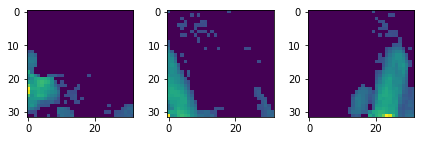

04IOS24JP70LHBGB184_2 1


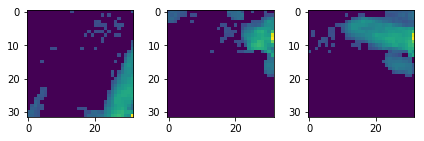

04IOS24JP70LHBGB184_3 1


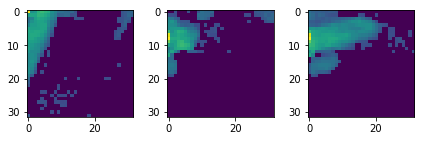

04IOS24JP70LHBGB184_4 1


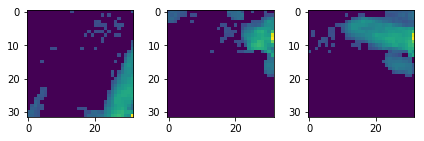

04IOS24JP70LHBGB184_5 1


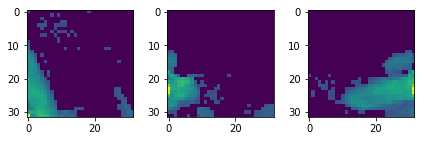

04IOS24JP70LHBGB184_6 1


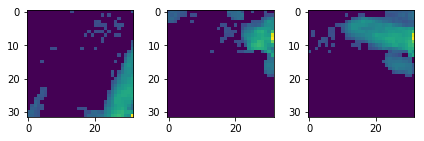

04IOS24JP70LHBGB184_7 1


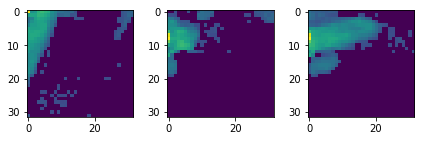

04IOS24JP70LHBGB184_8 1


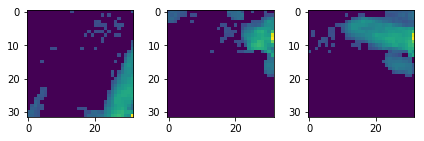

04IOS24JP70LHBGB184_9 1


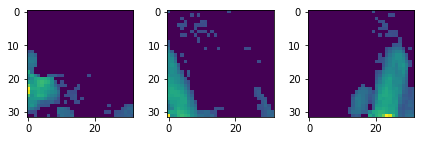

04IOS24JP70LHBGB184_10 1


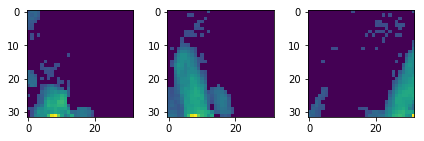

04IOS24JP70LHBGB184_11 1


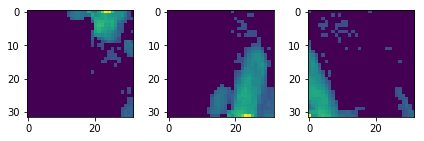

04IOS24JP70LHBGB184_12 1


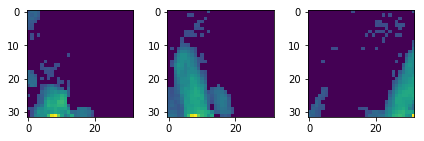

04IOS24JP70LHBGB184_13 1


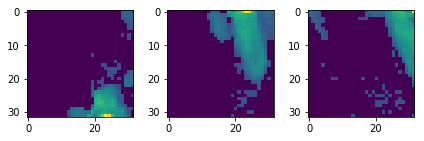

04IOS24JP70LHBGB184_14 1


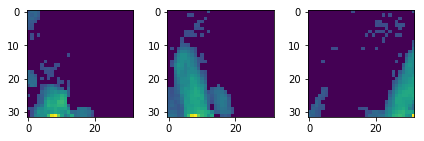

04IOS24JP70LHBGB184_15 1


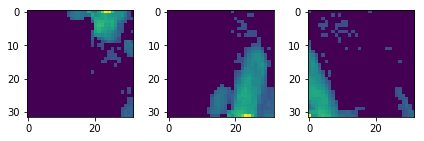

04IOS24JP70LHBGB184_16 1


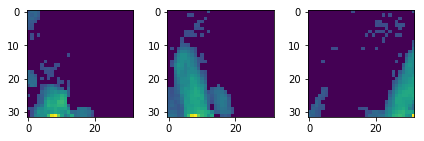

04IOS24JP70LHBGB184_17 1


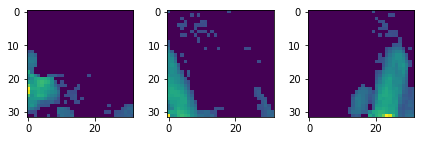

04IOS24JP70LHBGB184_18 1


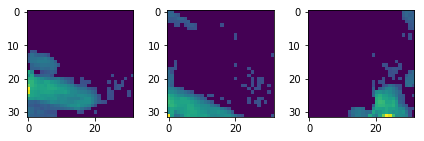

04IOS24JP70LHBGB184_19 1


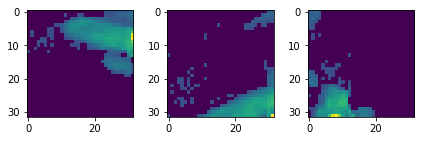

04IOS24JP70LHBGB184_20 1


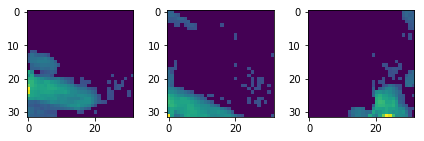

04IOS24JP70LHBGB184_21 1


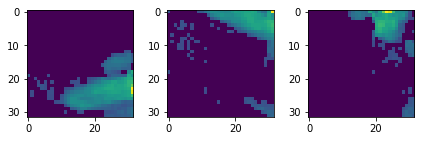

04IOS24JP70LHBGB184_22 1


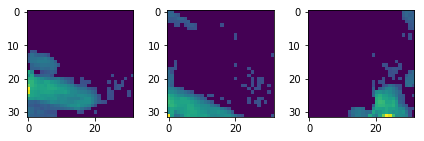

04IOS24JP70LHBGB184_23 1


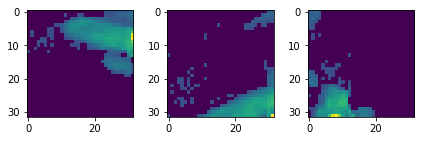

04IOS24JP70LHBGB184_24 1


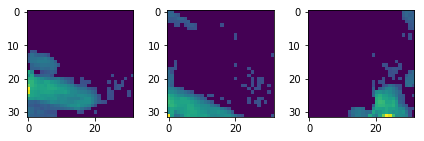

0DQO9A6UXUQHR8RA148_1 1


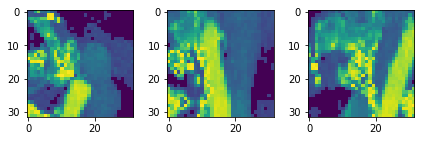

0DQO9A6UXUQHR8RA148_2 1


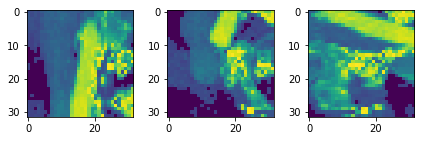

0DQO9A6UXUQHR8RA148_3 1


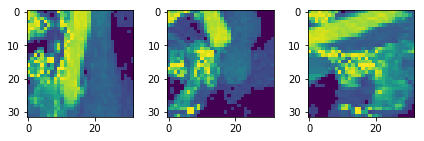

0DQO9A6UXUQHR8RA148_4 1


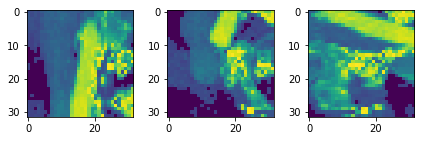

0DQO9A6UXUQHR8RA148_5 1


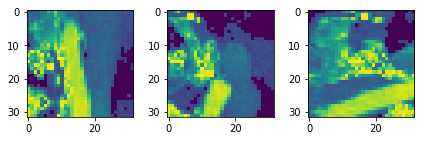

0DQO9A6UXUQHR8RA148_6 1


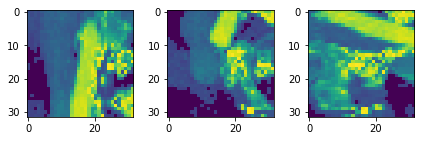

0DQO9A6UXUQHR8RA148_7 1


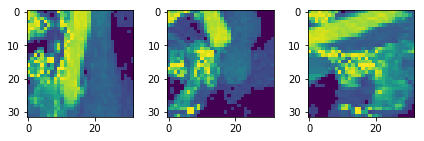

0DQO9A6UXUQHR8RA148_8 1


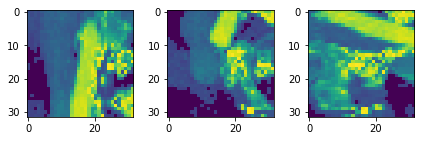

0DQO9A6UXUQHR8RA148_9 1


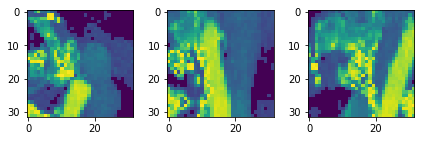

0DQO9A6UXUQHR8RA148_10 1


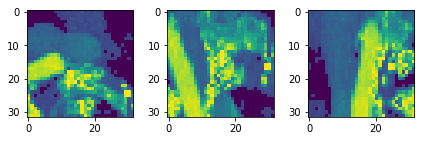

0DQO9A6UXUQHR8RA148_11 1


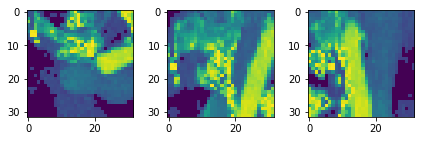

0DQO9A6UXUQHR8RA148_12 1


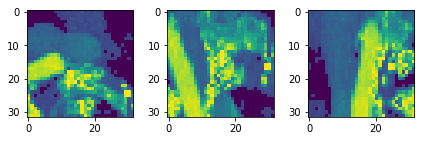

0DQO9A6UXUQHR8RA148_13 1


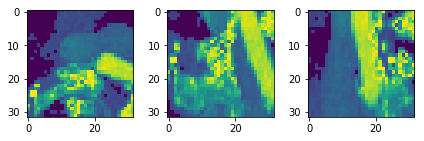

0DQO9A6UXUQHR8RA148_14 1


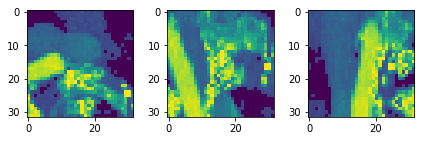

0DQO9A6UXUQHR8RA148_15 1


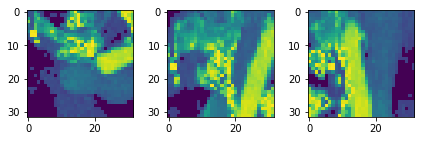

0DQO9A6UXUQHR8RA148_16 1


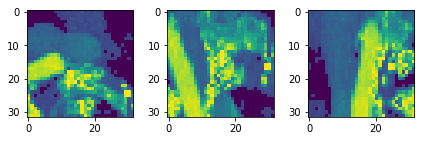

0DQO9A6UXUQHR8RA148_17 1


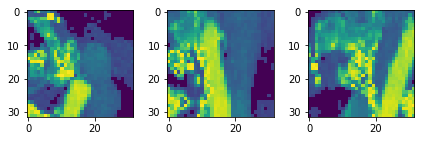

0DQO9A6UXUQHR8RA148_18 1


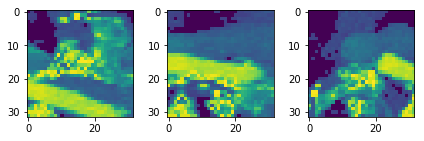

0DQO9A6UXUQHR8RA148_19 1


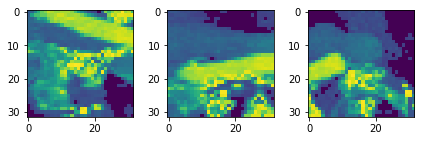

0DQO9A6UXUQHR8RA148_20 1


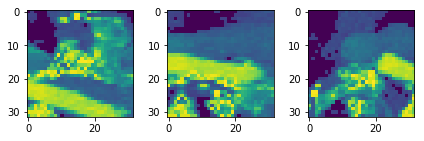

0DQO9A6UXUQHR8RA148_21 1


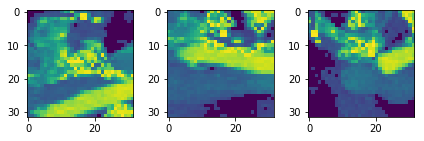

0DQO9A6UXUQHR8RA148_22 1


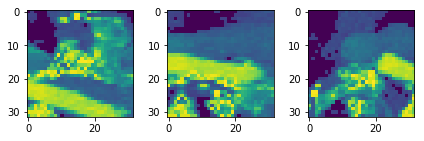

0DQO9A6UXUQHR8RA148_23 1


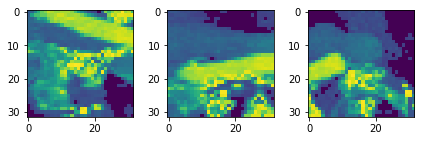

0DQO9A6UXUQHR8RA148_24 1


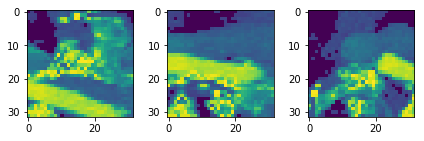

0E1AN2T001WORM02346_1 1


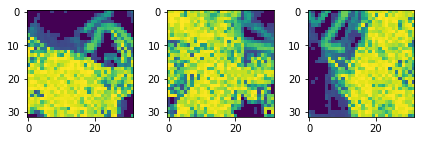

0E1AN2T001WORM02346_2 1


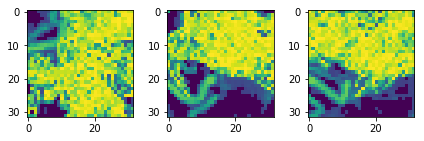

0E1AN2T001WORM02346_3 1


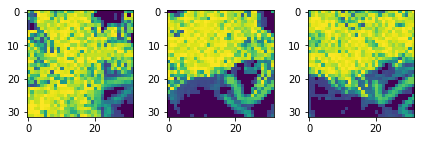

0E1AN2T001WORM02346_4 1


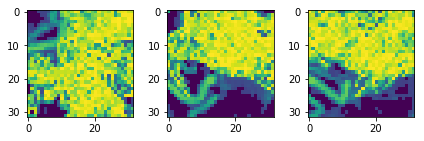

0E1AN2T001WORM02346_5 1


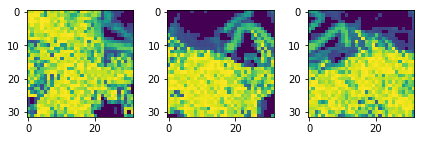

0E1AN2T001WORM02346_6 1


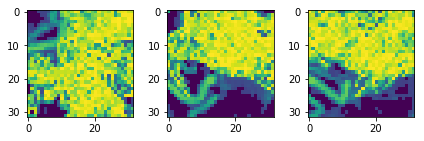

0E1AN2T001WORM02346_7 1


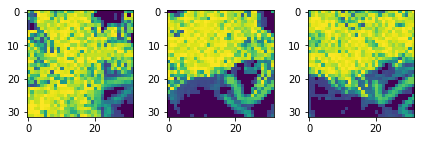

0E1AN2T001WORM02346_8 1


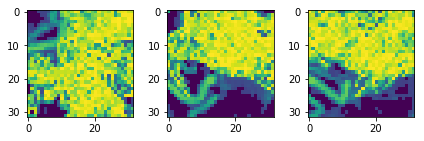

0E1AN2T001WORM02346_9 1


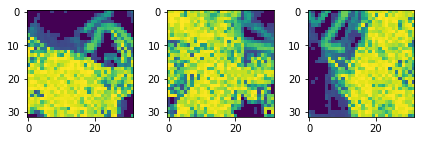

0E1AN2T001WORM02346_10 1


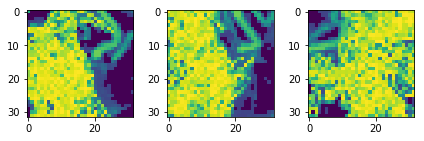

0E1AN2T001WORM02346_11 1


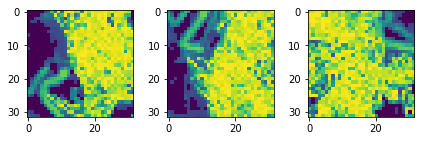

0E1AN2T001WORM02346_12 1


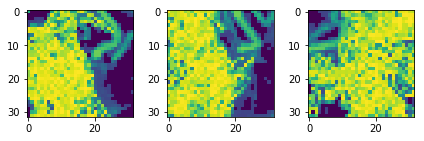

0E1AN2T001WORM02346_13 1


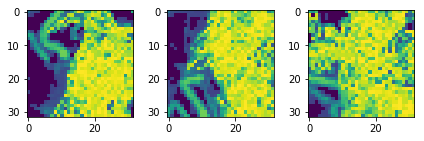

0E1AN2T001WORM02346_14 1


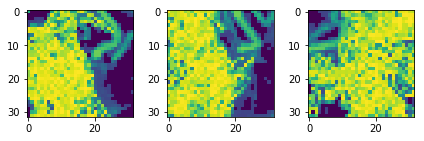

0E1AN2T001WORM02346_15 1


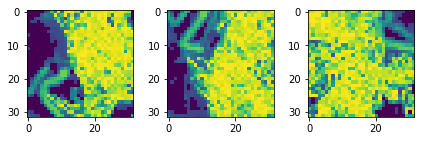

0E1AN2T001WORM02346_16 1


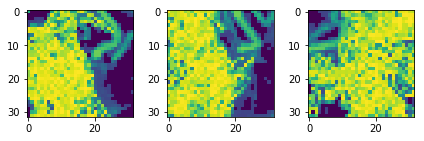

0E1AN2T001WORM02346_17 1


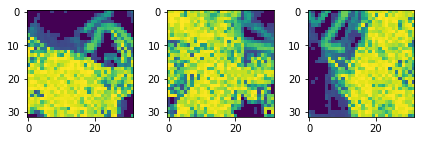

0E1AN2T001WORM02346_18 1


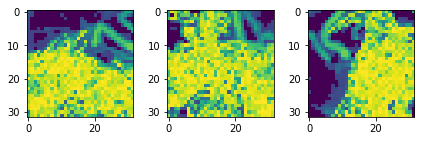

0E1AN2T001WORM02346_19 1


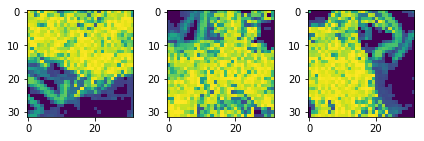

0E1AN2T001WORM02346_20 1


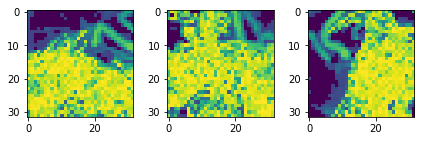

0E1AN2T001WORM02346_21 1


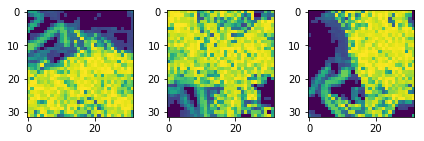

0E1AN2T001WORM02346_22 1


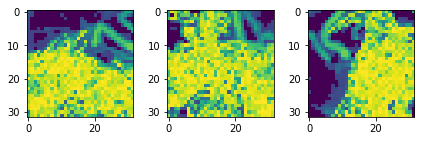

0E1AN2T001WORM02346_23 1


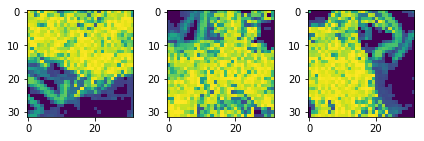

0E1AN2T001WORM02346_24 1


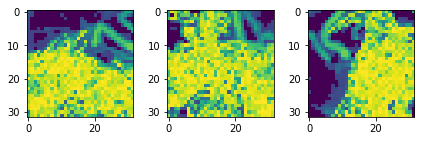

0EZJW4R4EMC16I10148_1 1


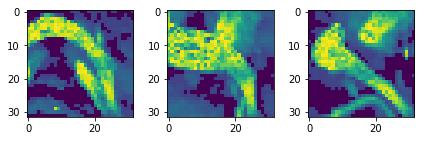

0EZJW4R4EMC16I10148_2 1


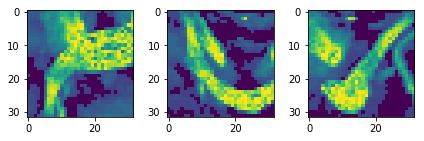

0EZJW4R4EMC16I10148_3 1


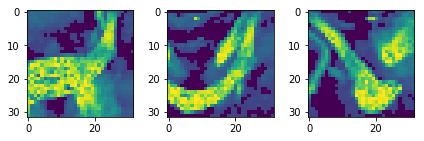

0EZJW4R4EMC16I10148_4 1


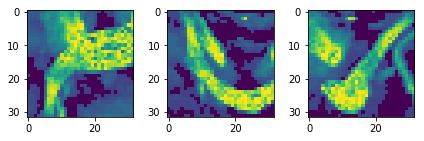

0EZJW4R4EMC16I10148_5 1


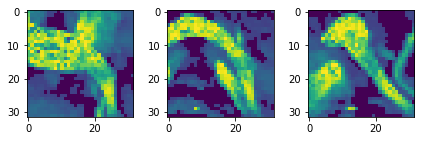

0EZJW4R4EMC16I10148_6 1


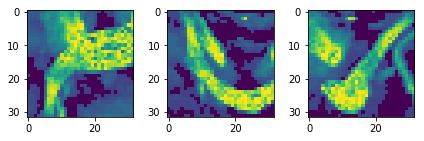

0EZJW4R4EMC16I10148_7 1


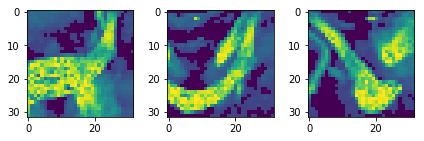

0EZJW4R4EMC16I10148_8 1


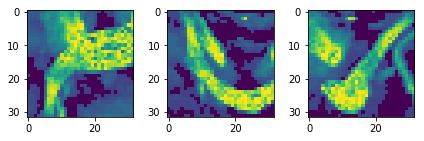

0EZJW4R4EMC16I10148_9 1


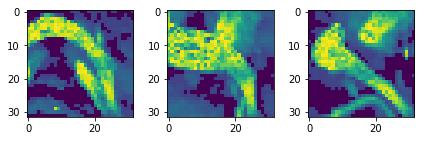

0EZJW4R4EMC16I10148_10 1


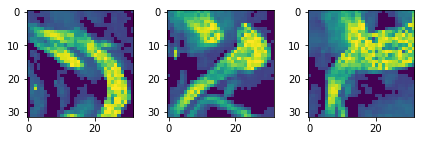

0EZJW4R4EMC16I10148_11 1


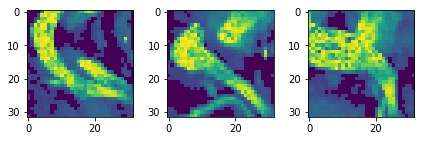

0EZJW4R4EMC16I10148_12 1


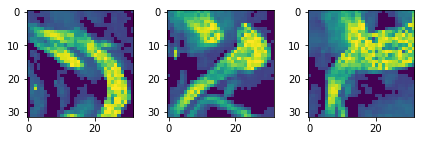

0EZJW4R4EMC16I10148_13 1


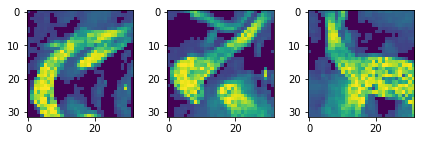

0EZJW4R4EMC16I10148_14 1


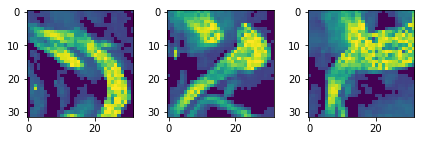

0EZJW4R4EMC16I10148_15 1


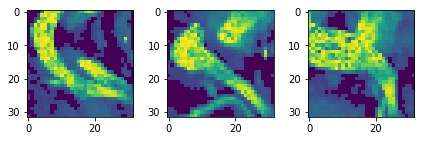

0EZJW4R4EMC16I10148_16 1


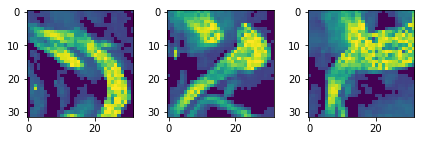

0EZJW4R4EMC16I10148_17 1


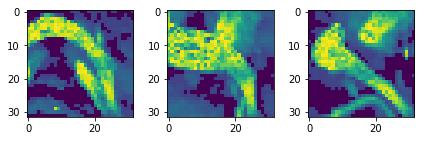

0EZJW4R4EMC16I10148_18 1


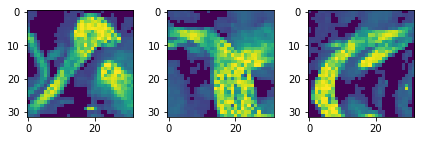

0EZJW4R4EMC16I10148_19 1


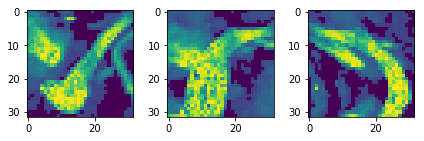

0EZJW4R4EMC16I10148_20 1


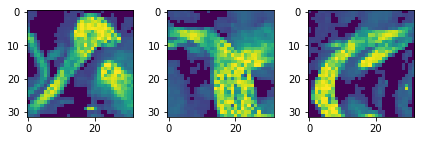

0EZJW4R4EMC16I10148_21 1


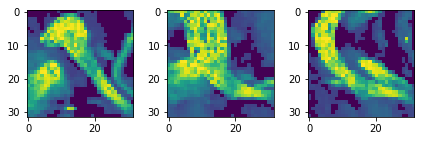

0EZJW4R4EMC16I10148_22 1


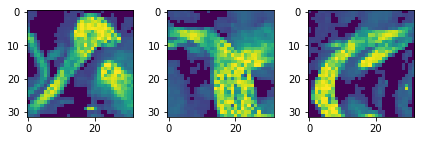

0EZJW4R4EMC16I10148_23 1


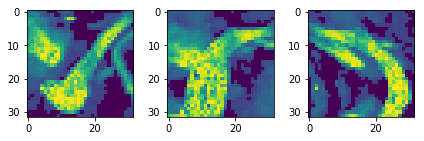

0EZJW4R4EMC16I10148_24 1


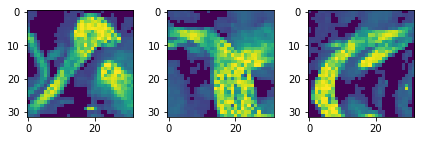

0KSBX96F8BU1FCFQ202_1 1


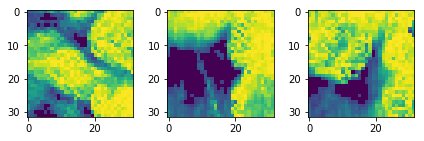

0KSBX96F8BU1FCFQ202_2 1


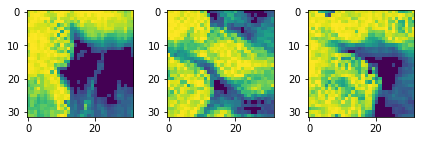

0KSBX96F8BU1FCFQ202_3 1


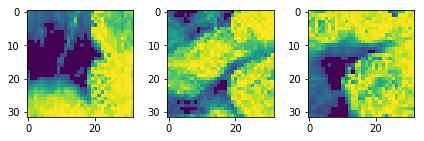

0KSBX96F8BU1FCFQ202_4 1


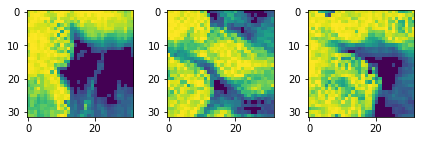

0KSBX96F8BU1FCFQ202_5 1


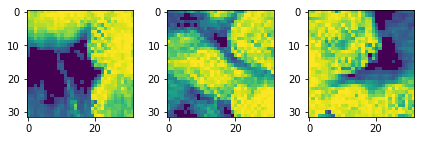

0KSBX96F8BU1FCFQ202_6 1


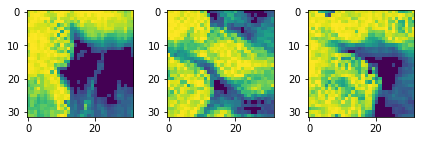

0KSBX96F8BU1FCFQ202_7 1


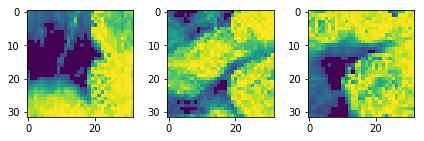

0KSBX96F8BU1FCFQ202_8 1


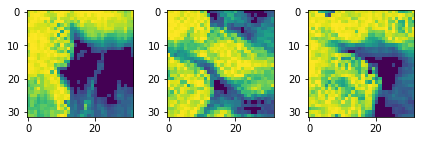

0KSBX96F8BU1FCFQ202_9 1


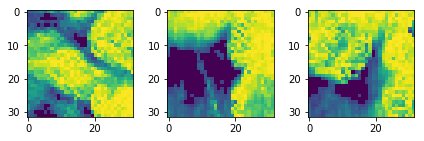

0KSBX96F8BU1FCFQ202_10 1


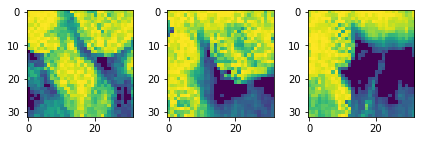

0KSBX96F8BU1FCFQ202_11 1


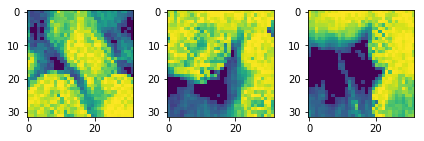

0KSBX96F8BU1FCFQ202_12 1


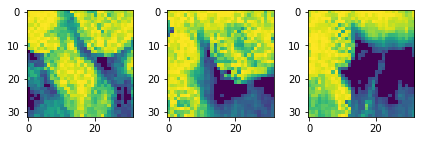

0KSBX96F8BU1FCFQ202_13 1


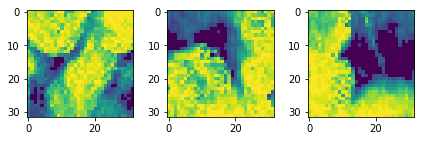

0KSBX96F8BU1FCFQ202_14 1


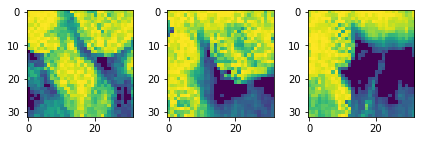

0KSBX96F8BU1FCFQ202_15 1


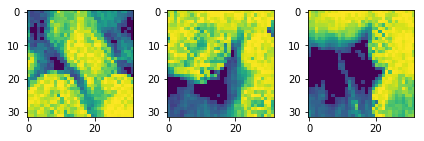

0KSBX96F8BU1FCFQ202_16 1


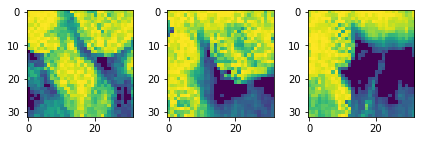

0KSBX96F8BU1FCFQ202_17 1


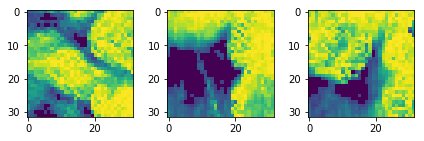

0KSBX96F8BU1FCFQ202_18 1


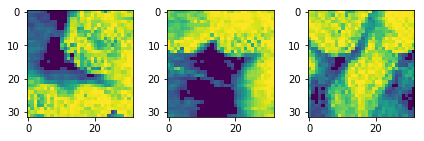

0KSBX96F8BU1FCFQ202_19 1


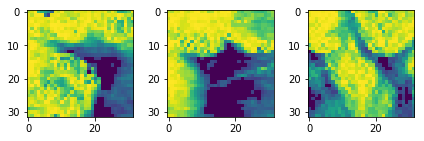

0KSBX96F8BU1FCFQ202_20 1


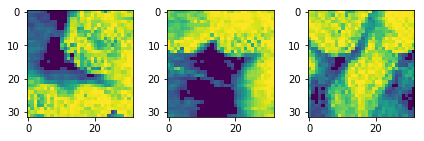

0KSBX96F8BU1FCFQ202_21 1


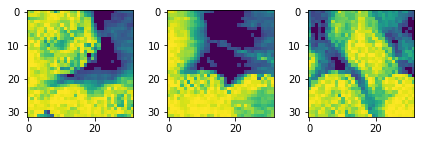

0KSBX96F8BU1FCFQ202_22 1


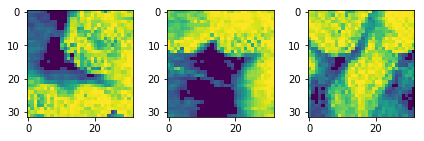

0KSBX96F8BU1FCFQ202_23 1


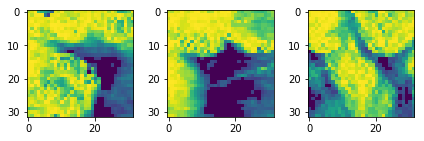

0KSBX96F8BU1FCFQ202_24 1


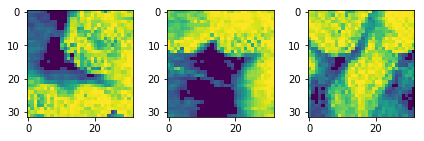

0LT6HMDHUK63WSC7156_1 1


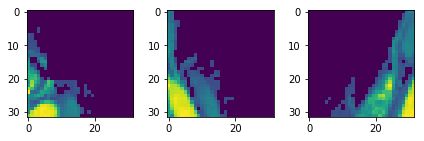

0LT6HMDHUK63WSC7156_2 1


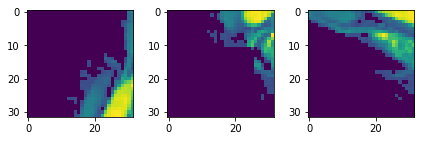

0LT6HMDHUK63WSC7156_3 1


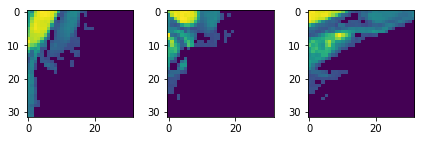

0LT6HMDHUK63WSC7156_4 1


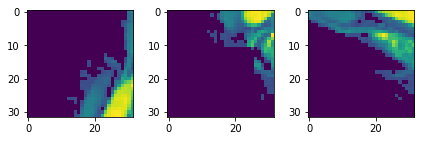

0LT6HMDHUK63WSC7156_5 1


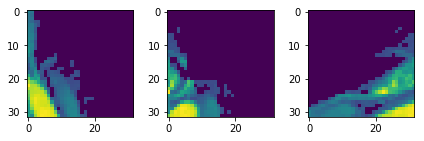

0LT6HMDHUK63WSC7156_6 1


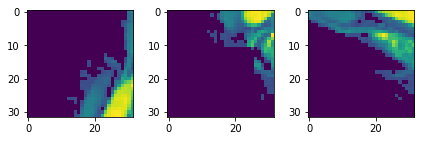

0LT6HMDHUK63WSC7156_7 1


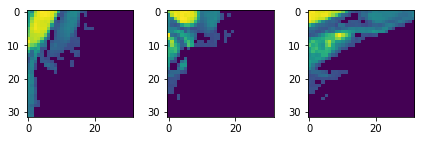

0LT6HMDHUK63WSC7156_8 1


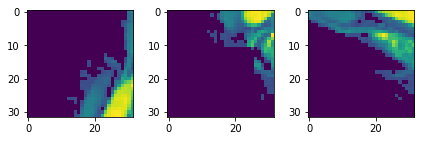

0LT6HMDHUK63WSC7156_9 1


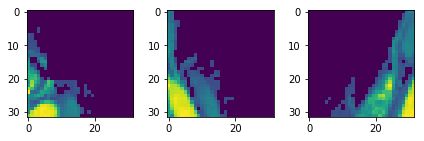

0LT6HMDHUK63WSC7156_10 1


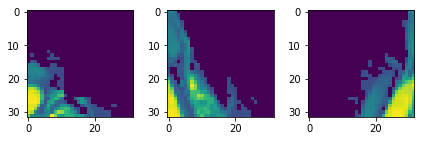

0LT6HMDHUK63WSC7156_11 1


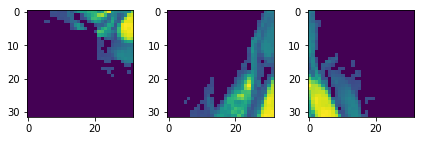

0LT6HMDHUK63WSC7156_12 1


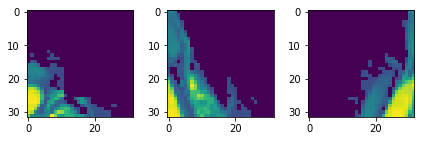

0LT6HMDHUK63WSC7156_13 1


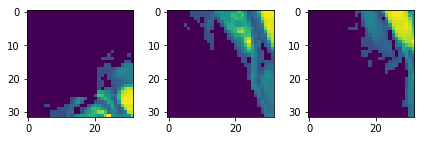

0LT6HMDHUK63WSC7156_14 1


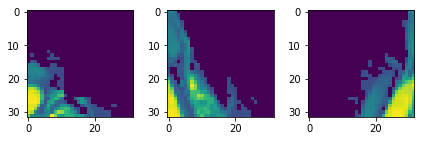

0LT6HMDHUK63WSC7156_15 1


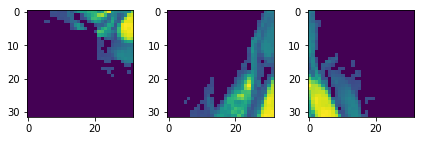

0LT6HMDHUK63WSC7156_16 1


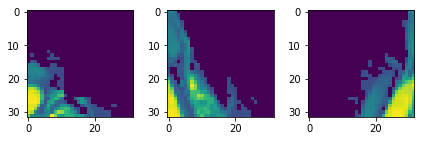

0LT6HMDHUK63WSC7156_17 1


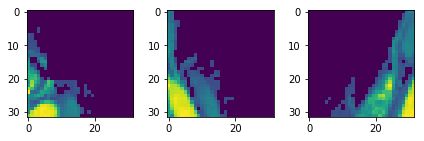

0LT6HMDHUK63WSC7156_18 1


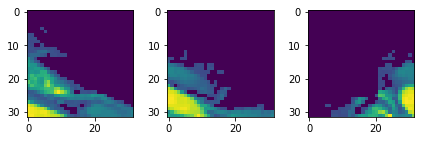

0LT6HMDHUK63WSC7156_19 1


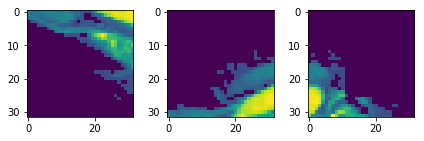

0LT6HMDHUK63WSC7156_20 1


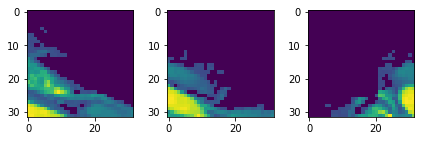

0LT6HMDHUK63WSC7156_21 1


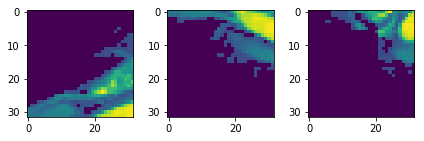

0LT6HMDHUK63WSC7156_22 1


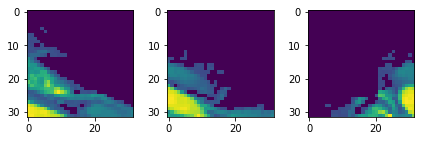

0LT6HMDHUK63WSC7156_23 1


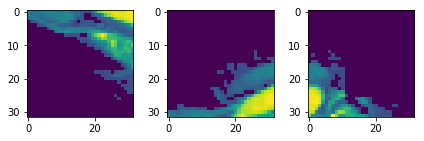

0LT6HMDHUK63WSC7156_24 1


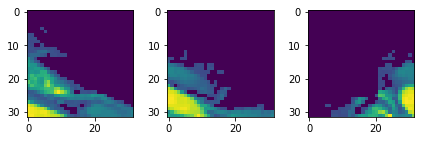

0MG5EK1O64CPS887146_1 1


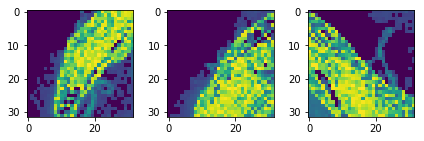

0MG5EK1O64CPS887146_2 1


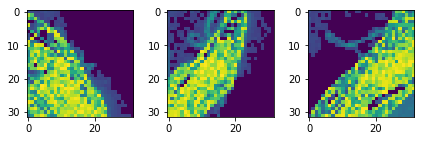

0MG5EK1O64CPS887146_3 1


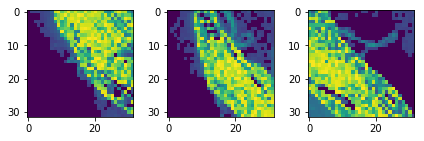

0MG5EK1O64CPS887146_4 1


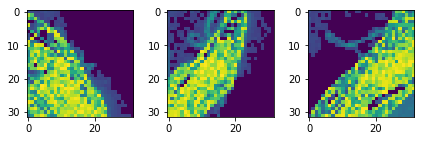

0MG5EK1O64CPS887146_5 1


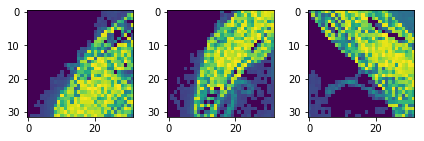

0MG5EK1O64CPS887146_6 1


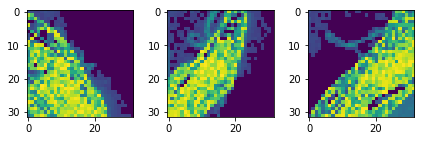

0MG5EK1O64CPS887146_7 1


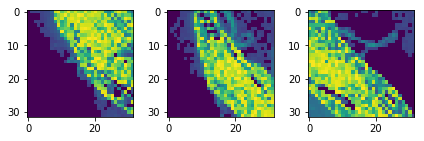

0MG5EK1O64CPS887146_8 1


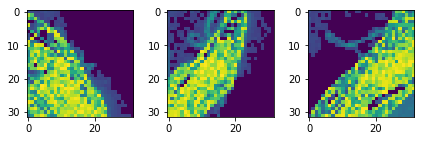

0MG5EK1O64CPS887146_9 1


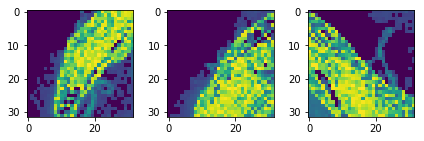

0MG5EK1O64CPS887146_10 1


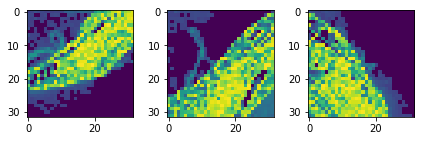

0MG5EK1O64CPS887146_11 1


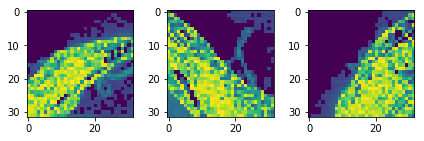

0MG5EK1O64CPS887146_12 1


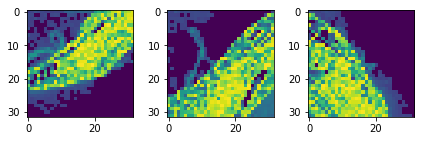

0MG5EK1O64CPS887146_13 1


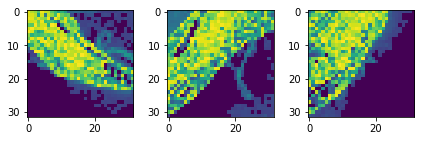

0MG5EK1O64CPS887146_14 1


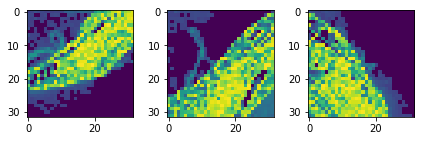

0MG5EK1O64CPS887146_15 1


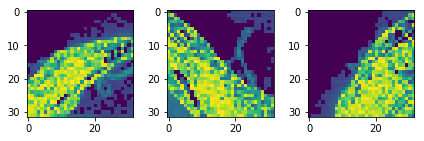

0MG5EK1O64CPS887146_16 1


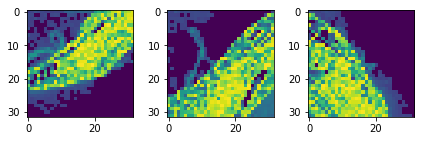

0MG5EK1O64CPS887146_17 1


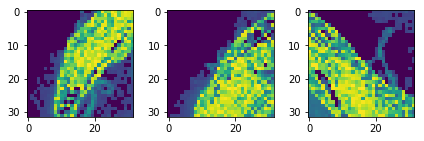

0MG5EK1O64CPS887146_18 1


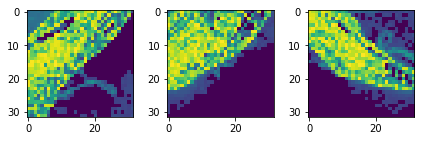

0MG5EK1O64CPS887146_19 1


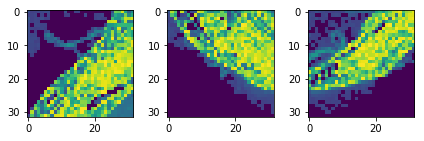

0MG5EK1O64CPS887146_20 1


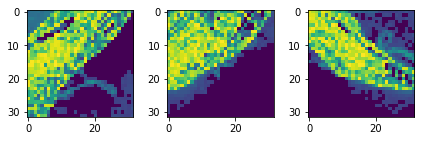

0MG5EK1O64CPS887146_21 1


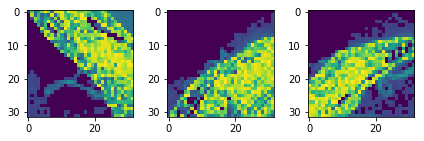

0MG5EK1O64CPS887146_22 1


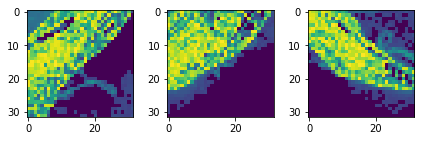

0MG5EK1O64CPS887146_23 1


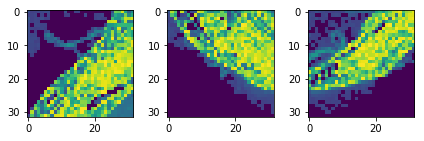

0MG5EK1O64CPS887146_24 1


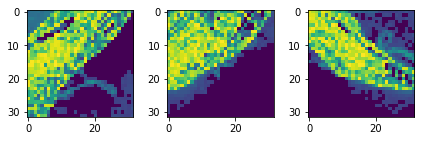

0OJARUOGIFH5TZKU147_1 1


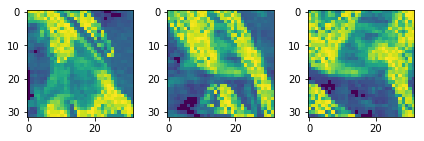

0OJARUOGIFH5TZKU147_2 1


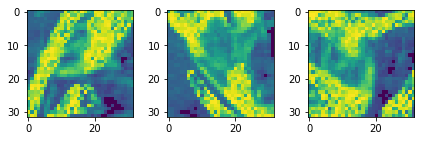

0OJARUOGIFH5TZKU147_3 1


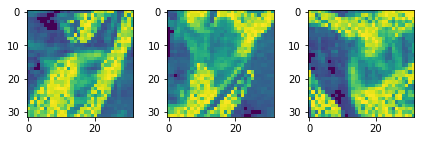

0OJARUOGIFH5TZKU147_4 1


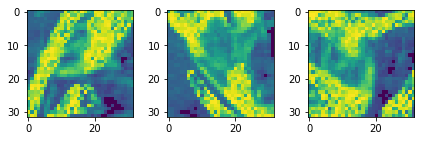

0OJARUOGIFH5TZKU147_5 1


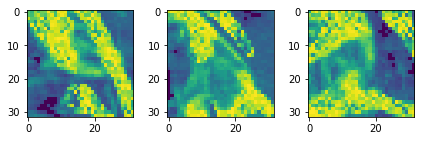

0OJARUOGIFH5TZKU147_6 1


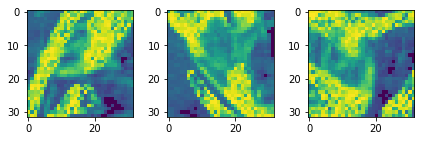

0OJARUOGIFH5TZKU147_7 1


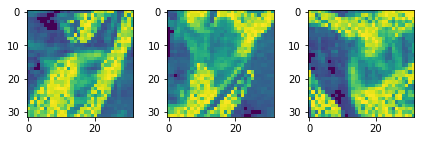

0OJARUOGIFH5TZKU147_8 1


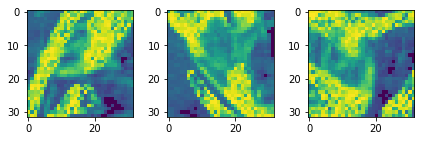

0OJARUOGIFH5TZKU147_9 1


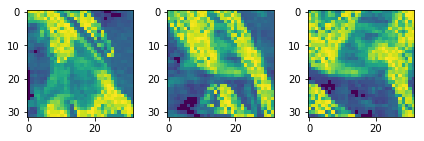

0OJARUOGIFH5TZKU147_10 1


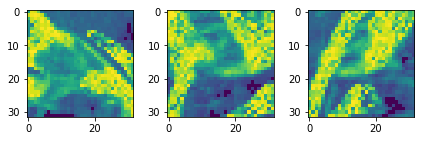

0OJARUOGIFH5TZKU147_11 1


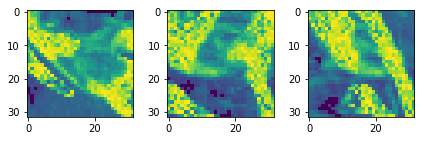

0OJARUOGIFH5TZKU147_12 1


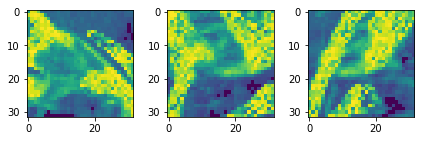

0OJARUOGIFH5TZKU147_13 1


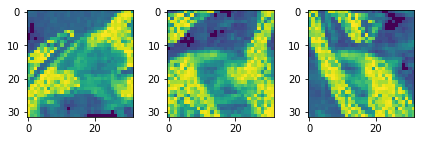

0OJARUOGIFH5TZKU147_14 1


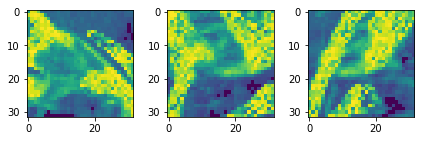

0OJARUOGIFH5TZKU147_15 1


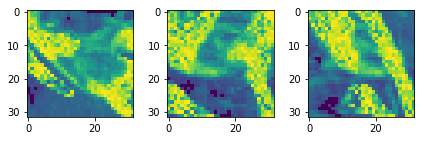

0OJARUOGIFH5TZKU147_16 1


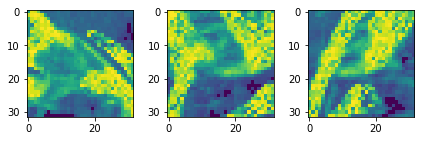

0OJARUOGIFH5TZKU147_17 1


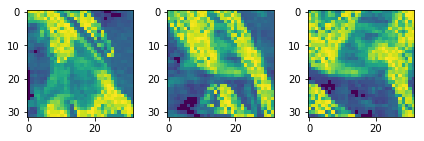

0OJARUOGIFH5TZKU147_18 1


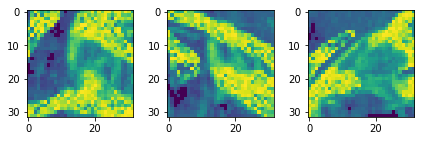

0OJARUOGIFH5TZKU147_19 1


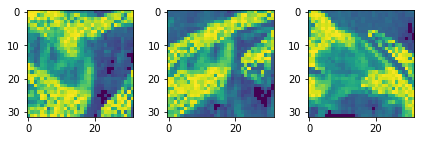

0OJARUOGIFH5TZKU147_20 1


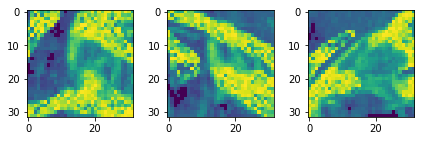

0OJARUOGIFH5TZKU147_21 1


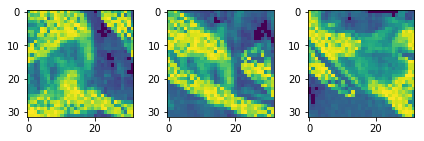

0OJARUOGIFH5TZKU147_22 1


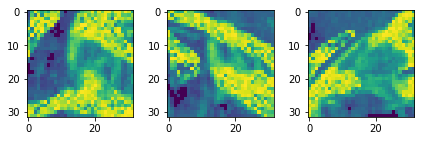

0OJARUOGIFH5TZKU147_23 1


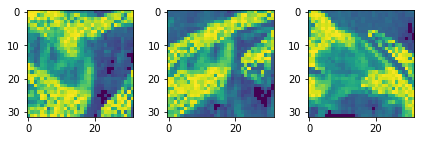

0OJARUOGIFH5TZKU147_24 1


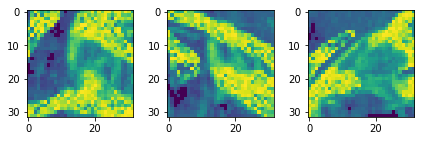

0RB9KGMO90G1YQZD175_1 1


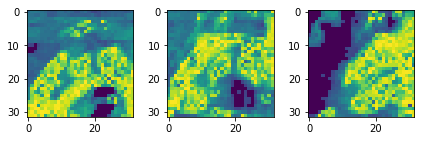

0RB9KGMO90G1YQZD175_2 1


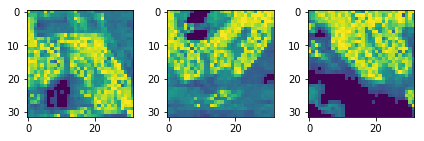

0RB9KGMO90G1YQZD175_3 1


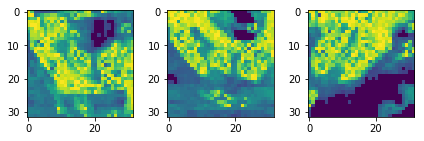

0RB9KGMO90G1YQZD175_4 1


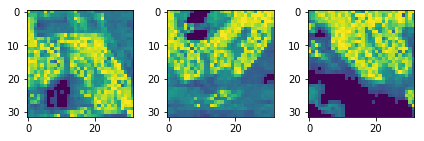

0RB9KGMO90G1YQZD175_5 1


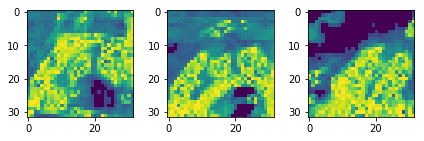

0RB9KGMO90G1YQZD175_6 1


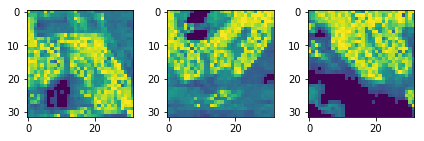

0RB9KGMO90G1YQZD175_7 1


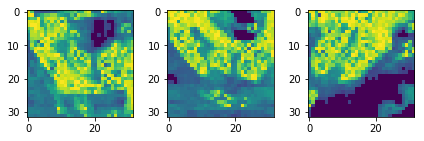

0RB9KGMO90G1YQZD175_8 1


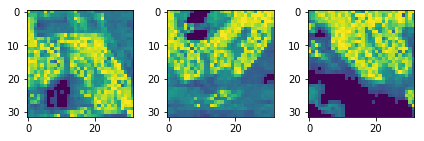

0RB9KGMO90G1YQZD175_9 1


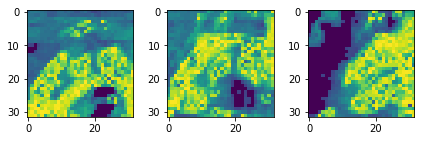

0RB9KGMO90G1YQZD175_10 1


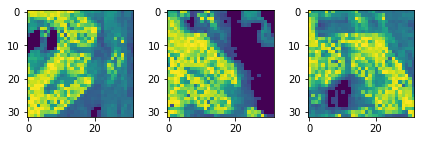

0RB9KGMO90G1YQZD175_11 1


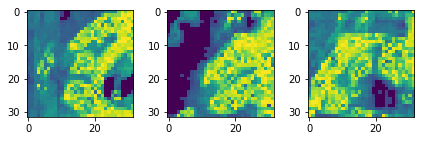

0RB9KGMO90G1YQZD175_12 1


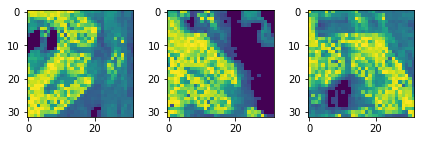

0RB9KGMO90G1YQZD175_13 1


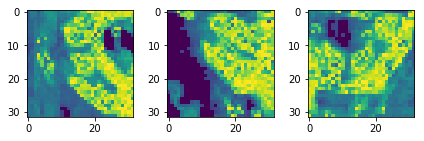

0RB9KGMO90G1YQZD175_14 1


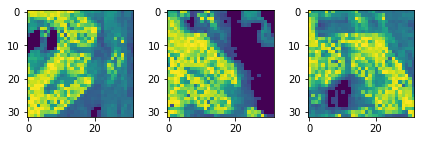

0RB9KGMO90G1YQZD175_15 1


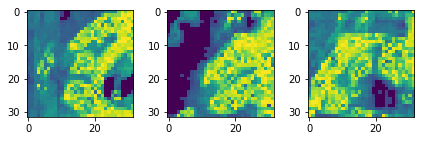

0RB9KGMO90G1YQZD175_16 1


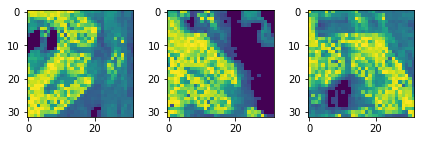

0RB9KGMO90G1YQZD175_17 1


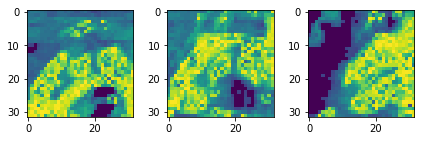

0RB9KGMO90G1YQZD175_18 1


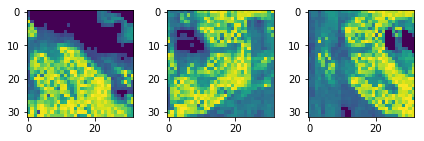

0RB9KGMO90G1YQZD175_19 1


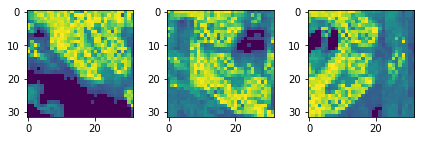

0RB9KGMO90G1YQZD175_20 1


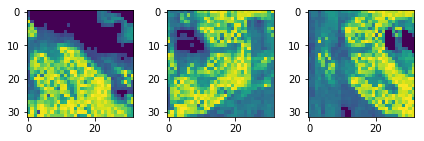

0RB9KGMO90G1YQZD175_21 1


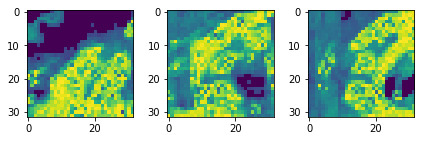

0RB9KGMO90G1YQZD175_22 1


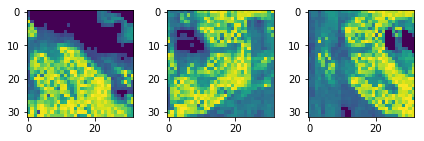

0RB9KGMO90G1YQZD175_23 1


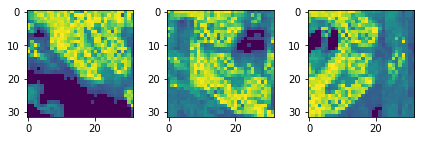

0RB9KGMO90G1YQZD175_24 1


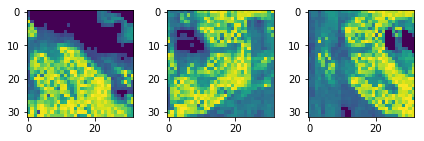

16TRHGYACZ8HYHUB475_1 1


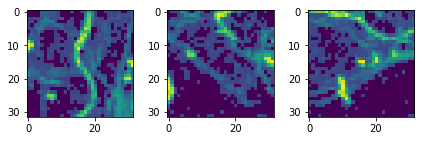

16TRHGYACZ8HYHUB475_2 1


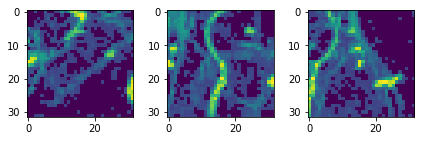

16TRHGYACZ8HYHUB475_3 1


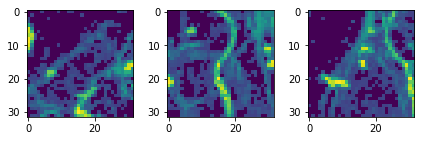

16TRHGYACZ8HYHUB475_4 1


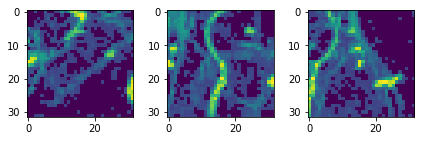

16TRHGYACZ8HYHUB475_5 1


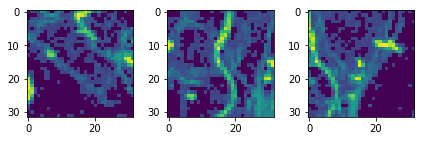

16TRHGYACZ8HYHUB475_6 1


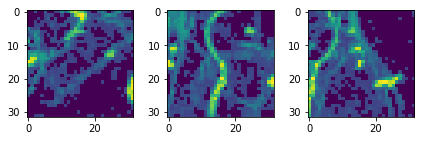

16TRHGYACZ8HYHUB475_7 1


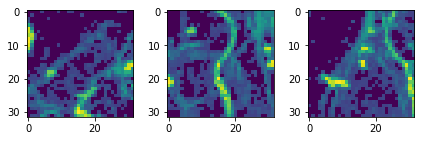

16TRHGYACZ8HYHUB475_8 1


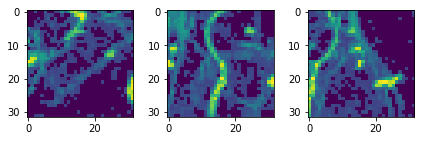

16TRHGYACZ8HYHUB475_9 1


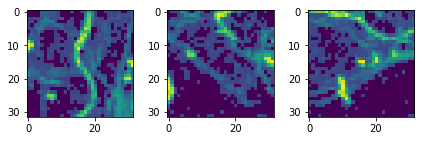

16TRHGYACZ8HYHUB475_10 1


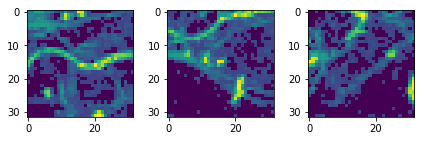

16TRHGYACZ8HYHUB475_11 1


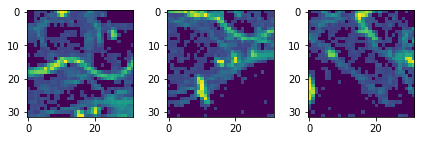

16TRHGYACZ8HYHUB475_12 1


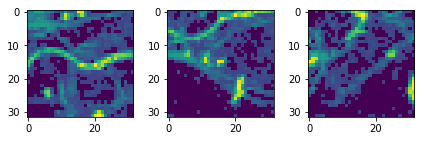

16TRHGYACZ8HYHUB475_13 1


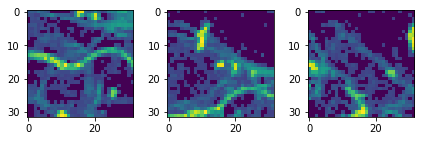

16TRHGYACZ8HYHUB475_14 1


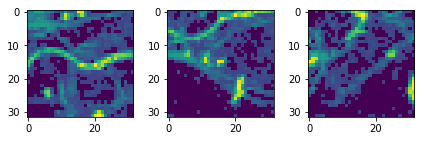

16TRHGYACZ8HYHUB475_15 1


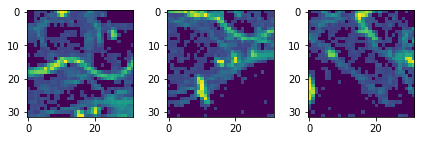

16TRHGYACZ8HYHUB475_16 1


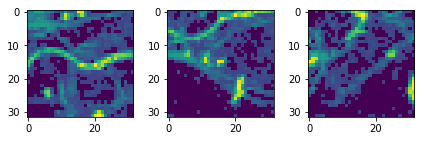

16TRHGYACZ8HYHUB475_17 1


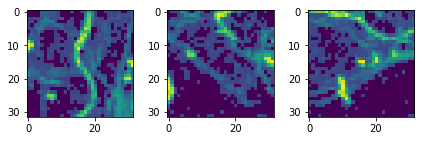

16TRHGYACZ8HYHUB475_18 1


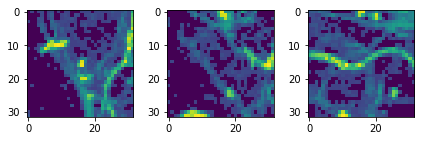

16TRHGYACZ8HYHUB475_19 1


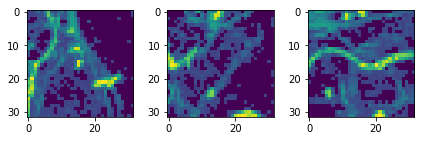

16TRHGYACZ8HYHUB475_20 1


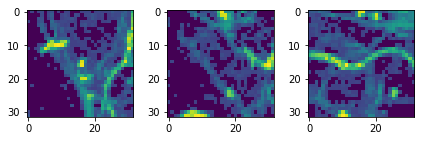

16TRHGYACZ8HYHUB475_21 1


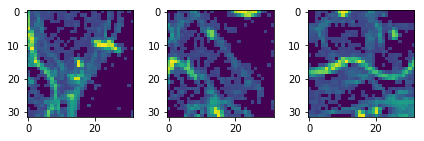

16TRHGYACZ8HYHUB475_22 1


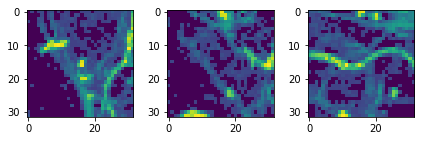

16TRHGYACZ8HYHUB475_23 1


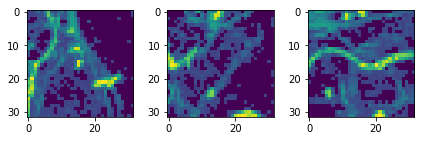

16TRHGYACZ8HYHUB475_24 1


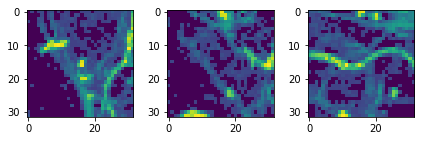

1BBPJ3U25RYGSRSS300_1 1


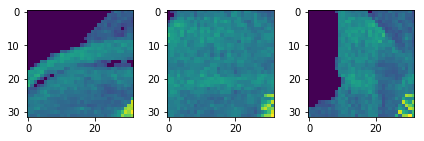

1BBPJ3U25RYGSRSS300_2 1


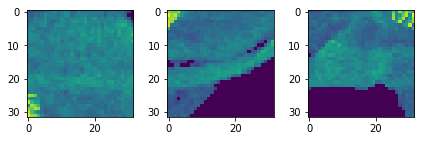

1BBPJ3U25RYGSRSS300_3 1


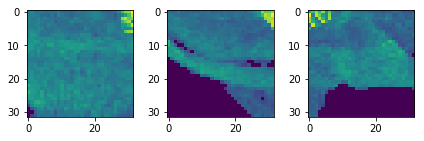

1BBPJ3U25RYGSRSS300_4 1


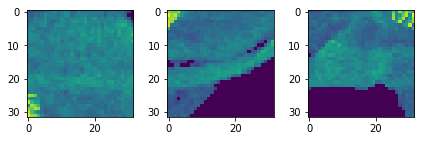

1BBPJ3U25RYGSRSS300_5 1


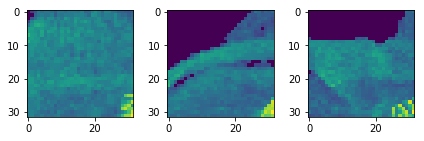

1BBPJ3U25RYGSRSS300_6 1


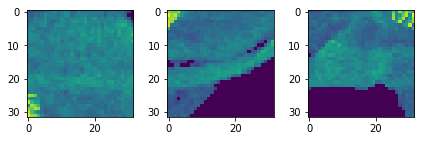

1BBPJ3U25RYGSRSS300_7 1


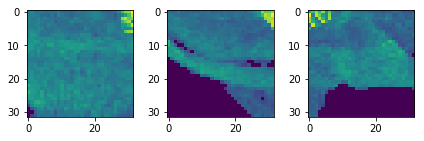

1BBPJ3U25RYGSRSS300_8 1


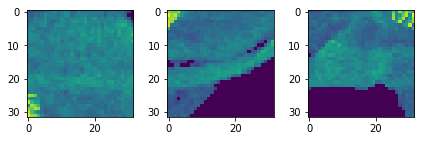

1BBPJ3U25RYGSRSS300_9 1


KeyboardInterrupt: 

In [81]:
scans = []
new_labels = []
i = 0
for id_, label in list(positive_label_data.items()):
    if i > 500:
        break
    blob = bucket.get_blob('chunk_data/normal/positive/' + id_ + '.npy')
    arr = cloud_management.download_array(blob)
    if arr.shape == (32, 32, 32):
#         if i % 24 != 0:
#             continue
        arr[arr < 75] = 0
        arr[arr > 400] = 0
        axial = np.max(arr, axis=0)
        coronal = np.max(arr, axis=1)
        sag = np.max(arr,axis=2)
        print(id_, label)
        fig, ax = plt.subplots(1, 3, figsize=(6, 10))
        ax[0].imshow(axial, interpolation='none')
        ax[1].imshow(coronal, interpolation='none')
        ax[2].imshow(sag, interpolation='none')
        fig.tight_layout()
        plt.show()
        arr = np.expand_dims(arr, axis=-1)
        scans.append(arr)
        new_labels.append(label)
        i += 1
        
i = 1
for id_, label in list(negative_label_data.items()):
    if i > 25:
        break
    blob = bucket.get_blob('chunk_data/normal/negative/' + id_ + '.npy')
    arr = cloud_management.download_array(blob)
    if arr.shape == (32, 32, 32):
        
        print('hello')
        axial = np.max(arr, axis=0)
        coronal = np.max(arr, axis=1)
        sag = np.max(arr,axis=2)
        fig, ax = plt.subplots(1, 3, figsize=(6, 10))
        ax[0].imshow(axial, interpolation='none')
        ax[1].imshow(coronal, interpolation='none')
        ax[2].imshow(sag, interpolation='none')
        fig.tight_layout()
        plt.show()
        arr = np.expand_dims(arr, axis=-1)
        scans.append(arr)
        new_labels.append(label)
        i += 1
    
tmp = list(zip(scans, new_labels))
random.shuffle(tmp)
scans, new_labels = zip(*tmp)

X_train = np.asarray(scans)
y_train = np.asarray(labels)

# Split based on validation
# print('splitting based on validation split')
# X_train = np.asarray(scans[int(len(scans) * 0.1):])
# y_train = np.asarray(labels[int(len(labels) * 0.1):])

# X_val = np.asarray(scans[:int(len(scans) * 0.1)])
# y_val = np.asarray(labels[:int(len(labels) * 0.1)])

In [52]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(50, 32, 32, 32, 1) (50,)
(5, 32, 32, 32, 1) (5,)


In [53]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=16,
#     callbacks=[mc_callback],
#     validation_data = (X_val, y_val),
    verbose=1)

Epoch 1/200
50/50 [==============================] - 0s 4ms/step - loss: 7.9712 - binary_accuracy: 0.5000 - binary_crossentropy: 7.9712
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 7.9712 - binary_accuracy: 0.5000 - binary_crossentropy: 7.9712
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 7.9712 - binary_accuracy: 0.5000 - binary_crossentropy: 7.9712
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 7.9712 - binary_accuracy: 0.5000 - binary_crossentropy: 7.9712
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 7.9712 - binary_accuracy: 0.5000 - binary_crossentropy: 7.9712
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 7.9712 - binary_accuracy: 0.5000 - binary_crossentropy: 7.9712
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 7.9712 - binary_accuracy: 0.5000 - binary_crossentropy: 7.9712
Epoch 8/200
50/50 [=============================

KeyboardInterrupt: 